In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import scienceplots
import seaborn as sns
from invmethods import *
from scipy import stats

plt.style.use(['science', 'no-latex'])

samples_abs_df = pd.read_csv('YM2_dataset_full.csv')

samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(ast.literal_eval)
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(ast.literal_eval)
samples_abs_df['abs_avg_2mic'] = samples_abs_df['abs_avg_2mic'].apply(ast.literal_eval)
samples_abs_df['abs_std_2mic'] = samples_abs_df['abs_std_2mic'].apply(ast.literal_eval)
samples_abs_df['freq'] = samples_abs_df['freq'].apply(ast.literal_eval)
samples_abs_df['freq_2mic'] = samples_abs_df['freq_2mic'].apply(ast.literal_eval)
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(ast.literal_eval)
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(ast.literal_eval)
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(ast.literal_eval)
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(ast.literal_eval)
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(ast.literal_eval)
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(ast.literal_eval)
samples_abs_df['real_z_2mic'] = samples_abs_df['real_z_2mic'].apply(ast.literal_eval)
samples_abs_df['imag_z_2mic'] = samples_abs_df['imag_z_2mic'].apply(ast.literal_eval)
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].apply(ast.literal_eval)
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].apply(ast.literal_eval)
samples_abs_df['real_K'] = samples_abs_df['real_K'].apply(ast.literal_eval)
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].apply(ast.literal_eval)
samples_abs_df['real_c'] = samples_abs_df['real_c'].apply(ast.literal_eval)
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].apply(ast.literal_eval)

samples_abs_df = samples_abs_df.set_index('sample')

samples_abs_df.tail()


abs_avg  \
sample                                                                
YM2_fine_loose    [-0.0324992872965886, -0.0678358823225986, -0....   
YM2_medium_d1     [-0.05991272997193834, -0.047815100971310996, ...   
YM2_medium_d2     [-0.05159762065502458, -0.0558354289387466, -0...   
YM2_medium_d3     [-0.0277410596093554, -0.0345921347878151, -0....   
YM2_medium_loose  [0.0486381237154464, 0.0653266631663067, 0.047...   

                                                            abs_std  \
sample                                                                
YM2_fine_loose    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
YM2_medium_d1     [0.039642822824263006, 0.03158933936470011, 0....   
YM2_medium_d2     [0.03931736865589045, 0.03942176298217891, 0.0...   
YM2_medium_d3     [0.005099056791086473, 0.009774760307656786, 0...   
YM2_medium_loose  [0.0008552323275284212, 0.0008434248253467931,...   

                                                       abs_avg_2mic  \
sample                                                                
YM2_fine_loose    [0.0862140920117616, 0.097620079161694, 0.0956...   
YM2_medium_d1     [0.10666048420977044, 0.1016407778120979, 0.10...   
YM2_medium_d2     [0.12106685575743299, 0.12047497224473934, 0.1...   
YM2_medium_d3     [0.08374347390569997, 0.08403054509882807, 0.0...   
YM2_medium_loose  [0.0821157020430294, 0.0779489714549343, 0.079...   

                                                       abs_std_2mic density  \
sample                                                                        
YM2_fine_loose    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      d0   
YM2_medium_d1     [0.009389603305624928, 0.015121431006271844, 0...      d1   
YM2_medium_d2     [0.002896253116208922, 0.001600787581414865, 0...      d2   
YM2_medium_d3     [0.009152768314329693, 0.008387534366892687, 0...      d3   
YM2_medium_loose  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814...      d0   

                  granul  thickness   mass  sigma_measured  sigma_estimated  \
sample                                                                        
YM2_fine_loose      fine      45.00  18.75         10708.0             4690   
YM2_medium_d1     medium      44.33  20.04          6267.0             4481   
YM2_medium_d2     medium      39.33  21.24         16067.0             9810   
YM2_medium_d3     medium      33.67  19.28         31240.0            19887   
YM2_medium_loose  medium      45.00  16.76          3764.0             3188   

                  ...                                             real_z  \
sample            ...                                                      
YM2_fine_loose    ...  [1031.66947675641, 979.1460884128, 1019.603858...   
YM2_medium_d1     ...  [1039.4272517709744, 1064.3079271941479, 1069....   
YM2_medium_d2     ...  [1491.877228240787, 1463.2494230978266, 1475.2...   
YM2_medium_d3     ...  [2069.5197204352803, 1940.1509110631798, 1982....   
YM2_medium_loose  ...  [929.038391844483, 972.0570993655847, 964.3083...   

                                                             imag_z  \
sample                                                                
YM2_fine_loose    [-467.209794471444, -483.361879214249, -500.83...   
YM2_medium_d1     [-489.93029279204865, -478.8912479505187, -480...   
YM2_medium_d2     [-1018.8281784914412, -1010.8090265287741, -10...   
YM2_medium_d3     [-1633.1375012238602, -1561.1219323939833, -16...   
YM2_medium_loose  [-296.5690901413023, -275.9563412104283, -303....   

                                                        real_z_2mic  \
sample                                                                
YM2_fine_loose    [2.06055558646463, 2.32145127476843, 2.1912853...   
YM2_medium_d1     [6.93582051035267, 6.183621468204, 6.630731799...   
YM2_medium_d2     [5.859596648823037, 5.73304616645482, 5.527043...   
YM2_medium_d3     [6.1037292413084705, 6.1065863154635425, 6.189...   
Y

In [10]:
#The different properties can be oberved in the columns of the dataframe
samples_abs_df.columns
#type(samples_abs_df.iloc[1]['thickness'])

Index(['abs_avg', 'abs_std', 'abs_avg_2mic', 'abs_std_2mic', 'density',
       'granul', 'thickness', 'mass', 'sigma_measured', 'sigma_estimated',
       'porosity_estimated', 'tortuosity_estimated', 'dens_value', 'freq',
       'freq_2mic', 'tl_avg', 'tl_std', 'real_k', 'imag_k', 'real_z', 'imag_z',
       'real_z_2mic', 'imag_z_2mic', 'real_c', 'imag_c', 'real_rho',
       'imag_rho', 'real_K', 'imag_K'],
      dtype='object')

### Sound absorption curves of the samples
Since the samples with different densities (d1, d2, d3) were developed applying compression, the thicknesses are different. In order to be comparable between them, the absorption coefficient is represented over the frequency (x axes) multiplied by the thickness of the sample. [Hz*m] 
 1. Twelve (12) different sample combinations (3 densities and 4 granulometries)

 2. Comparative between granulometry
 
 3. Comparative between densities

### Absorption curves vs. normalized frequency (to compare samples with different thicknesses)

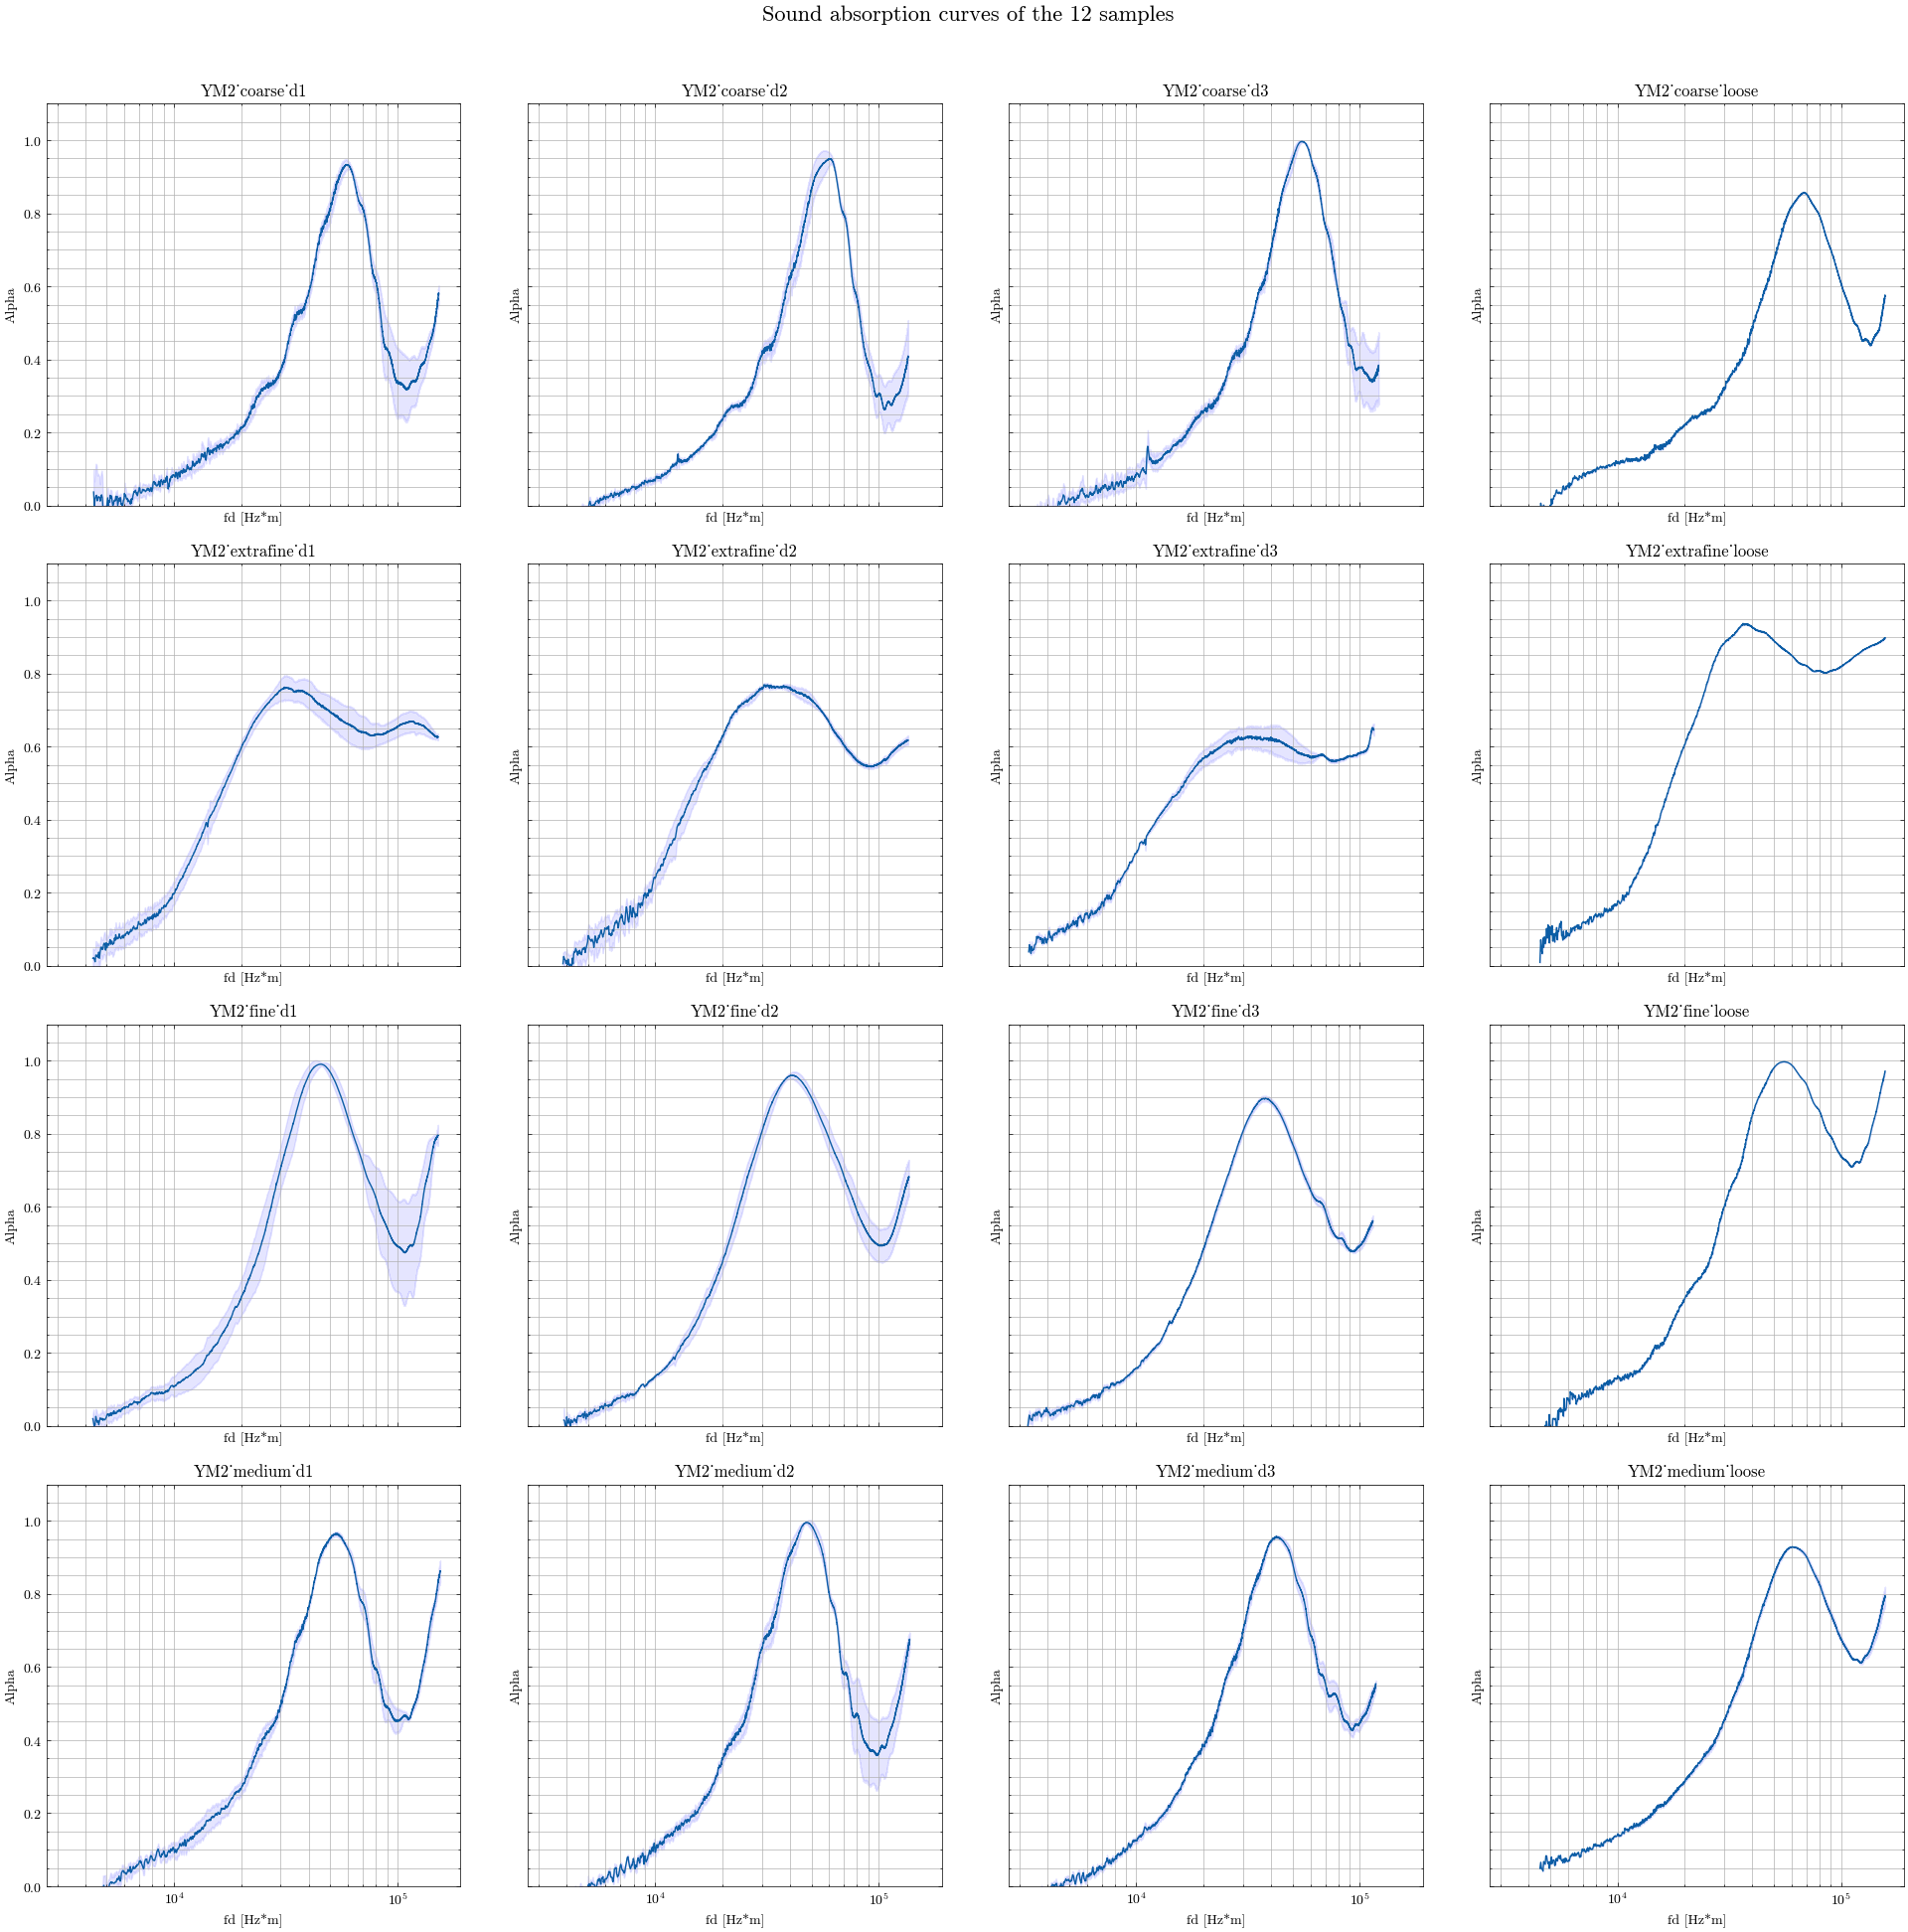

In [7]:
# Absorption vs. normalized frequency with thickness

#ncols = (samples_abs_df['density'].unique()).size   
#nrows = (samples_abs_df['granul'].unique()).size  

nrows = 4
ncols = 4
colsize = 20
rowsize = 20

fig, ax = plt.subplots(nrows, ncols, figsize=(colsize, rowsize), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)

freq = np.array(samples_abs_df.iloc[0]['freq'])

fontsize=15

for i, axe in enumerate(ax):
    #if i == len(ax)-1:  #If the last plot is reached, break the loop
    #    break
    abs_data = np.array(samples_abs_df.iloc[i]['abs_avg'])    #Averages sound absorption coefficient between 3 equal samples
    abs_dev = np.array(samples_abs_df.iloc[i]['abs_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(np.array(samples_abs_df.iloc[i]['freq'])) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    #axe.semilogx(freq, abs_data)   
    #axe.fill_between(freq, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(fd, abs_data)      #Plot over frequency*thickness
    axe.fill_between(fd, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    #axe.set_xlabel('Frequency [Hz]')
    axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 1.1])
    axe.set_ylabel('Alpha')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Sound absorption curves of the 12 samples', fontsize=16)
plt.show()




In [12]:
#samples_abs_df.iloc[2]  

### Absorption curves vs. frequency 

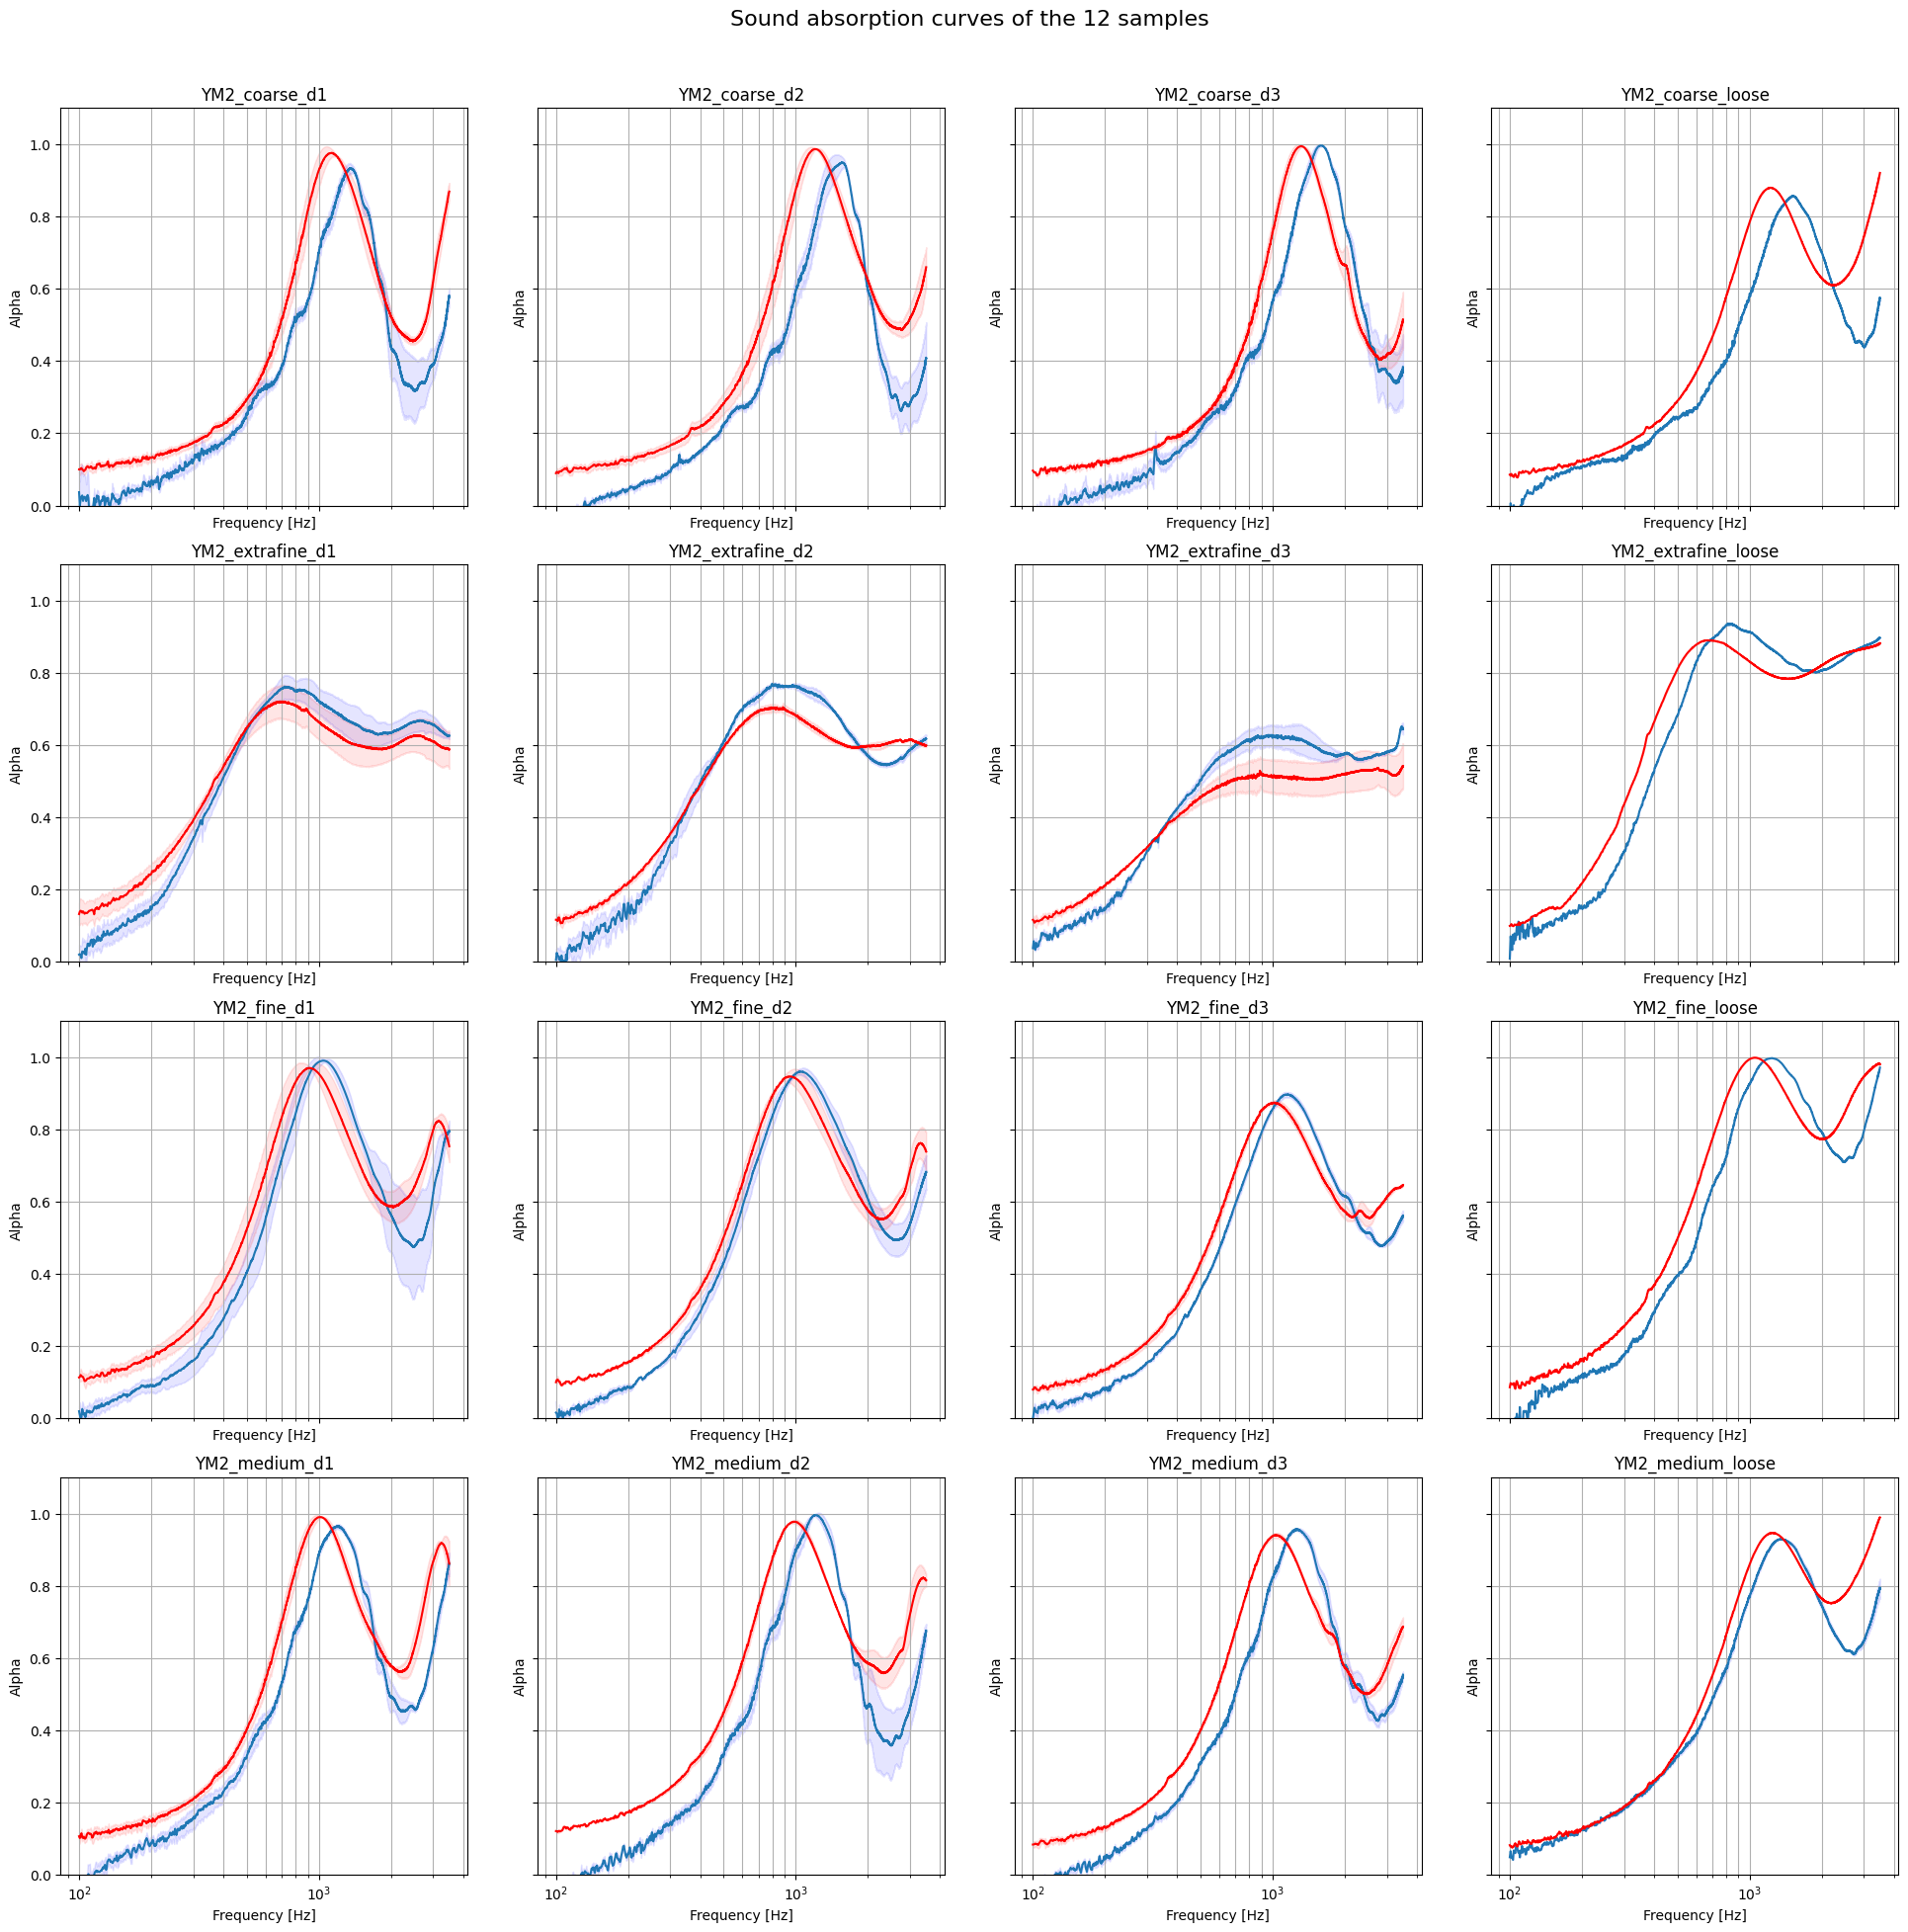

In [13]:
fig, ax = plt.subplots(nrows, ncols, figsize=(colsize, rowsize), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)


for i, axe in enumerate(ax):
    #if i == len(ax)-1:  #If the last plot is reached, break the loop
    #    break
    abs_data = np.array(samples_abs_df.iloc[i]['abs_avg'])    #Averages sound absorption coefficient between 3 equal samples
    abs_dev = np.array(samples_abs_df.iloc[i]['abs_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    
    abs_data_2mic = np.array(samples_abs_df.iloc[i]['abs_avg_2mic'])    #Averages sound absorption coefficient between 3 equal samples
    abs_dev_2mic = np.array(samples_abs_df.iloc[i]['abs_std_2mic'])     #Standard deviation within 95% confidence
    freq_2mic = np.array(samples_abs_df.iloc[i]['freq_2mic'])

    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    axe.semilogx(freq, abs_data)   
    axe.fill_between(freq, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)

    if abs_data_2mic.size > 1:
        axe.semilogx(freq, abs_data_2mic, c='r')   
        axe.fill_between(freq, (abs_data_2mic - abs_dev_2mic), (abs_data_2mic + abs_dev_2mic), color='r', alpha=.1)

    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    #axe.semilogx(fd, abs_data)      #Plot over frequency*thickness
    #axe.fill_between(fd, (abs_data - abs_dev), (abs_data + abs_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 1.1])
    axe.set_ylabel('Alpha')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Sound absorption curves of the 12 samples', fontsize=16)
plt.show()

### 2. Comparison betweem different granulometries

- Observations: The peak resonance is lower with finer granulometry, and for each group the peak also goes to lower frequency for greater densities.

In [14]:
samples_abs_df['thickness']

sample
YM2_coarse_d1          43.67
YM2_coarse_d2          38.67
YM2_coarse_d3          34.67
YM2_coarse_loose       45.00
YM2_extrafine_d1       43.33
YM2_extrafine_d2       38.67
YM2_extrafine_d3       33.00
YM2_extrafine_loose    45.00
YM2_fine_d1            43.33
YM2_fine_d2            39.00
YM2_fine_d3            32.67
YM2_fine_loose         45.00
YM2_medium_d1          44.33
YM2_medium_d2          39.33
YM2_medium_d3          33.67
YM2_medium_loose       45.00
Name: thickness, dtype: float64

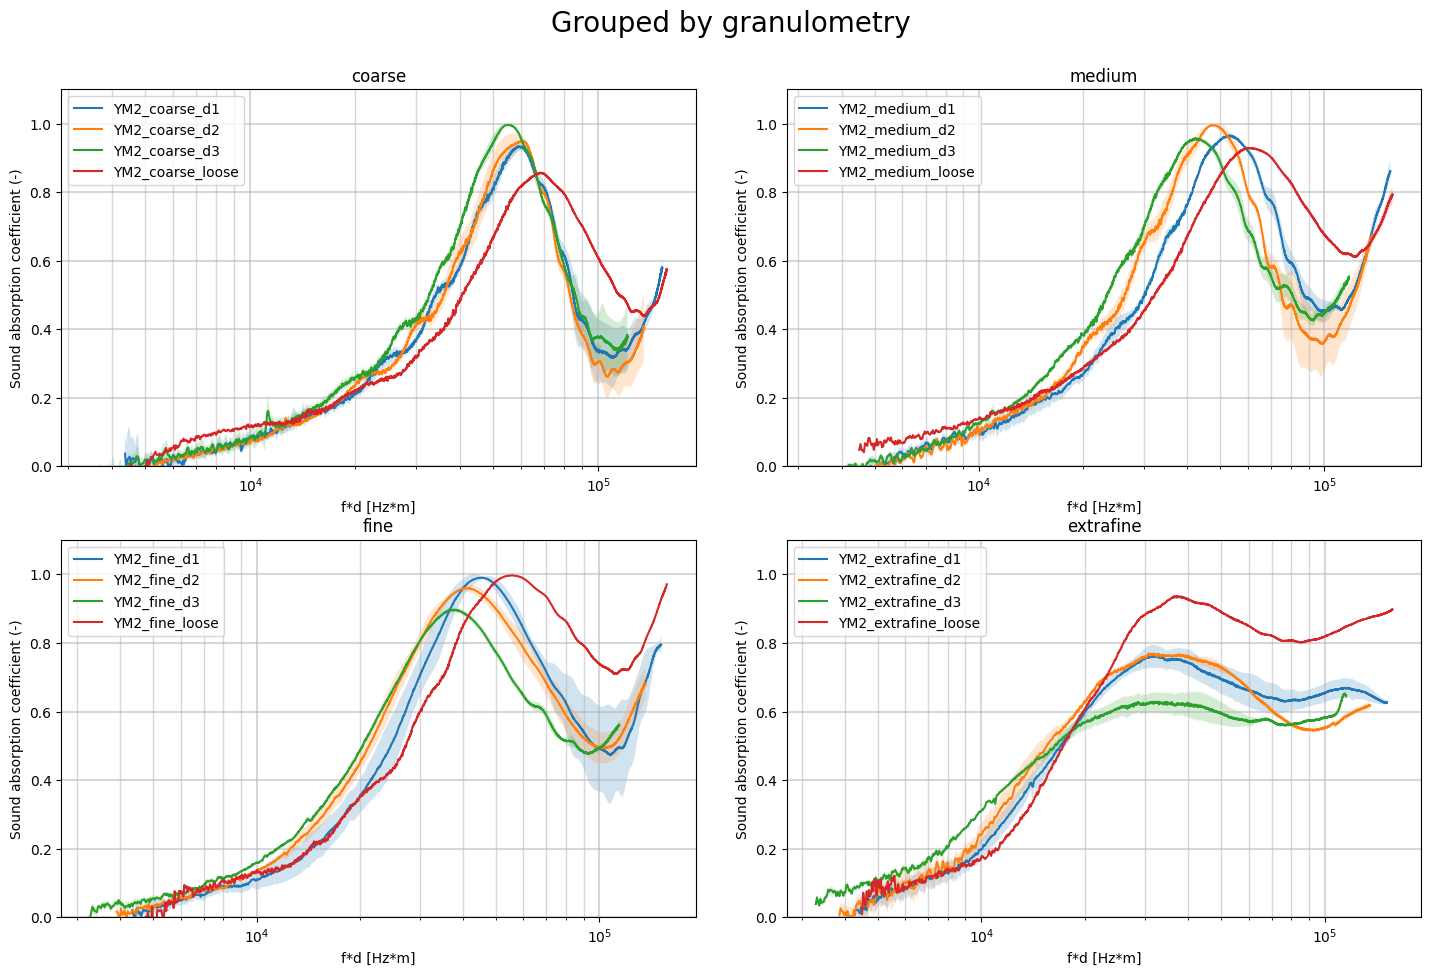

In [ ]:
#%% Comparison between granulometry

fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=3.5)
ax = ax.flatten()  #Flatten the array of axes

#Select data grouped by granulometry
group_by = ['coarse','medium','fine', 'extrafine']


for i, g in enumerate(group_by):
    granul_df = samples_abs_df[samples_abs_df['granul']==g]
    
    for j in range(granul_df.index.size):
        label = granul_df.index[j]
        label_split = label.split('-')
        label = label_split[0][0:2] + '-' + label_split[1][0:2] + '-' +label_split[2][0:2]
        alpha_avg = np.array(granul_df['abs_avg'].iloc[j])
        alpha_std = np.array(granul_df['abs_std'].iloc[j])
        
        fd = [f*granul_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].semilogx(fd, alpha_avg, label=label)
        ax[i].fill_between(fd, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, granul_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        ax[i].set_title(g)
        ax[i].set_xlabel('f*d [Hz*m]')
        ax[i].set_ylabel('Sound absorption coefficient (-)')
        ax[i].set_ylim([0, 1.1])
        ax[i].legend()
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major', alpha=.5)
        fig.suptitle('Grouped by granulometry', fontsize=20)

fig.subplots_adjust(top=0.9) 

plt.show()

In [5]:
label

'YM2_coarse_d1'

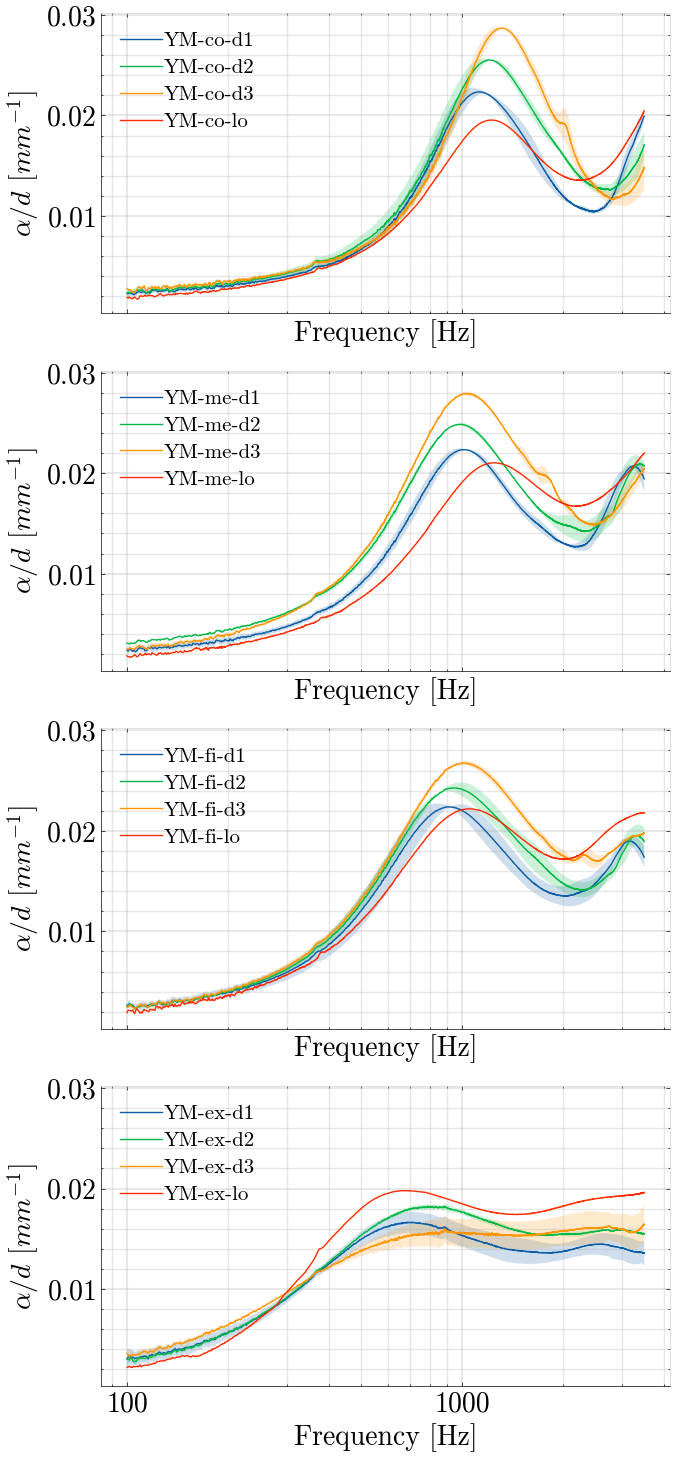

In [8]:
#%% Comparison between granulometry

fig, ax = plt.subplots(4, 1, figsize=(7,16), sharex=True, sharey=True)
fig.tight_layout(pad=3.5)
ax = ax.flatten()  #Flatten the array of axes

#Select data grouped by granulometry
group_by = ['coarse','medium','fine', 'extrafine']

fontsize=20

for i, g in enumerate(group_by):
    granul_df = samples_abs_df[samples_abs_df['granul']==g]
    
    for j in range(granul_df.index.size):
        label = granul_df.index[j]
        label_split = label.split('_')
        label = label_split[0][0:2] + '-' + label_split[1][0:2] + '-' +label_split[2][0:2]
        
        alpha_avg = np.array(granul_df['abs_avg_2mic'].iloc[j])
        alpha_std = np.array(granul_df['abs_std_2mic'].iloc[j])
        
        # if 'loose' in label:
        #     alpha_avg = np.array(granul_df['abs_avg'].iloc[j])
        #     alpha_std = np.array(granul_df['abs_std'].iloc[j])
        
        fd = [f*granul_df['thickness'].iloc[j] for f in (freq)]
        norm_abs = np.array([a/(granul_df['thickness'].iloc[j]*1e-0) for a in (alpha_avg)])
        norm_std_abs = np.array([a/(granul_df['thickness'].iloc[j]*1e-0) for a in (alpha_std)])
        

        if alpha_avg.size > 1:
            # ax[i].semilogx(freq, alpha_avg, label=label)
            # ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
            # ax[i].semilogx(fd, alpha_avg, label=label)
            # ax[i].fill_between(fd, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
            ax[i].semilogx(freq, norm_abs, label=label)
            ax[i].fill_between(freq, (norm_abs - norm_std_abs), ((norm_abs + norm_std_abs)),  alpha=.2)
        
        #ax[i].semilogx(freq, granul_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        # ax[i].set_title(g)
        ax[i].set_xlabel('Frequency [Hz]', fontsize=fontsize)
        ax[i].set_ylabel(r'$\alpha/d$ [$mm^{-1}$]', fontsize=fontsize)
        # ax[i].set_ylim([0, 1.1])
        # ax[i].set_ylim([0, 0.05])
        # ax[i].legend(fontsize=fontsize-4)
        legend =ax[i].legend(fontsize=fontsize-5, labelspacing=0.4,  handletextpad=0.1, loc='best')
        legend.set_frame_on(False)
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major', alpha=.5)
        # fig.suptitle('Grouped by granulometry', fontsize=20)
        ax[i].grid(which='both', alpha=0.3)
        # ax[i].set_xlim([100, 3500])
        ax[i].tick_params(axis='both', labelsize=fontsize)
        ax[i].spines['right'].set_color('lightgrey')
        ax[i].spines['top'].set_color('lightgrey')
        ax[i].set_xticks([100, 1000])
        ax[i].set_xticklabels([100, 1000])
        
        # ax[i].set_xticks([100, 1000])
        # ax[i].set_xticklabels([100, 1000])

fig.subplots_adjust(top=0.9) 

plt.show()

### 3. Comparison betweem different densities

- Observations: For each density the peak absorption goes lower in frequency when increasing the density. The less variation or ripple in the curve probably is due the higher porosity for finer granulometry.

In [969]:

granul_df['thickness'].iloc[j]*1e-3



0.045

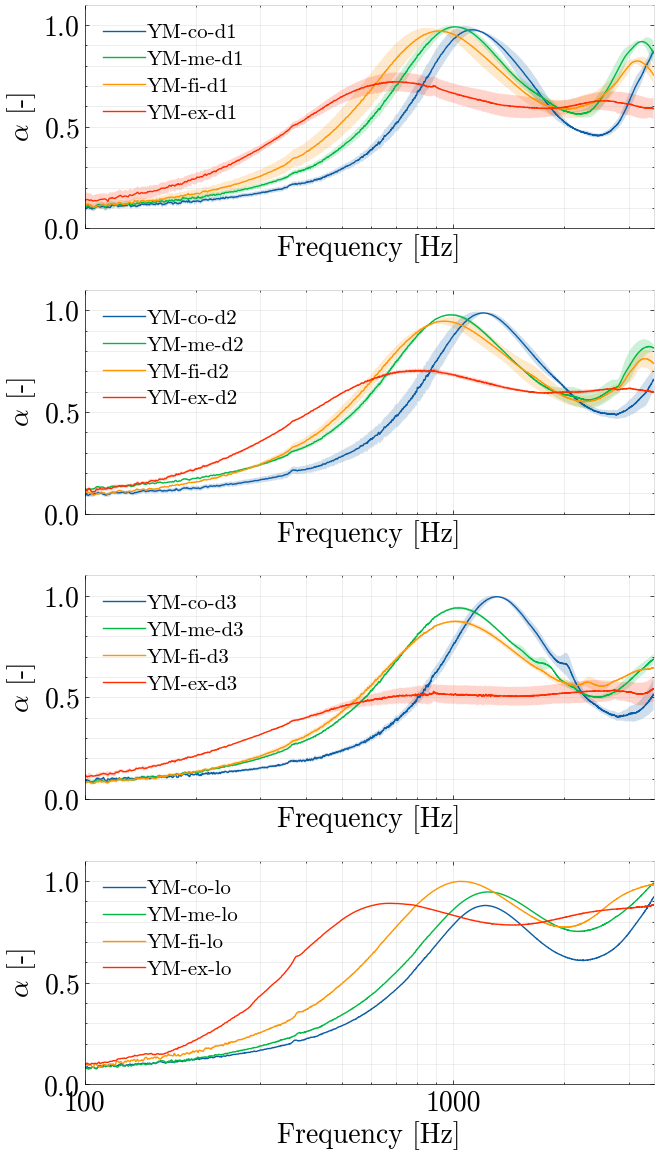

In [ ]:

fig, ax = plt.subplots(4, 1, figsize=(7,12), sharex=True)
fig.tight_layout(pad=3.5)

#Select data grouped by density
group_by = ['d1','d2','d3', 'd0']
custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

fontsize=20

for i, g in enumerate(group_by):
    dens_df = samples_abs_df[samples_abs_df['density']==g]
    
    for j, gran in enumerate(custom_order_granul):
        subset = dens_df[dens_df['granul']==gran]
        label = subset.index[0]
        label_split = label.split('-')
        label = label_split[0][0:2] + '-' + label_split[1][0:2] + '-' +label_split[2][0:2]
        
        alpha_avg = np.array(subset['abs_avg_2mic'][0])  
        alpha_std = np.array(subset['abs_std_2mic'][0])  
        # label = dens_df.index[j]
        # alpha_avg = np.array(dens_df['abs_avg_2mic'].iloc[j])  
        # alpha_std = np.array(dens_df['abs_std_2mic'].iloc[j])  
        
        fd = [f*dens_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].semilogx(freq, alpha_avg, label=label)
        ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, dens_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        # ax[i].set_title(g)
        ax[i].set_xlabel('Frequency [Hz]', fontsize=fontsize)
        ax[i].set_ylabel(r'$\alpha$ [-]', fontsize=fontsize)
        ax[i].set_ylim([0, 1.1])
        ax[i].set_xlim([100, 3500])
        # ax[i].legend(fontsize=fontsize-4)
        legend =ax[i].legend(fontsize=fontsize-5, labelspacing=0.4,  handletextpad=0.1, loc='best')
        legend.set_frame_on(False)
        # ax[i].grid(axis='both', color = 'lightgrey')
        # ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.1, color = 'lightgrey')
        # ax[i].grid(linewidth=1.5, which='major', alpha=.5)
        # ax[i].tick_params(axis ='both', length=5, width=1, color='lightgray')
        ax[i].grid(which='both', alpha=0.3)
        ax[i].tick_params(axis='both', labelsize=fontsize)
        ax[i].spines['right'].set_color('lightgrey')
        ax[i].spines['top'].set_color('lightgrey')
        ax[i].set_xticks([100, 1000])
        ax[i].set_xticklabels([100, 1000])
        # for spine in ax[i].spines.values():
        #     spine.set_color('lightgrey')  # Change spine color to light grey

        #fig.suptitle('Grouped by density', fontsize=20)
#fig.subplots_adjust(top=0.93)
plt.show()

In [193]:
g

'loose'

In [194]:
samples_abs_df


abs_avg  \
sample                                                                   
YM2-coarse-d1        [0.037014348597566395, -0.0002790158107506315,...   
YM2-coarse-d2        [-0.06983603614957273, -0.08883662278694338, -...   
YM2-coarse-d3        [-0.07121204240303304, -0.06916316669848806, -...   
YM2-coarse-loose     [-0.0213207777093445, 0.00641654353927978, -0....   
YM2-extrafine-d1     [0.020355672068084966, 0.022178808757375112, 0...   
YM2-extrafine-d2     [0.00566246517529856, 0.0252841835186331, 0.01...   
YM2-extrafine-d3     [0.03806168992325497, 0.057423228074560094, 0....   
YM2-extrafine-loose  [0.00917281883098864, 0.0710852984938593, 0.04...   
YM2-fine-d1          [0.019824363528538832, 0.009112588263039666, -...   
YM2-fine-d2          [0.0159113749702112, 0.014339943440498234, 3.9...   
YM2-fine-d3          [-0.0009920304187225639, 0.013886677653820132,...   
YM2-fine-loose       [-0.0324992872965886, -0.0678358823225986, -0....   
YM2-medium-d1        [-0.05991272997193834, -0.047815100971310996, ...   
YM2-medium-d2        [-0.05159762065502458, -0.0558354289387466, -0...   
YM2-medium-d3        [-0.0277410596093554, -0.0345921347878151, -0....   
YM2-medium-loose     [0.0486381237154464, 0.0653266631663067, 0.047...   

                                                               abs_std  \
sample                                                                   
YM2-coarse-d1        [0.062171432647910654, 0.06674056711698191, 0....   
YM2-coarse-d2        [0.03397952844193738, 0.03665127438181879, 0.0...   
YM2-coarse-d3        [0.06567331041078205, 0.06668797215242919, 0.0...   
YM2-coarse-loose     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
YM2-extrafine-d1     [0.026968878674691176, 0.02411336916561064, 0....   
YM2-extrafine-d2     [0.03059818999315359, 0.011714638261217002, 0....   
YM2-extrafine-d3     [0.0005466241849165077, 0.009400735863167765, ...   
YM2-extrafine-loose  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
YM2-fine-d1          [0.014778067877395747, 0.035764186534268834, 0...   
YM2-fine-d2          [0.0324413414416027, 0.0034970790969729394, 0....   
YM2-fine-d3          [0.011959978408555384, 0.017532943683981814, 0...   
YM2-fine-loose       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
YM2-medium-d1        [0.039642822824263006, 0.03158933936470011, 0....   
YM2-medium-d2        [0.03931736865589045, 0.03942176298217891, 0.0...   
YM2-medium-d3        [0.005099056791086473, 0.009774760307656786, 0...   
YM2-medium-loose     [0.0008552323275284212, 0.0008434248253467931,...   

                                                          abs_avg_2mic  \
sample                                                                   
YM2-coarse-d1        [0.09997090610271253, 0.09957089364470217, 0.1...   
YM2-coarse-d2        [0.08952602024664373, 0.09337805214071022, 0.0...   
YM2-coarse-d3        [0.09671971400203856, 0.0931144891104204, 0.09...   
YM2-coarse-loose     [0.08568005394533569, 0.0825384301891935, 0.08...   
YM2-extrafine-d1     [0.13269777558060333, 0.139464354518614, 0.141...   
YM2-extrafine-d2     [0.116846727990846, 0.116434840490395, 0.11332...   
YM2-extrafine-d3     [0.11653168346472632, 0.11429744399098767, 0.1...   
YM2-extrafine-loose  [0.0999211902231213, 0.100602108164163, 0.1048...   
YM2-fine-d1          [0.11328277524047033, 0.11512350141690303, 0.1...   
YM2-fine-d2          [0.10016751541761859, 0.10635310308205108, 0.1...   
YM2-fine-d3          [0.07980577615334454, 0.08098480291658576, 0.0...   
YM2-fine-loose       [0.0862140920117616, 0.097620079161694, 0.0956...   
YM2-medium-d1        [0.10666048420977044, 0.1016407778120979, 0.10...   
YM2-medium-d2        [0.12106685575743299, 0.12047497224473934, 0.1...   
YM2-medium-d3        [0.08374347390569997, 0.08403054509882807, 0.0...   
YM2-medium-loose     [0.0821157020430294, 0.0779489714549343, 0.079...   

                                                          abs_st

General observations:

### 4. Implementation of analytical models and inverse estimation of the macroscopical parameters

- Various analytical models: JCA, JCAL, HS, ...
- Estimation of the dynamic effective density and bulk modulus
- Estimation of the macroscopical parameters of the materials

In [23]:
import analmodels as am
import invmethods as im 
from analmodels import *

#Sample to analyze
#sample_selected = samples_abs_df.iloc[3]
sample_selected= samples_abs_df.loc['YM2_extrafine_d2']   #Sample selection according to the indexes of the dataframe
freq = np.array(sample_selected['freq'])

# Input parameters
temp = 25 #Temperature [°C]
p0 = 101325  # Standard air pressure [Pa]
tK = temp + 273.15

# Initial values of JCA parameters (initial guess based on literature or measurement)
phi = 0.42  # Porosity
alpha_inf = 1.45  # Tortuosity
sigma = 6000
r_por = 0.22  # std dev of size pore
lamb = 100e-6  # Viscous characteristic length [m]
lamb_prima = 200e-6  # Thermal characteristic length [m]

d = float(sample_selected['thickness'])*1e-3  # Sample thickness [m]


# freq_data = np.arange(50, 5000, 1)
omega = 2 * np.pi * freq
v = 1.516e-5  # kinematic viscosity of air [m^2/s]
Np = 0.71  # Prandtl number for air
gamma = 1.4  # Heat capacity ratio of air
nu = 1.95e-5  # Dynamic viscosity of air [Pa.s]

eta = 7.72488e-8*tK - 5.95238e-11 * tK**2 + 2.71368e-14 * tK**3;   # Dynamic viscosity (N.s.m-2; 100 K < T < 600 K
kappa = 2.624e-02 * ( (tK/300)**(3/2) * (300 + 245.4 * np.exp(-27.6/300))/(tK+245.4*np.exp(-27.6/tK))) # Thermal conductivity  (W.m-1.K-1) - cf A. D. Pierce p 513

c0 = 20.047 * np.sqrt( tK )     # Velocity of sound in air [m/s]
rho0 = 1.290 * (p0 / 101325) * (273.15 / tK)     # kg/m3
z0 = rho0 * c0  # Characteristic impedance of air   

# -----------------------------------------------------




In [20]:
from scipy import optimize, io, special
from datetime import datetime
import invmethods as im 

# Montecarlo simulation 

def get_alpha_jca(x):
    alpha_jca, d_jca, b_jca = im.jca_model(f=freq, phi=x[0], alpha_inf=x[1], sigma=x[2], lamb=x[3], lamb_prima=x[4], d=d)
    return alpha_jca

def cost_function(y, y0):
    return np.linalg.norm((y - y0)**2)

# Perform a montecarlo to find the starting point for the minimization algorithm

alpha_measured = np.array(sample_selected['abs_avg'])  #Measured sound absorption coefficient
alpha_jca, d_jca, b_jca = im.jca_model(f=freq, phi=phi, alpha_inf=alpha_inf, sigma=sigma, lamb=lamb, lamb_prima=lamb_prima, d=d)

N = int(1e5)
porosities = np.random.uniform(low=0.4, high=0.7, size=N)
tortuosities = np.random.uniform(low=1, high=3, size=N)
resistivities = np.random.uniform(low=5000, high=3e4, size=N)
viscous_lengths = np.random.uniform(low=1e-7, high=1e-2, size=N)
#thermal_lengths = np.random.uniform(low=1e-7, high=1e-2, size=N)
thermal_lengths = viscous_lengths * np.random.uniform(low=1, high=2, size=N)
parameters = np.stack(
    [
        porosities,
        tortuosities,
        resistivities,
        viscous_lengths,
        thermal_lengths
    ],
    axis=-1
)
# Pre-filter valid candidates
valid_candidates = np.array([x for x in parameters if x[3] <= x[4]])
valid_candidates.shape

# %%
start_time = datetime.now()
start_points = np.array([0.4, 1.1, 2000, 100e-6, 200e-6])
# Find the candidate with the minimum cost
x0, err = min(
    ((x, cost_function(get_alpha_jca(x), alpha_measured)) for x in valid_candidates),
    key=lambda item: item[1],
    default=(np.ones(5), cost_function(get_alpha_jca(start_points), alpha_measured))
)

print(f'error: {err},\nsolution: {x0},\nexecution time: {datetime.now() - start_time}')

# %%
def residuals(y, y0):
    r = (y - y0) / y0
    return np.concatenate([r.real, r.imag])

# %%
sol = optimize.least_squares(
    lambda x: residuals(get_alpha_jca(x), alpha_measured),
    x0 = x0,
    bounds = ([0.1, 1, 1000, 1e-8, 1e-8], [0.9, 10, 1e5, 1e-2, 1e-2]),
    method = 'trf',
    tr_solver = 'exact',
    jac = '3-point',
)
sol





error: 0.9130830133690462,
solution: [5.67835708e-01 2.56946042e+00 2.67810574e+04 4.50169893e-05
 8.91445357e-05],
execution time: 0:02:19.411561


     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-2.905e-01 -8.379e-01 ...  0.000e+00  0.000e+00]
           x: [ 3.983e-01  1.000e+00  1.000e+03  2.426e-05  4.575e-05]
        cost: 227.94572638068513
         jac: [[ 1.774e+00  6.897e-01 ... -3.034e+04  2.546e+03]
               [ 4.053e-01  1.577e-01 ... -6.937e+03  5.794e+02]
               ...
               [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
               [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
        grad: [-2.050e-01  2.054e+01  1.078e-04  1.102e+03  2.434e+02]
  optimality: 0.10282740546615231
 active_mask: [ 0  0 -1  0  0]
        nfev: 17
        njev: 12

[5.67835708e-01 2.56946042e+00 2.67810574e+04 4.50169893e-05
 8.91445357e-05]
[3.98283938e-01 1.00000566e+00 1.00000000e+03 2.42631524e-05
 4.57461183e-05]


array([1., 1., 1., 1., 1.])

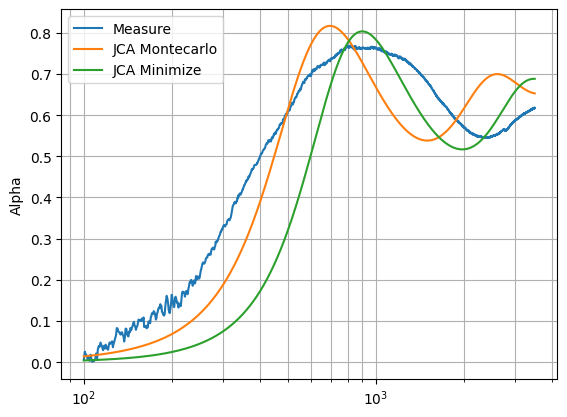

In [21]:
# %%
alpha_montecarlo = get_alpha_jca(x0)
alpha_opt = get_alpha_jca(sol.x)
print(x0)
print(sol.x)

#
fig,ax = plt.subplots(1,1,sharex=True)
ax.semilogx(freq, np.abs(alpha_measured), label='Measure')
ax.semilogx(freq, (alpha_montecarlo), label='JCA Montecarlo')
ax.semilogx(freq, np.abs(alpha_opt), label='JCA Minimize')
ax.grid(which='both')
ax.set_ylabel("Alpha")
ax.legend()
np.ones(5)

In [186]:
import analmodels as am
from invmethods import *
from scipy.optimize import curve_fit, minimize, least_squares
from scipy.optimize import differential_evolution, basinhopping, NonlinearConstraint


sample_selected= samples_abs_df.loc['YM2-fine-d3']   #Sample selection according to the indexes of the dataframe
d = float(sample_selected['thickness'])*1e-3  # Sample thickness [m]
freq = np.array(sample_selected['freq'])
abs_meas = np.array(sample_selected['abs_avg'])

# Johnson-Champoux-Allard (JCA) model
d_JCA = am.dens_JCA(phi, alpha_inf, sigma, lamb, nu, rho0, omega)
b_JCA = am.bulk_JCA(phi, lamb_prima, p0, Np, gamma, nu, rho0, omega)

Zc_JCA = np.sqrt(d_JCA * b_JCA)  # Surface impedance
k_JCA = omega * np.sqrt(d_JCA / b_JCA)
z_JCA = -1j * Zc_JCA * (1/np.tan(k_JCA * d)) # Rigid back end
alpha_JCA = 1 - np.abs((z_JCA - z0) / (z_JCA + z0)) ** 2

# Test wilson model 

tau_vor = 0.5e-3 # in [ms]
tau_ent = 0.5e-3  # in [ms]
rho_inf = (rho0 * alpha_inf) / phi #from Luc page
k_inf =  (p0 * gamma) / phi
s_por = 2e-3 


# abs_ws, d_ws, b_ws = wilson_stinson_model(freq_data, phi, alpha_inf, sigma, rho_inf, k_inf, tau_vor, tau_ent, d)
abs_ws, d_ws, b_ws = horosh_model(freq, phi, alpha_inf, s_por, 0.94, d)
#abs_ws, d_ws, b_ws = jca_model(freq, phi, alpha_inf, sigma, lamb, lamb_prima, d)
z_ws = np.sqrt(d_ws * b_ws)  # Characteristic impedance
k_ws = omega * np.sqrt(d_ws / b_ws)
zs_ws = -1j * z_ws * (1/np.tan(k_ws * d)) # Rigid back end

# Minimization process
# ----------------------------------------------------------------------

inv_parameters = {}
keys = ['start_points', 'curvefit_param', 'minimize_param', 'diff_evol_param', 'diff_evol_lq_param']
inv_parameters = {key: [] for key in keys}

num_iterations = 20  # Number of iterations to start with different random points for lamb and lambprime

for i in range(num_iterations):

      lamb = np.random.uniform(low=0.1e-6, high=1000e-6)
      lamb_prima = np.random.uniform(low=0.1e-6, high=1000e-6)
      

      startpt = {'phi': sample_selected['porosity_estimated'], 
            'alpha_inf': sample_selected['tortuosity_estimated'], 
            'sigma': sample_selected['sigma_estimated'], 
            'lamb': lamb, 
            'lamb_prima': lamb_prima, 
            'k0_prima': 1e-9,  
            's_por': 1.5e-3, 
            'dev_por': 0.72,
            'k_inf': k_inf,
            'rho_inf': rho_inf,
            'tau_vor': 0.5e-3,
            'tau_ent': 0.5e-3 
            }  

      lb = {'phi': sample_selected['porosity_estimated']*0.9,
            'alpha_inf': sample_selected['tortuosity_estimated']*0.9,
            'sigma': sample_selected['sigma_estimated']*0.9,
            'lamb': 0.22e-6,
            'lamb_prima': 0.22e-6,
            'k0_prima': 1e-10,
            's_por': 0.5e-6, 
            'dev_por': 0.14,
            'k_inf': k_inf * 0.5,
            'rho_inf': rho_inf * 0.5,
            'tau_vor': 0.05e-3,
            'tau_ent': 0.05e-3 
            }

      ub = {'phi': sample_selected['porosity_estimated']*1.1, 
            'alpha_inf': sample_selected['tortuosity_estimated']*1.1, 
            'sigma': sample_selected['sigma_estimated']*1.1, 
            'lamb': 1000e-6, 
            'lamb_prima': 1000e-6, 
            'k0_prima': 1e-8, 
            's_por': 0.5e-1, 
            'dev_por': 0.94,
            'k_inf': k_inf * 1.5,
            'rho_inf': rho_inf * 1.5,
            'tau_vor': 2.5e-3,
            'tau_ent': 2.5e-3 
            }

      if 'extrafine' in sample_selected.name:
            alpha_inf = np.random.uniform(low=1, high=5)
            startpt['alpha_inf']= alpha_inf
            lb['alpha_inf']= alpha_inf*0.8
            ub['alpha_inf']= alpha_inf*1.2
            
            startpt['lamb']= 43.86e-6
            lb['lamb']= startpt['lamb']*0.9
            ub['lamb']= startpt['lamb']*1.1
            
            startpt['lamb_prima']= 140.62e-6
            lb['lamb_prima']= startpt['lamb_prima']*0.9
            ub['lamb_prima']= startpt['lamb_prima']*1.1
      xdata = freq
      ydata = abs_meas


      # CURVEFIT method
      def wrapper(f, *params):
            abs_jca, d_jca, b_jca = jca_model(f, *params, d)
            return abs_jca

      lb_jca = list([lb['phi'], lb['alpha_inf'], lb['sigma'], lb['lamb'], lb['lamb_prima']])  # Lower bound of parameters
      ub_jca = list([ub['phi'], ub['alpha_inf'], ub['sigma'], ub['lamb'], ub['lamb_prima']])  # Upper bound of parameters
      startpt_jca = list([startpt['phi'], startpt['alpha_inf'], startpt['sigma'], startpt['lamb'], startpt['lamb_prima']])
      coef_JCA, cov = curve_fit(wrapper, xdata, ydata, p0=startpt_jca, bounds=(lb_jca, ub_jca))
      alpha_jca_optimized_curvefit, d_JCA, b_JCA = jca_model(freq, *coef_JCA, d)

      # MINIMIZE method
      def cost_function(params):
            alpha_jca, d_jca, b_jca = jca_model(freq, *params, d)
            return np.sum((abs_meas - alpha_jca) ** 2)

      # Define the nonlinear constraint: x[3] < x[4]
      def constraint_fun(x):
            return x[4] - x[3]  # x[4] - x[3] >= 0 ensures x[3] < x[4]

      # Create the nonlinear constraint object
      nl_cons = NonlinearConstraint(constraint_fun, 0, float('inf'))

      bounds = (list(zip(lb_jca, ub_jca)))
      result = minimize(cost_function, startpt_jca, method='SLSQP', bounds=bounds,constraints=[nl_cons])#, options={'maxiter': 1000})   # SLSQP or 'trust-constr' supports constraints
      coef_JCA2 = result.x
      alpha_jca_optimized_curvefit2, d_JCA2, b_JCA2 = jca_model(freq, *coef_JCA2, d)

      # Global search with DIFFERENTIAL EVOLUTION
      popsize = 15 # Population size for differential evolution

      result2 = differential_evolution(cost_function, bounds=bounds, maxiter=2000, popsize=popsize, mutation=1.2, tol=1e-6, constraints=(nl_cons,))
      coef_JCA3 = result2.x
      alpha_jca_optimized_curvefit3, d_JCA3, b_JCA3 = jca_model(freq, *coef_JCA3, d)

      # Local refinement
      #result_local = minimize(cost_function, result2.x, method='L-BFGS-B', bounds=bounds)
      result_local = least_squares(cost_function, x0=result2.x, bounds=(lb_jca, ub_jca), method = 'trf', tr_solver = 'exact', jac = '3-point')
      coef_JCA4 = result_local.x
      alpha_jca_optimized_curvefit4, d_JCA4, b_JCA4 = jca_model(freq, *coef_JCA4, d)

      # -----------------------------------------------------------------------

      # Plotting
      fig, ax = plt.subplots(2, 3, figsize=(20,10))
      ax = ax.flatten()
      fig.tight_layout(pad=3.5)

      #ax[0].semilogx(freq, alpha_JCA, 'b-', label='Model JCA (not optimized)', linewidth=1.5)
      ax[0].semilogx(freq, alpha_jca_optimized_curvefit, 'y-', label='Model JCA (optimized curvefit)', linewidth=1.5)
      ax[0].semilogx(freq, alpha_jca_optimized_curvefit2, 'g--', label='Model JCA (optimized minimize)', linewidth=1.5)
      ax[0].semilogx(freq, alpha_jca_optimized_curvefit3, 'r--', label='Model JCA (optimized dif. evolution)', linewidth=2)
      ax[0].semilogx(freq, alpha_jca_optimized_curvefit4, 'b--', label='Model JCA (optimized dif.evol + minimize)', linewidth=1.5)
      #ax[0].semilogx(freq, alpha_opt, 'y--', label='Model JCA (minimized with montecarlo)', linewidth=1.5)
      #ax[0].semilogx(freq, abs_ws, 'g--' ,label='Model WS (not optimized)', linewidth=1.5)
      ax[0].semilogx(freq, abs_meas, 'r-', label='Measured', linewidth=1.5, alpha=0.5)
      ax[0].set_ylabel('Absorption coefficient')
      ax[0].set_xlabel('Freq [Hz]')
      ax[0].grid(True)
      ax[0].legend(fontsize=8)
      #plt.legend(['Experimental', 'Analytical JCA', 'COMSOL JCA'], loc='northwest')

      ax[1].semilogx(freq, np.real(z_JCA / z0), 'g-', linewidth=1.5, label=r'Real($Z_{s}/Z_{0}$) model')
      ax[1].semilogx(freq, np.imag(z_JCA / z0), 'r-', linewidth=1.5)
      ax[1].semilogx(freq, np.real(zs_ws / z0), 'g--', linewidth=1.5, label=r'Real($Z_{s}/Z_{0}$) WS model')
      ax[1].semilogx(freq, np.imag(zs_ws / z0), 'r--', linewidth=1.5)
      ax[1].set_title('Surface impedance (Zs)')
      ax[1].set_ylabel('(Zs/Z0)')
      ax[1].set_xlabel('Freq [Hz]')
      ax[1].grid(True)

      #ax[2].set_ylabel('Img(Zs/Z0)')
      #ax[2].set_xlabel('Freq [Hz]')
      #ax[2].grid(True)

      ax[2].semilogx(freq, np.real(Zc_JCA / z0), 'g-', linewidth=1.5, label=r'Real($Z_{c}/Z_{0}$) model')
      ax[2].semilogx(freq, np.imag(Zc_JCA / z0), 'r-', linewidth=1.5)
      ax[2].semilogx(freq, np.real(z_ws / z0), 'g--', linewidth=1.5, label=r'Real($Z_{s}/Z_{0}$) WS model')
      ax[2].semilogx(freq, np.imag(z_ws / z0), 'r--', linewidth=1.5)
      ax[2].set_title('Characteristic impedance (Zc)')
      ax[2].set_ylabel('(Zc/Z0)')
      ax[2].set_xlabel('Freq [Hz]')
      ax[2].grid(True)


      ax[3].semilogx(freq, np.real(d_JCA / rho0), 'g-', linewidth=1.5, label=r'Real($\rho_{c}$) model')
      ax[3].semilogx(freq, np.imag(d_JCA / rho0), 'b-', linewidth=1.5, label=r'Imag($\rho_{c}$) model')
      ax[3].semilogx(freq, np.real(d_ws / rho0), 'g--', linewidth=1.5, label=r'Real($\rho_{c}$) WS model')
      ax[3].semilogx(freq, np.imag(d_ws / rho0), 'b--', linewidth=1.5, label=r'Imag($\rho_{c}$) WS model')
      ax[3].set_ylabel(r'$\rho_{c}$ (model)')
      ax[3].set_title('Dynamic density')
      ax[3].set_xlabel('Freq [Hz]')
      ax[3].legend()
      ax[3].grid(True)

      ax[4].semilogx(freq, np.real(k_JCA), 'g-', linewidth=1.5, label=r'Real($\k$) model')
      ax[4].semilogx(freq, np.imag(k_JCA), 'b-', linewidth=1.5, label=r'Imag($\k$) model')
      ax[4].semilogx(freq, np.real(k_ws), 'g--', linewidth=1.5, label=r'Real($\k$) WS model')
      ax[4].semilogx(freq, np.imag(k_ws), 'b--', linewidth=1.5, label=r'Imag($\k$) WS model')
      ax[4].set_ylabel(r'$\k$ (model)')
      ax[4].set_title('Wavenumber (k)')
      ax[4].set_xlabel('Freq [Hz]')
      ax[4].legend()
      ax[4].grid(True)

      c_JCA = (2 * np.pi * freq) / k_JCA
      ax[5].semilogx(freq, np.real(c_JCA), 'g-', linewidth=1.5, label=r'Real($c$) model')
      ax[5].semilogx(freq, np.imag(c_JCA), 'b-', linewidth=1.5, label=r'Imag($c$) model')
      ax[5].set_ylabel(r'$\c$ (model)')
      ax[5].set_title('Velocity of sound (c)')
      ax[5].set_xlabel('Freq [Hz]')
      ax[5].legend()
      ax[5].grid(True)

      start_points_jca = [round(startpt_jca[0], 2), round(startpt_jca[1], 2), round(startpt_jca[2], 2), round(startpt_jca[3]*1e6, 2), round(startpt_jca[4]*1e6, 2)]
      curvefit_param = [round(coef_JCA[0], 2), round(coef_JCA[1], 2), round(coef_JCA[2], 2), round(coef_JCA[3]*1e6, 2), round(coef_JCA[4]*1e6, 2)]
      minimize_param = [coef_JCA2[0], coef_JCA2[1], coef_JCA2[2], coef_JCA2[3]*1e6, coef_JCA2[4]*1e6]
      minimize_param = [round(x, 2) for x in minimize_param]
      diffevol_param = [coef_JCA3[0], coef_JCA3[1], coef_JCA3[2], coef_JCA3[3]*1e6, coef_JCA3[4]*1e6]
      diffevol_param = [round(x, 2) for x in diffevol_param]
      diffevol_lq_param = [coef_JCA4[0], coef_JCA4[1], coef_JCA4[2], coef_JCA4[3]*1e6, coef_JCA4[4]*1e6]
      diffevol_lq_param = [round(x, 2) for x in diffevol_param]
      
      print(f'JCA starting points: {start_points_jca}')
      print(f'JCA parameters curvefit: {curvefit_param}')
      print(f'JCA parameters minimize: {minimize_param}')
      print(f'JCA parameters diff. evol: {diffevol_param}')
      print(f'JCA parameters diff. evol + least square: {diffevol_lq_param}')
      
      inv_parameters['start_points'].append(start_points_jca)
      inv_parameters['curvefit_param'].append(curvefit_param)
      inv_parameters['minimize_param'].append(minimize_param)
      inv_parameters['diff_evol_param'].append(diffevol_param)
      inv_parameters['diff_evol_lq_param'].append(diffevol_lq_param)
      
      
#print(lamb, lamb_prima)

# Analytical viscous characteristic length:



# Analytical viscous characteristic length:


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
print("Optimal solution (x):", result2.x)
print("Function value at optimum:", result2.fun)
print("Number of iterations:", result2.nit)
print("Number of function evaluations:", result2.nfev)
print("Success status:", result2.success)
print("Message:", result2.message)


# for algo, runs in inv_parameters.items():
#     print(algo)
#     for run_idx, run_params in enumerate(runs):
#         print(f'Run {run_idx+1}: {run_params}')

# 'extrafine' in sample_selected.name
        

Optimal solution (x): [6.16000000e-01 4.19627986e+00 1.06619700e+05 4.65188349e+01
 1.26725065e+02]
Function value at optimum: 30.5229339367799
Number of iterations: 161
Number of function evaluations: 17064
Success status: True
Message: Optimization terminated successfully.


In [ ]:
inv_parameters

{'start_points': [[0.47, 2.14, 29648, 192.68, 943.52],
  [0.47, 2.14, 29648, 819.88, 945.66],
  [0.47, 2.14, 29648, 473.34, 13.42],
  [0.47, 2.14, 29648, 570.85, 871.23],
  [0.47, 2.14, 29648, 254.77, 203.7],
  [0.47, 2.14, 29648, 984.48, 902.44],
  [0.47, 2.14, 29648, 358.24, 751.52],
  [0.47, 2.14, 29648, 719.82, 990.9],
  [0.47, 2.14, 29648, 640.65, 329.81],
  [0.47, 2.14, 29648, 922.86, 531.33],
  [0.47, 2.14, 29648, 452.18, 650.51],
  [0.47, 2.14, 29648, 745.61, 676.76],
  [0.47, 2.14, 29648, 664.37, 94.37],
  [0.47, 2.14, 29648, 207.28, 452.56],
  [0.47, 2.14, 29648, 57.8, 514.95],
  [0.47, 2.14, 29648, 496.64, 375.26],
  [0.47, 2.14, 29648, 866.47, 981.63],
  [0.47, 2.14, 29648, 656.55, 664.12],
  [0.47, 2.14, 29648, 92.79, 923.07],
  [0.47, 2.14, 29648, 692.41, 611.6]],
 'curvefit_param': [[0.5, 2.26, 29832.91, 71.23, 168.25],
  [0.51, 2.21, 30182.58, 65.67, 185.02],
  [0.49, 2.06, 27515.13, 59.21, 180.31],
  [0.51, 2.21, 26684.01, 65.25, 193.98],
  [0.48, 2.25, 32324.75, 64.65

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
import seaborn as sns

columns_name = ['Porosity', 'Tortuosity', 'Resistivity', 'Viscous characteristic lenght', 'Thermal characteristic length']
column_index = 4
records = []
fontsize=24

for algo, runs in inv_parameters.items():
    for run_idx, run_params in enumerate(runs):
        parameter_value = run_params[column_index]
        records.append({
            'Algorithm': algo,
            'Run': run_idx + 1,
            'Parameter': parameter_value
        })
        
df = pd.DataFrame(records)
df = df[df['Algorithm'] != 'diff_evol_lq_param']

# Apply Min-Max scaling within each algorithm
df['MinMax_Scaled'] = 0.0
for algo in df['Algorithm'].unique():
    mask = df['Algorithm'] == algo
    scaler = MaxAbsScaler()  # Scale each feature by its maximum absolute value.
    df.loc[mask, 'MinMax_Scaled'] = scaler.fit_transform(df.loc[mask, ['Parameter']])

# Plot scaled data
plt.figure(figsize=(10, 8))

ax=sns.boxplot(x='Algorithm', y='MinMax_Scaled', data=df, palette='Set2')
ax= sns.stripplot(x='Algorithm', y='MinMax_Scaled', data=df, color='black', alpha=0.6, jitter=0.1)
# plt.title('Min-Max Scaled Variation of Parameter across Algorithms')
plt.ylabel('Normalized Viscous Characteristic Length')
 
tick_positions = [0, 1, 2, 3]
tick_labels = ['Initial value', 'Curvefit', 'Minimize', 'Differential \n Evolution']

# Set custom ticks and labels
plt.xticks(tick_positions, tick_labels)

ax.grid(which='both', alpha=0.3)

ax.set_xlabel(None, fontsize=fontsize)
# ax.set_ylabel(f'Normalized {columns_name[column_index]}' ,fontsize=fontsize)
ax.set_ylabel(r"Normalized $\Lambda^{'}$ [-]" ,fontsize=fontsize)
#ax.legend(fontsize=fontsize-4)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')

plt.show()

NameError: name 'inv_parameters' is not defined

In [ ]:
df['Algorithm']

0           start_points
1           start_points
2           start_points
3           start_points
4           start_points
             ...        
95    diff_evol_lq_param
96    diff_evol_lq_param
97    diff_evol_lq_param
98    diff_evol_lq_param
99    diff_evol_lq_param
Name: Algorithm, Length: 100, dtype: object

C:\Users\joaqu\AppData\Local\Temp\ipykernel_173492\2068510927.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.boxplot(x='Algorithm', y='Parameter', data=df, palette='Set2')


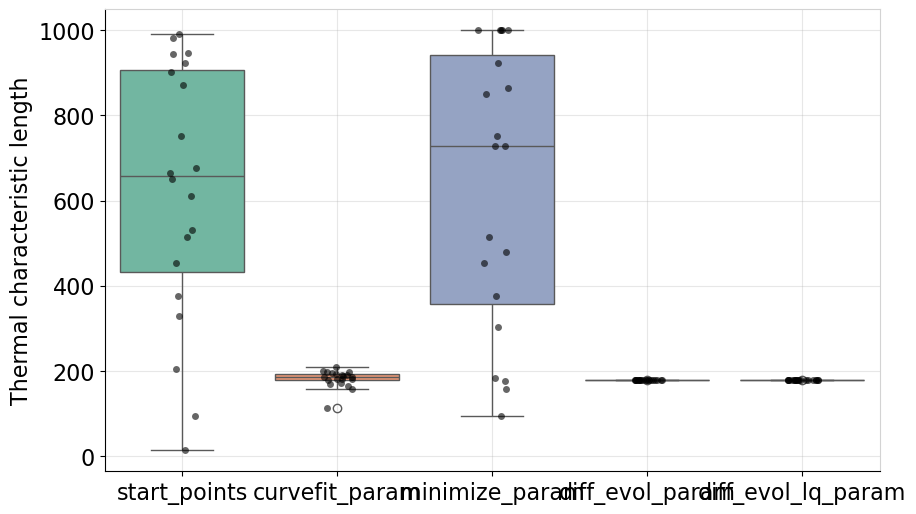

In [ ]:
# NOT NORMALIZED

columns_name = ['Porosity', 'Tortuosity', 'Resistivity', 'Viscous characteristic lenght', 'Thermal characteristic length']
column_index = 4
records = []

for algo, runs in inv_parameters.items():
    for run_idx, run_params in enumerate(runs):
        parameter_value = run_params[column_index]
        records.append({
            'Algorithm': algo,
            'Run': run_idx + 1,
            'Parameter': parameter_value
        })
        
df = pd.DataFrame(records)

# Plot with seaborn: boxplot + stripplot
plt.figure(figsize=(10, 6))
ax= sns.boxplot(x='Algorithm', y='Parameter', data=df, palette='Set2')
ax=sns.stripplot(x='Algorithm', y='Parameter', data=df, color='black', alpha=0.6, jitter=True)
plt.ylabel(f'{columns_name[column_index]}')
ax.grid(which='both', alpha=0.3)

ax.set_xlabel(None, fontsize=fontsize)
ax.set_ylabel(f'{columns_name[column_index]}' ,fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')

plt.show()


### Inverse estimation 

Estimation of the macroscopical parameters by inverse methods. A cost function is minimized and the absortion curves fitted using different methods (LS,..) and analytic models

#### Analytical models:
- JCA model
- JCAL model
- HS model
- ...

#### Optimization method:
- Non lineal Least Square
- Genetic algorithms
- Neural networks
- ...

In [ ]:
samples_abs_df.index

Index(['YM2_coarse_d1', 'YM2_coarse_d2', 'YM2_coarse_d3', 'YM2_coarse_loose',
       'YM2_extrafine_d1', 'YM2_extrafine_d2', 'YM2_extrafine_d3',
       'YM2_extrafine_loose', 'YM2_fine_d1', 'YM2_fine_d2', 'YM2_fine_d3',
       'YM2_fine_loose', 'YM2_medium_d1', 'YM2_medium_d2', 'YM2_medium_d3',
       'YM2_medium_loose'],
      dtype='object', name='sample')

### Inverse estimation by Non Linear Least Square approach

- Faster implementation but has the risk to reach in a local minimun of the fitting (gradient approach)

In the code below it is possible to apply different analytical models for the inverse estimation process. It can be chosen between Johnson-Champoux-Allard (JCA), Johnson-Champoux-Allard-Lafarge (JCAL), Horoshenkov (HS). (to be extended) 
Given the starting guess points the values are estimated between the defined upper and lower bounds. For each method the Mean Squared Error (MSE) is calculated as a goodness descriptor of the fitting. 
The 5 macroscopical parameters porosity, tortuosity, flow resistivity, viscous characteristic length and thermal characteristic length (JCA). In case of HS the characteristic lengths are replaced by the pore size deviation. In JCAL model XX is added.

YM2_coarse_d1
YM2_coarse_d2
YM2_coarse_d3
YM2_coarse_loose
YM2_extrafine_d1
YM2_extrafine_d2
YM2_extrafine_d3
YM2_extrafine_loose
YM2_fine_d1
YM2_fine_d2
YM2_fine_d3
YM2_fine_loose
YM2_medium_d1
YM2_medium_d2
YM2_medium_d3
YM2_medium_loose


c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\joaqu\UNIBS\Paper1-YMporousmat\newSamples_journal\YM2_mediciones\invmethods.py:217: RuntimeWarning: overflow encountered in tan
  z_HS = -1j * Zc_HS * (1/np.tan(k_HS * d))
c:\Users\joaqu\UNIBS\Paper1-YMporousmat\newSamples_journal\YM2_mediciones\invmethods.py:295: RuntimeWarning: overflow encountered in tan
  z_HS = -1j * Zc_HS * (1/np.tan(k_HS * d))


Macroscopical parameters of the sample JCA
ϕ          α_∞        σ          Λ (μm)     Λ' (μm)   
0.39       1.44       2867       132.09     282.73    
Mean Squared Error (MSE): 0.00408 

Macroscopical parameters of the sample JCAL
ϕ          α_∞        σ          Λ (μm)     Λ'(μm)     k0 (1e-9)  
0.44       1.44       2867       2.46       35.73      0.76      
Mean Squared Error (MSE): 0.00217 

Macroscopical parameters of the sample HS
ϕ          alpha_inf  s_por (mm) dev_por   
0.39       1.440      12.7304    0.9400    
Mean Squared Error (MSE): 0.00636 

Macroscopical parameters of the sample WS
rho_inf    K_inf      tau_vor (ms) tau_ent (ms)
4.30       283612.14  2.4849     0.6531    
Mean Squared Error (MSE): 0.00148 Macroscopical parameters of the sample JCA
ϕ          α_∞        σ          Λ (μm)     Λ' (μm)   
0.38       1.69       4568       239.44     214.31    
Mean Squared Error (MSE): 0.00241 

Macroscopical parameters of the sample JCAL
ϕ          α_∞        σ        

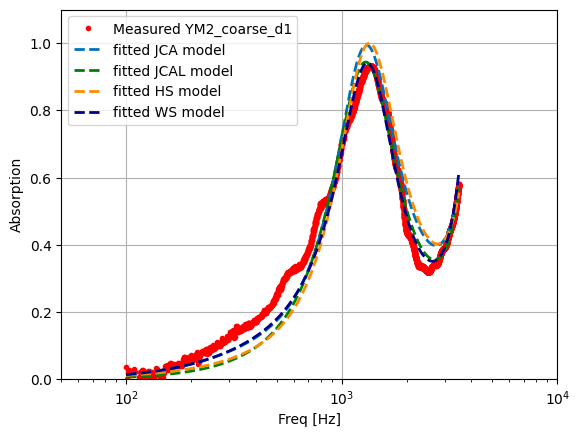

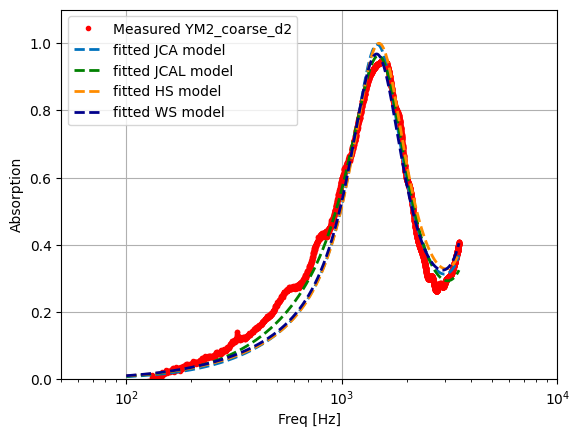

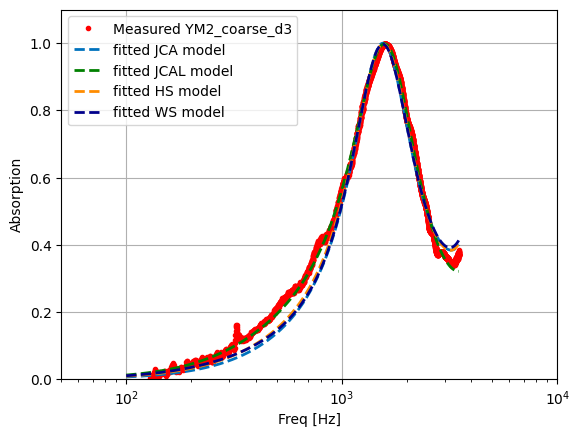

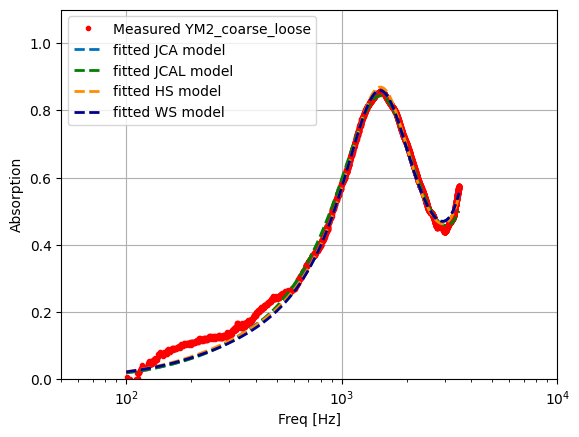

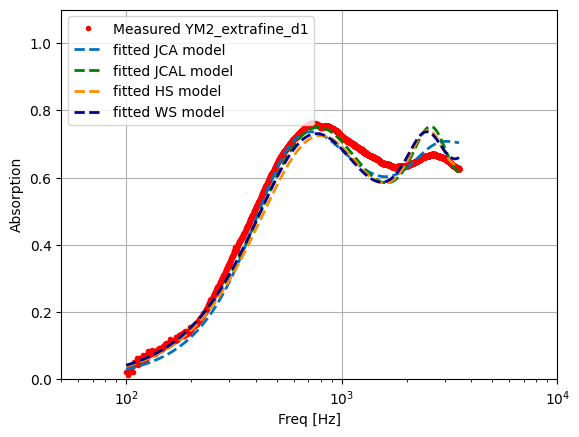

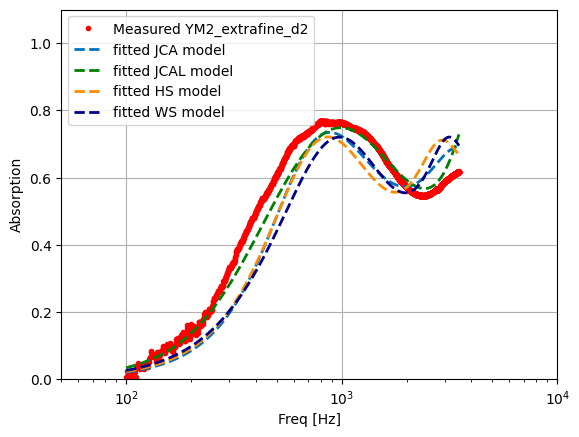

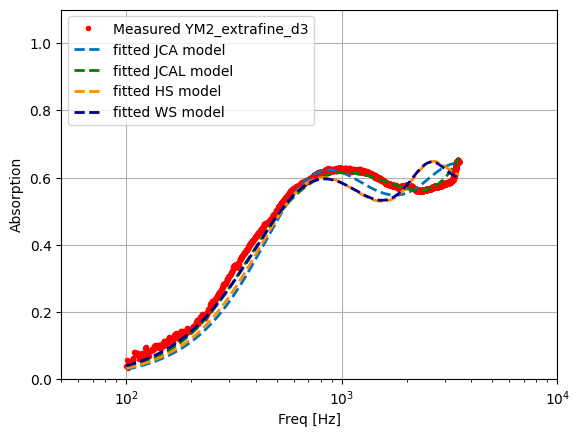

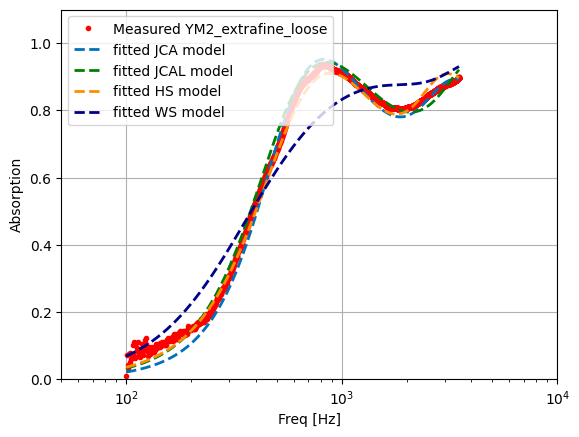

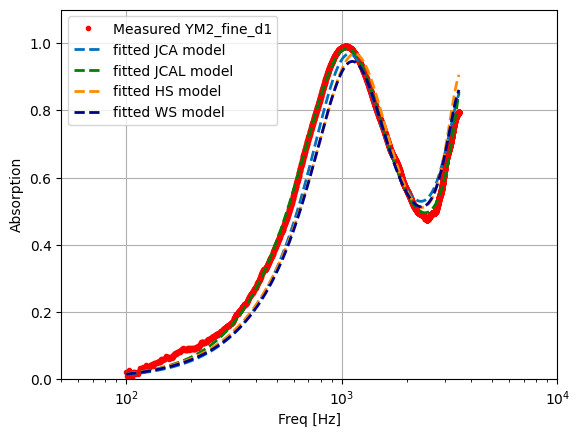

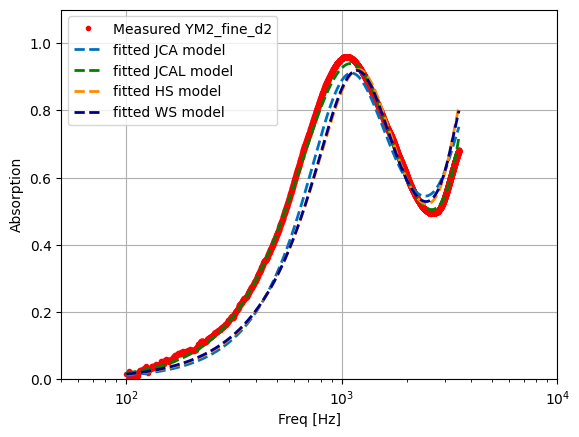

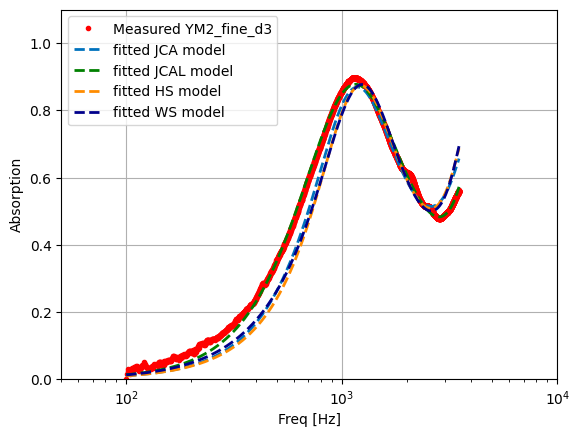

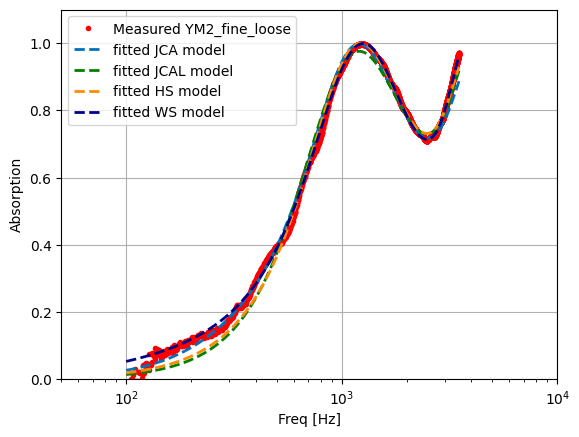

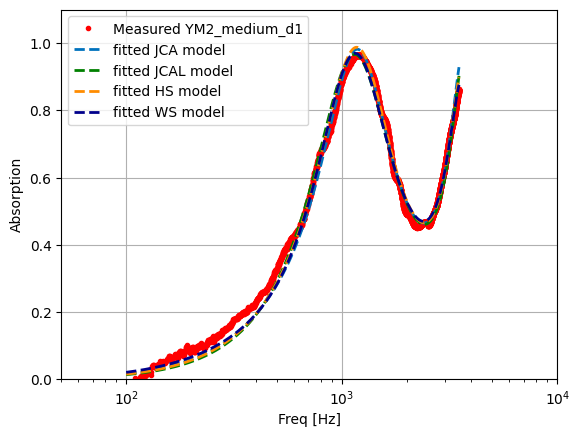

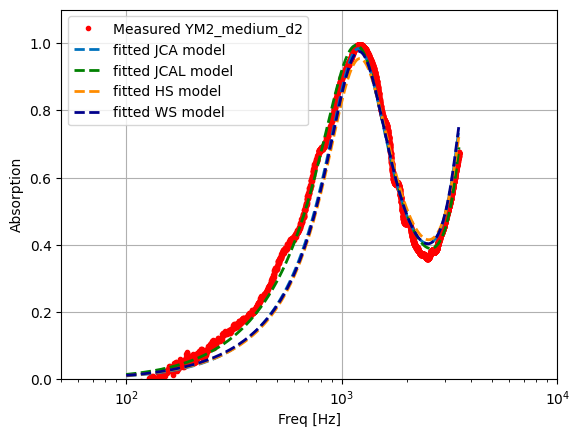

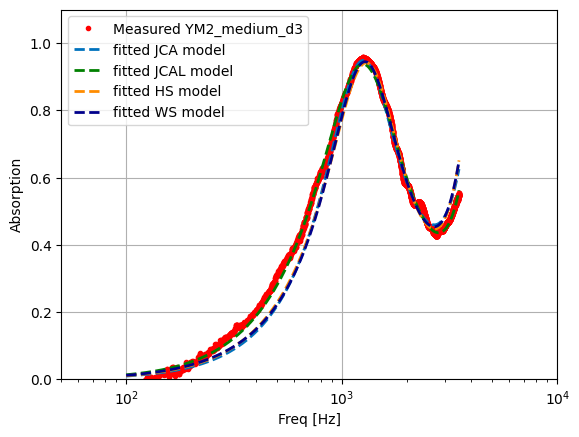

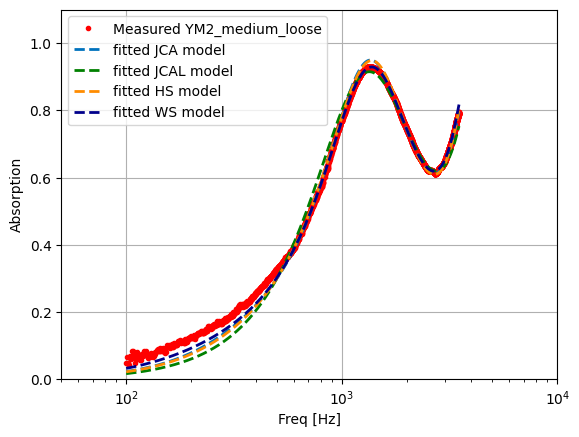

In [23]:
from scipy.optimize import curve_fit
from invmethods import *

parameters_allsamples = []

for sample_idx in samples_abs_df.index:

    sample_selected = samples_abs_df.loc[sample_idx]   #Sample selection according to the indexes of the dataframe

    omega = 2*np.pi*np.array(freq)
    d = float(sample_selected['thickness'])*1e-3  # Sample thickness [m]

    #Measured data
    xdata = np.array(freq)
    ydata = sample_selected['abs_avg']  

    abs_meas = np.array(ydata).astype(float)

    # Characteristic impedance
    real_z_meas = sample_selected['real_z']
    imag_z_meas = sample_selected['imag_z']
    real_z_meas = np.array(real_z_meas).astype(float)
    imag_z_meas = np.array(imag_z_meas).astype(float)

    # Wavenumber
    real_k_meas = sample_selected['real_k']
    imag_k_meas = sample_selected['imag_k'] 
    real_k_meas = np.array(real_k_meas).astype(float)
    imag_k_meas = np.array(imag_k_meas).astype(float)

    # Dynamic mass density
    real_d_meas = sample_selected['real_rho']
    imag_d_meas = sample_selected['imag_rho']
    real_d_meas = np.array(real_d_meas).astype(float)
    imag_d_meas = np.array(imag_d_meas).astype(float)

    # Bulk modulus
    real_b_meas = sample_selected['real_K']
    imag_b_meas = sample_selected['imag_K']
    real_b_meas = np.array(real_b_meas).astype(float)
    imag_b_meas = np.array(imag_b_meas).astype(float)

    # Velocity of sounnd
    real_c_meas = sample_selected['real_c']
    imag_c_meas = sample_selected['imag_c']
    real_c_meas = np.array(real_c_meas).astype(float)
    imag_c_meas = np.array(imag_c_meas).astype(float)

    # Initial parameters from estimated values
    start_phi = sample_selected['porosity_estimated']
    start_alphainf = sample_selected['tortuosity_estimated']
    start_sigma = sample_selected['sigma_estimated']

    # Wilson parameters (from Wilson)
    rho_inf = (rho0 * start_alphainf) / start_phi #from Luc page
    k_inf =  (p0 * gamma) / start_phi

    # Wilson parameters (from Panneton)


    # Model selection
    # model = ['JCA', 'HS', 'JCAL', 'WS']    # Choose from ['JCA', 'JCAL', 'HS', 'WS']
    model = {
        'JCA': 'JCA',
        'JCAL': 'JCAL',
        'HS': 'HS',
        'WS': 'WS'
    }

    #  Starting points for all the models (JCA, HS, JCAL)
    #  startpt = [phi, alpha_inf, sigma, lambda, lambda_prima, therm_perm_k0 (JCAL), dev_por(HS)]

    startpt = {'phi': sample_selected['porosity_estimated'], 
            'alpha_inf': sample_selected['tortuosity_estimated'], 
            'sigma': sample_selected['sigma_estimated'], 
            'lamb': 583e-6, 
            'lamb_prima': 867e-6, 
            'k0_prima': 1e-9,  
            's_por': 1.5e-3, 
            'dev_por': 0.72,
            'k_inf': k_inf,
            'rho_inf': rho_inf,
            'tau_vor': 0.5e-3,
            'tau_ent': 0.5e-3 
            
            }  

    # Constraints for all the models (JCA, HS, JCAL)
    # = [0.1, 1, 500, 0.22e-6, 0.22e-6, 1e-10, 0.20]  # Lower bound of parameters
    lb = {'phi': sample_selected['porosity_estimated']*0.9,
        'alpha_inf': sample_selected['tortuosity_estimated']*0.8,
        'sigma': sample_selected['sigma_estimated']*0.8,
        'lamb': 0.22e-6,
        'lamb_prima': 0.22e-6,
        'k0_prima': 1e-10,
        's_por': 0.5e-6, 
        'dev_por': 0.14,
        'k_inf': k_inf * 0.5,
        'rho_inf': rho_inf * 0.5,
        'tau_vor': 0.05e-3,
        'tau_ent': 0.05e-3 
        }

    #ub = [0.9, 10, 100000, 1000e-6, 1000e-6, 1e-8,  0.24]  # Upper bound of parameters
    ub = {'phi': sample_selected['porosity_estimated']*1.1, 
        'alpha_inf': sample_selected['tortuosity_estimated']*1.2, 
        'sigma': sample_selected['sigma_estimated']*1.2, 
        'lamb': 1000e-6, 
        'lamb_prima': 1000e-6, 
        'k0_prima': 1e-8, 
        's_por': 0.5e-1, 
        'dev_por': 0.94,
        'k_inf': k_inf * 1.5,
        'rho_inf': rho_inf * 1.5,
        'tau_vor': 2.5e-3,
        'tau_ent': 2.5e-3 
        }

    if 'extrafine' in sample_selected.name:
        alpha_inf = np.random.uniform(low=1, high=5)
        startpt['alpha_inf']= alpha_inf
        lb['alpha_inf']= 1
        ub['alpha_inf']= 5

    #Inverse estimation of the macroscopical parameters

    # fitted_data_jca, d_jca, b_jca, best_coef_jca, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['JCA'], d)
    # fitted_data_jcal, d_jcal, b_jcal, best_coef_jcal, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['JCAL'], d)
    # fitted_data_hs, d_hs, b_hs, best_coef_hs, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['HS'], d)
    # fitted_data_ws, d_ws, b_ws, best_coef_ws, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['WS'], d)

    fitted_data_jca, d_jca, b_jca, best_coef_jca = DiffEvol_inv(xdata, ydata, lb, ub, model='JCA', d=d)
    fitted_data_jcal, d_jcal, b_jcal, best_coef_jcal = DiffEvol_inv(xdata, ydata, lb, ub, model='JCAL', d=d)
    fitted_data_hs, d_hs, b_hs, best_coef_hs = DiffEvol_inv(xdata, ydata, lb, ub, model='HS', d=d)
    fitted_data_ws, d_ws, b_ws, best_coef_ws = DiffEvol_inv(xdata, ydata, lb, ub, model='WS', d=d)


    #Mean Squared Error (MSE)

    MSE_ls_jca = np.mean((ydata - fitted_data_jca)**2)
    MSE_ls_jcal = np.mean((ydata - fitted_data_jcal)**2)
    MSE_ls_hs = np.mean((ydata - fitted_data_hs)**2)
    MSE_ls_ws = np.mean((ydata - fitted_data_ws)**2)

    #Plotting
    plt.figure()
    plt.semilogx(xdata, ydata, 'ro', markersize=3, label=f'Measured {sample_selected.name}')
    plt.semilogx(xdata, fitted_data_jca, '--', color=[0, 0.4470, 0.7410], linewidth=2, label=f'fitted JCA model')
    plt.semilogx(xdata, fitted_data_jcal, '--', color='green', linewidth=2, label=f'fitted JCAL model')
    plt.semilogx(xdata, fitted_data_hs, '--', color='darkorange', linewidth=2, label=f'fitted HS model')
    plt.semilogx(xdata, fitted_data_ws, '--', color='darkblue', linewidth=2, label=f'fitted WS model')
    plt.grid(True)
    plt.ylabel('Absorption')
    plt.xlabel('Freq [Hz]')
    plt.xlim([50, 10000])
    plt.ylim([0, 1.1])
    plt.legend(loc='upper left')

    sample_name = sample_selected.name
    sample_name = sample_name.replace('_', '-')

    parameters_jca = {
        'sample_name': sample_name,
        'model': 'JCA',
        'phi': round(best_coef_jca[0], 2),
        'alpha_inf': round(best_coef_jca[1], 2), 
        'sigma':round(best_coef_jca[2]), 
        'lamb': round(best_coef_jca[3]*1e6, 1), 
        'lamb_prima': round(best_coef_jca[4]*1e6, 1), 
        'MSE':MSE_ls_jca.round(5)
    }
    parameters_jcal = {
        'sample_name': sample_name,
        'model': 'JCAL',
        'phi': best_coef_jcal[0].round(2),
        'alpha_inf': best_coef_jcal[1].round(2), 
        'sigma': round(best_coef_jcal[2]), 
        'lamb': round(best_coef_jcal[3]*1e6, 1), 
        'lamb_prima': round(best_coef_jcal[4]*1e6, 1), 
        'k0_prima': round(best_coef_jcal[5]*1e9, 2),  

        'MSE':MSE_ls_jcal.round(5)
    }
    parameters_hs = {
        'sample_name': sample_name,
        'model': 'Horosh. et al.',
        'phi': best_coef_hs[0].round(2), 
        'alpha_inf': best_coef_hs[1].round(2), 
        's_por': round(best_coef_hs[2]*1e4, 2), 
        'dev_por': best_coef_hs[3].round(2),
        
        'MSE':MSE_ls_hs.round(5)
    }
    parameters_ws = {
        'sample_name': sample_name,
        'model': 'Wilson et al.',
        'k_inf': best_coef_ws[1].round(),
        'rho_inf': best_coef_ws[0].round(1),
        'tau_vor': round(best_coef_ws[2]*1e3, 2),
        'tau_ent': round(best_coef_ws[3]*1e3, 2), 

        'MSE':MSE_ls_ws.round(5)
    }

    parameters_allsamples.append(parameters_jca)
    parameters_allsamples.append(parameters_jcal)
    parameters_allsamples.append(parameters_hs)
    parameters_allsamples.append(parameters_ws)

    # Print macroscopical parameters of the sample
    print('Macroscopical parameters of the sample JCA')
    print('{:<10} {:<10} {:<10} {:<10} {:<10}'.format('ϕ', 'α_∞', 'σ', 'Λ (μm)', "Λ' (μm)"))
    print('{:<10.2f} {:<10.2f} {:<10.0f} {:<10.2f} {:<10.2f}'.format(
        best_coef_jca[0],
        best_coef_jca[1],
        best_coef_jca[2],
        best_coef_jca[3]*1e6,
        best_coef_jca[4]*1e6
    ))
    print(f'Mean Squared Error (MSE): {MSE_ls_jca.round(5)} ', end='')
    print('\n')

    print('Macroscopical parameters of the sample JCAL')
    print('{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} '.format('ϕ', 'α_∞', 'σ', 'Λ (μm)', "Λ'(μm)",  'k0 (1e-9)'))
    print('{:<10.2f} {:<10.2f} {:<10.0f} {:<10.2f} {:<10.2f} {:<10.2f}'.format(
        best_coef_jcal[0],
        best_coef_jcal[1],
        best_coef_jcal[2],
        best_coef_jcal[3]*1e6,
        best_coef_jcal[4]*1e6,
        best_coef_jcal[5]*1e9
    ))
    print(f'Mean Squared Error (MSE): {MSE_ls_jcal.round(5)} ', end='')
    print('\n')

    print('Macroscopical parameters of the sample HS')
    print('{:<10} {:<10} {:<10} {:<10}'.format('ϕ', 'alpha_inf', 's_por (mm)',  'dev_por'))
    print('{:<10.2f} {:<10.3f} {:<10.4f} {:<10.4f}'.format(
        best_coef_hs[0],
        best_coef_hs[1],
        best_coef_hs[2] * 1e4,
        best_coef_hs[3],         
        ))
    print(f'Mean Squared Error (MSE): {MSE_ls_hs.round(5)} ', end='')
    print('\n')

    print('Macroscopical parameters of the sample WS')
    print('{:<10} {:<10} {:<10} {:<10}'.format('rho_inf', 'K_inf', 'tau_vor (ms)', 'tau_ent (ms)'))
    print('{:<10.2f} {:<10.2f} {:<10.4f} {:<10.4f}'.format(
        best_coef_ws[0],
        best_coef_ws[1],
        best_coef_ws[2] * 1e3,
        best_coef_ws[3] * 1e3
    ))
    print(f'Mean Squared Error (MSE): {MSE_ls_ws.round(5)} ', end='')


    k_jca = omega * np.sqrt(d_jca / b_jca)
    k_hs = omega * np.sqrt(d_hs / b_hs)
    k_ws = omega * np.sqrt(d_ws / b_ws)
    k_jcal = omega * np.sqrt(d_jcal / b_jcal)

    c_JCA = (omega) / k_jca
    c_HS = (omega) / k_hs
    c_ws = (omega) / k_ws
    c_jcal = (omega) / k_jcal

    custom_color = [
        '#FF5733',  # Vibrant Orange
        '#33FF57',  # Bright Green
        '#3357FF',  # Bright Blue
        '#F333FF',  # Pinkish Purple
        '#33FFF5',  # Cyan
        '#F5FF33',  # Yellow
        '#FF33A6',  # Magenta
        '#A633FF',  # Purple
        '#33FFA8',  # Aquamarine
        '#FF8C33'   # Dark Orange
    ]

    custom_color2 = [
        '#1f77b4',  # Blue
        '#ff7f0e',  # Orange
        '#2ca02c',  # Green
        '#d62728',  # Red
        '#9467bd',  # Purple
        '#8c564b',  # Brown
        '#e377c2',  # Pink
    ]




In [26]:
parameters_allsamples_df = pd.DataFrame(parameters_allsamples)
parameters_allsamples_df.to_csv('inversion_parameters_all_samples_diffevol.csv', index=False)
parameters_allsamples_df.head()

sample_name           model   phi  alpha_inf   sigma   lamb  lamb_prima  \
0  YM2-coarse-d1             JCA  0.39       1.44  2867.0  132.1       282.7   
1  YM2-coarse-d1            JCAL  0.44       1.44  2867.0    2.5        35.7   
2  YM2-coarse-d1  Horosh. et al.  0.39       1.44     NaN    NaN         NaN   
3  YM2-coarse-d1   Wilson et al.   NaN        NaN     NaN    NaN         NaN   
4  YM2-coarse-d2             JCA  0.38       1.69  4568.0  239.4       214.3   

       MSE  k0_prima  s_por  dev_por     k_inf  rho_inf  tau_vor  tau_ent  
0  0.00408       NaN    NaN      NaN       NaN      NaN      NaN      NaN  
1  0.00217      0.76    NaN      NaN       NaN      NaN      NaN      NaN  
2  0.00636       NaN  12.73     0.94       NaN      NaN      NaN      NaN  
3  0.00148       NaN    NaN      NaN  283612.0      4.3     2.48     0.65  
4  0.00241       NaN    NaN      NaN       NaN      NaN      NaN      NaN

In [90]:
from invmethods import *

sample_selected = samples_abs_df.loc['YM2-medium-loose']   #Sample selection according to the indexes of the dataframe

# 'YM2_medium_loose' --> good to see wilson's model fits better in medium frequencies. Low freq all equal. other params equal.  
# 'YM2_medium_d1' --> JCA fits better Zc
# YM2_fine_loose' --> also good, more even in general. Wilson shows better fitting in medium frequencies.
# 'YM2_coarse_d1' --> wilson fits better medium freq (with 2mic even better but differences in k and Zc)
# 'YM2_coarse_d3' --> Good deal among all! ()

omega = 2*np.pi*np.array(freq)
d = float(sample_selected['thickness'])*1e-3  # Sample thickness [m]

#Measured data
xdata = np.array(freq)
ydata = sample_selected['abs_avg']  

abs_meas = np.array(ydata).astype(float)

# Characteristic impedance
real_z_meas = sample_selected['real_z']
imag_z_meas = sample_selected['imag_z']
real_z_meas = np.array(real_z_meas).astype(float)
imag_z_meas = np.array(imag_z_meas).astype(float)

# Wavenumber
real_k_meas = sample_selected['real_k']
imag_k_meas = sample_selected['imag_k'] 
real_k_meas = np.array(real_k_meas).astype(float)
imag_k_meas = np.array(imag_k_meas).astype(float)

# Dynamic mass density
real_d_meas = sample_selected['real_rho']
imag_d_meas = sample_selected['imag_rho']
real_d_meas = np.array(real_d_meas).astype(float)
imag_d_meas = np.array(imag_d_meas).astype(float)

# Bulk modulus
real_b_meas = sample_selected['real_K']
imag_b_meas = sample_selected['imag_K']
real_b_meas = np.array(real_b_meas).astype(float)
imag_b_meas = np.array(imag_b_meas).astype(float)

# Velocity of sounnd
real_c_meas = sample_selected['real_c']
imag_c_meas = sample_selected['imag_c']
real_c_meas = np.array(real_c_meas).astype(float)
imag_c_meas = np.array(imag_c_meas).astype(float)

# Initial parameters from estimated values
start_phi = sample_selected['porosity_estimated']
start_alphainf = sample_selected['tortuosity_estimated']
start_sigma = sample_selected['sigma_estimated']

# Wilson parameters (from Wilson)
p0 = 101325  # Standard air pressure [Pa]
rho_inf = (rho0 * start_alphainf) / start_phi #from Luc page
k_inf =  (p0 * gamma) / start_phi

#  Starting points for all the models (JCA, HS, JCAL)
#  startpt = [phi, alpha_inf, sigma, lambda, lambda_prima, therm_perm_k0 (JCAL), dev_por(HS)]

startpt = {'phi': sample_selected['porosity_estimated'], 
        'alpha_inf': sample_selected['tortuosity_estimated'], 
        'sigma': sample_selected['sigma_estimated'], 
        'lamb': 583e-6, 
        'lamb_prima': 867e-6, 
        'k0_prima': 1e-9,  
        's_por': 1.5e-3, 
        'dev_por': 0.72,
        'k_inf': k_inf,
        'rho_inf': rho_inf,
        'tau_vor': 0.5e-3,
        'tau_ent': 0.5e-3 
        
        }  

# Constraints for all the models (JCA, HS, JCAL)
# = [0.1, 1, 500, 0.22e-6, 0.22e-6, 1e-10, 0.20]  # Lower bound of parameters
lb = {'phi': sample_selected['porosity_estimated']*0.9,
    'alpha_inf': sample_selected['tortuosity_estimated']*0.8,
    'sigma': sample_selected['sigma_estimated']*0.8,
    'lamb': 0.22e-6,
    'lamb_prima': 0.22e-6,
    'k0_prima': 1e-10,
    's_por': 0.5e-6, 
    'dev_por': 0.14,
    'k_inf': k_inf * 0.5,
    'rho_inf': rho_inf * 0.5,
    'tau_vor': 0.05e-3,
    'tau_ent': 0.05e-3 
    }

#ub = [0.9, 10, 100000, 1000e-6, 1000e-6, 1e-8,  0.24]  # Upper bound of parameters
ub = {'phi': sample_selected['porosity_estimated']*1.1, 
    'alpha_inf': sample_selected['tortuosity_estimated']*1.2, 
    'sigma': sample_selected['sigma_estimated']*1.2, 
    'lamb': 1000e-6, 
    'lamb_prima': 1000e-6, 
    'k0_prima': 1e-8, 
    's_por': 0.5e-1, 
    'dev_por': 0.94,
    'k_inf': k_inf * 1.5,
    'rho_inf': rho_inf * 1.5,
    'tau_vor': 2.5e-3,
    'tau_ent': 2.5e-3 
    }

if 'extrafine' in sample_selected.name:
    alpha_inf = np.random.uniform(low=1, high=5)
    startpt['alpha_inf']= alpha_inf
    lb['alpha_inf']= 1
    ub['alpha_inf']= 5

#Inverse estimation of the macroscopical parameters

# fitted_data_jca, d_jca, b_jca, best_coef_jca, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['JCA'], d)
# fitted_data_jcal, d_jcal, b_jcal, best_coef_jcal, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['JCAL'], d)
# fitted_data_hs, d_hs, b_hs, best_coef_hs, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['HS'], d)
# fitted_data_ws, d_ws, b_ws, best_coef_ws, cov = NonlinLS_inv(xdata, ydata, startpt, lb, ub, model['WS'], d)

fitted_data_jca, d_jca, b_jca, best_coef_jca = DiffEvol_inv(xdata, ydata, lb, ub, model='JCA', d=d)
fitted_data_jcal, d_jcal, b_jcal, best_coef_jcal = DiffEvol_inv(xdata, ydata, lb, ub, model='JCAL', d=d)
fitted_data_hs, d_hs, b_hs, best_coef_hs = DiffEvol_inv(xdata, ydata, lb, ub, model='HS', d=d)
fitted_data_ws, d_ws, b_ws, best_coef_ws = DiffEvol_inv(xdata, ydata, lb, ub, model='WS', d=d)

#Mean Squared Error (MSE)

MSE_ls_jca = np.mean((ydata - fitted_data_jca)**2)
MSE_ls_jcal = np.mean((ydata - fitted_data_jcal)**2)
MSE_ls_hs = np.mean((ydata - fitted_data_hs)**2)
MSE_ls_ws = np.mean((ydata - fitted_data_ws)**2)

k_jca = omega * np.sqrt(d_jca / b_jca)
k_hs = omega * np.sqrt(d_hs / b_hs)
k_ws = omega * np.sqrt(d_ws / b_ws)
k_jcal = omega * np.sqrt(d_jcal / b_jcal)

c_JCA = (omega) / k_jca
c_HS = (omega) / k_hs
c_ws = (omega) / k_ws
c_jcal = (omega) / k_jcal




c:\Users\J.Garcia\anaconda3\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\J.Garcia\UNIBS-1\Paper1-YMporousmat\newSamples_journal\YM2_mediciones\invmethods.py:217: RuntimeWarning: overflow encountered in tan
  z_HS = -1j * Zc_HS * (1/np.tan(k_HS * d))
c:\Users\J.Garcia\UNIBS-1\Paper1-YMporousmat\newSamples_journal\YM2_mediciones\invmethods.py:295: RuntimeWarning: overflow encountered in tan
  z_HS = -1j * Zc_HS * (1/np.tan(k_HS * d))


In [997]:
p0 

(2.73, 0.01, 0)

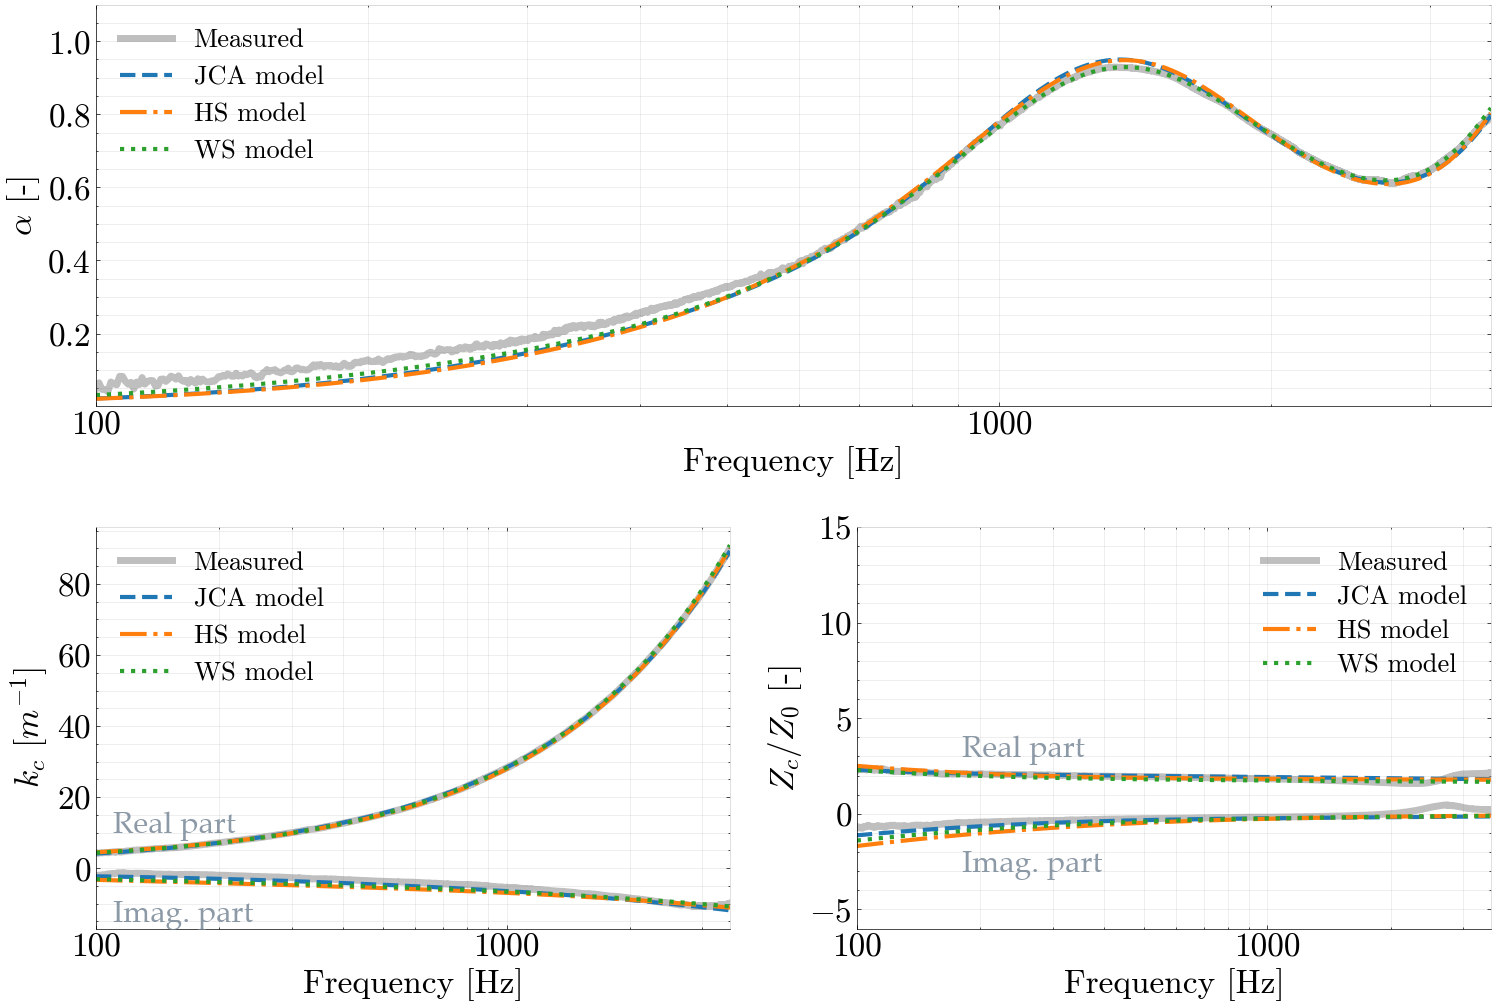

In [94]:
import matplotlib.gridspec as gridspec


custom_color2 = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd'   # purple
]
linewidth = 3
fontsize=24

# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]

fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, :])  # Span all columns in the first row
ax0.semilogx(freq, ydata, color='grey', label='Measured', linestyle=linestyles[0], linewidth=linewidth+2, alpha=0.5)
ax0.semilogx(freq, fitted_data_jca, color=custom_color2[0], label='JCA model', linestyle=linestyles[1], linewidth=linewidth, alpha=1)
# ax0.semilogx(freq, fitted_data_jcal, color=custom_color2[4], label='JCAL model', linestyle=linestyles[4], linewidth=linewidth, alpha=1)
ax0.semilogx(freq, fitted_data_hs, color=custom_color2[1], label='HS model', linestyle=linestyles[2], linewidth=linewidth, alpha=1)
ax0.semilogx(freq, fitted_data_ws, color=custom_color2[2], label='WS model', linestyle=linestyles[3], linewidth=linewidth, alpha=1)


ax0.set_xlabel('Frequency [Hz]', fontsize=fontsize)    
ax0.set_ylabel(r'$\alpha$ [-]', fontsize=fontsize)
ax0.set_ylim(0.001, 1.1)
ax0.set_xlim(100, 3500)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')
ax0.legend(loc='upper left', fontsize=fontsize-5, frameon=False)
ax0.set_xticks([100, 1000])
ax0.set_xticklabels([100, 1000])


# Second row, first column
ax1 = fig.add_subplot(gs[1, 0])
ax1.semilogx(freq, real_k_meas, color='grey', label='Measured', linestyle=linestyles[0], linewidth=linewidth+2, alpha=0.5)
ax1.semilogx(freq, imag_k_meas, color='grey', linestyle=linestyles[0], linewidth=linewidth+2, alpha=0.5)
ax1.semilogx(freq, np.real(k_jca), color=custom_color2[0], label='JCA model', linestyle=linestyles[1], linewidth=linewidth, alpha=1)
ax1.semilogx(freq, np.imag(k_jca), color=custom_color2[0], linestyle=linestyles[1], linewidth=linewidth, alpha=1)
# ax1.semilogx(freq, np.real(k_jcal), color=custom_color2[4], label='JCAL model', linestyle=linestyles[4], linewidth=linewidth, alpha=1)
# ax1.semilogx(freq, np.imag(k_jcal), color=custom_color2[4], linestyle=linestyles[4], linewidth=linewidth, alpha=1) 
ax1.semilogx(freq, np.real(k_hs), color=custom_color2[1], label='HS model', linestyle=linestyles[2], linewidth=linewidth, alpha=1)
ax1.semilogx(freq, np.imag(k_hs), color=custom_color2[1], linestyle=linestyles[2], linewidth=linewidth, alpha=1)
ax1.semilogx(freq, np.real(k_ws), color=custom_color2[2], label='WS model', linestyle=linestyles[3], linewidth=linewidth, alpha=1)
ax1.semilogx(freq, np.imag(k_ws), color=custom_color2[2], linestyle=linestyles[3], linewidth=linewidth, alpha=1)
 

ax1.set_xlabel('Frequency [Hz]', fontsize=fontsize)    
ax1.set_ylabel(r'$k_c$ [$m^{-1}$]', fontsize=fontsize)
ax1.grid(which='both', alpha=0.3)
ax1.set_xlim(100, 3500)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')
ax1.legend(loc='best', fontsize=fontsize-5, frameon=False)
ax1.set_xticks([100, 1000])
ax1.set_xticklabels([100, 1000])
ax1.text(
    110, 10, 'Real part',
    fontsize=fontsize-2,
    fontweight='light',
    fontname='Palatino Linotype',
    color='#708090',
    style='normal',
    alpha=0.8
    )
ax1.text(
    110, -15, 'Imag. part',
    fontsize=fontsize-2,
    fontweight='light',
    fontname='Palatino Linotype',
    color='#708090',
    style='normal',
    alpha=0.8
    )


# Second row, second column
ax2 = fig.add_subplot(gs[1, 1])
ax2.semilogx(freq, real_z_meas/z0, color='grey', label='Measured', linestyle=linestyles[0], linewidth=linewidth+2, alpha=0.5)
ax2.semilogx(freq, imag_z_meas/z0, color='grey', linestyle=linestyles[0], linewidth=linewidth+2, alpha=0.5)
ax2.semilogx(freq, np.real(np.sqrt(d_jca*b_jca))/z0, color=custom_color2[0], label='JCA model', linestyle=linestyles[1], linewidth=linewidth, alpha=1)
ax2.semilogx(freq, np.imag(np.sqrt(d_jca*b_jca))/z0, color=custom_color2[0], linestyle=linestyles[1], linewidth=linewidth, alpha=1)
# ax2.semilogx(freq, np.real(np.sqrt(d_jcal*b_jcal))/z0, color=custom_color2[4], label='JCAL model', linestyle=linestyles[4], linewidth=linewidth, alpha=1)
# ax2.semilogx(freq, np.imag(np.sqrt(d_jcal*b_jcal))/z0, color=custom_color2[4], linestyle=linestyles[4], linewidth=linewidth, alpha=1)
ax2.semilogx(freq, np.real(np.sqrt(d_hs*b_hs))/z0, color=custom_color2[1], label='HS model', linestyle=linestyles[2], linewidth=linewidth, alpha=1)
ax2.semilogx(freq, np.imag(np.sqrt(d_hs*b_hs))/z0, color=custom_color2[1], linestyle=linestyles[2], linewidth=linewidth, alpha=1)
ax2.semilogx(freq, np.real(np.sqrt(d_ws*b_ws))/z0, color=custom_color2[2], label='WS model', linestyle=linestyles[3], linewidth=linewidth, alpha=1)
ax2.semilogx(freq, np.imag(np.sqrt(d_ws*b_ws))/z0, color=custom_color2[2], linestyle=linestyles[3], linewidth=linewidth, alpha=1)



ax2.set_xlabel('Frequency [Hz]', fontsize=fontsize)
ax2.set_ylabel(r'$Z_c/Z_0$ [-]', fontsize=fontsize)
ax2.set_ylim(-6, 15)
ax2.set_xlim(100, 3500)
ax2.grid(which='both', alpha=0.3)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['top'].set_color('lightgrey')
ax2.legend(loc='best', fontsize=fontsize-5, labelspacing=0.4, frameon=False)
ax2.set_xticks([100, 1000])
ax2.set_xticklabels([100, 1000])
# ax2.text(10.4, 0.9, 'Real Part', fontsize=10)
ax2.text(
    180, 3, 'Real part',
    fontsize=fontsize-2,
    fontweight='light',
    fontname='Palatino Linotype',
    color='#708090',
    style='normal',
    alpha=0.8
    )
ax2.text(
    180, -3, 'Imag. part',
    fontsize=fontsize-2,
    fontweight='light',
    fontname='Palatino Linotype',
    color='#708090',
    style='normal',
    alpha=0.8
    )

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.3)

plt.show()


In [ ]:
parameters_allsamples[1]

{'sample_name': 'YM2-coarse-d1',
 'model': 'JCAL',
 'phi': 0.44,
 'alpha_inf': 1.44,
 'sigma': 2867,
 'lamb': 2.5,
 'lamb_prima': 35.7,
 'k0_prima': 0.76,
 'MSE': 0.00217}

In [ ]:
import csv

def to_latex_row(data, columns):
    row_items = []
    for col in columns:
        value = data.get(col, "-")  # Use '-' if key not found
        if col == 'MSE':
            value = round(np.sqrt(value)*100, 2)
        row_items.append(str(value))
    return " & ".join(row_items) + r" \\"

columns = ['sample_name',
           'model',
           'phi', 
           'alpha_inf', 
           'sigma', 
           'lamb', 
           'lamb_prima', 
           'k0_prima',  
           's_por', 
           'dev_por',
           'k_inf',
           'rho_inf',
           'tau_vor',
           'tau_ent']

columns2 = [
           'sample_name',
           'model',
           'MSE'

]

for sample in parameters_allsamples:
    row = to_latex_row(sample, columns2)
    print(row)


# # Save all parameters from the inversion for all models and samples
# filename = 'model_allparameters.csv'
# headers = columns

# with open(filename, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=headers)
#     writer.writeheader()
#     writer.writerows(inv_parameters)

# print(f"Data has been saved to {filename}")



YM2-coarse-d1 & JCA & 6.39 \\
YM2-coarse-d1 & JCAL & 4.66 \\
YM2-coarse-d1 & Horosh. et al. & 7.97 \\
YM2-coarse-d1 & Wilson et al. & 3.85 \\
YM2-coarse-d2 & JCA & 4.91 \\
YM2-coarse-d2 & JCAL & 3.38 \\
YM2-coarse-d2 & Horosh. et al. & 5.7 \\
YM2-coarse-d2 & Wilson et al. & 4.81 \\
YM2-coarse-d3 & JCA & 3.91 \\
YM2-coarse-d3 & JCAL & 1.7 \\
YM2-coarse-d3 & Horosh. et al. & 3.3 \\
YM2-coarse-d3 & Wilson et al. & 3.86 \\
YM2-coarse-loose & JCA & 1.7 \\
YM2-coarse-loose & JCAL & 1.97 \\
YM2-coarse-loose & Horosh. et al. & 1.61 \\
YM2-coarse-loose & Wilson et al. & 1.87 \\
YM2-extrafine-d1 & JCA & 3.99 \\
YM2-extrafine-d1 & JCAL & 4.38 \\
YM2-extrafine-d1 & Horosh. et al. & 4.59 \\
YM2-extrafine-d1 & Wilson et al. & 4.43 \\
YM2-extrafine-d2 & JCA & 7.12 \\
YM2-extrafine-d2 & JCAL & 3.97 \\
YM2-extrafine-d2 & Horosh. et al. & 9.32 \\
YM2-extrafine-d2 & Wilson et al. & 9.0 \\
YM2-extrafine-d3 & JCA & 3.52 \\
YM2-extrafine-d3 & JCAL & 1.58 \\
YM2-extrafine-d3 & Horosh. et al. & 4.99 \\
YM2-ex

In [ ]:

sample_name= 'YM2_coarse_loose'
df_save = samples_abs_df.loc[[sample_name], ['freq', 'real_z_2mic', 'imag_z_2mic', 'abs_avg_2mic']]
thickness = str(round(samples_abs_df.loc[sample_name, 'thickness'])) 

freq = df_save['freq'][0]
real_zs = df_save['real_z_2mic'][0]
imag_zs = df_save['imag_z_2mic'][0]
abs_2mic = df_save['abs_avg_2mic'][0]

df_save2 = pd.DataFrame({
    'freq': freq,
    'abs_2mic': abs_2mic,
    'real_zs':  real_zs,
    'imag_zs': imag_zs,
}
)

df_save2.to_excel(f'{sample_name}_{thickness}mm.xlsx', columns=['freq', 'abs_2mic','real_zs', 'imag_zs'], index=False)
df_save2


freq  abs_2mic   real_zs    imag_zs
0      100.000  0.085680  3.039797 -11.206869
1      100.781  0.082538  2.846331 -11.097091
2      101.563  0.087651  2.966413 -10.938085
3      102.344  0.082178  2.672169 -10.797340
4      103.125  0.082107  2.637565 -10.736033
...        ...       ...       ...        ...
4348  3496.880  0.920437  1.354140  -0.585485
4349  3497.660  0.919712  1.356770  -0.588628
4350  3498.440  0.919613  1.356886  -0.589130
4351  3499.220  0.920611  1.353357  -0.584776
4352  3500.000  0.920849  1.351980  -0.583902

[4353 rows x 4 columns]

### Genetic algorithm approach

- More computational cost but avoid the possibility of stoping in a local minimum (Non-Gradient Approach)

In [ ]:
#Here to implement the algorithms that were tested in the notebook test_GA.ipynb




### Neural Network

- Difficulty of making a correct training of the network

Resolution: 5.96e-06 [m]


In [9]:

import pandas as pd
df_inversion = pd.read_csv('inversion_parameters_all_samples_diffevol.csv')

df_inversion[df_inversion['model'] == 'Wilson et al.']
df_inversion.head(20)


sample_name           model   phi  alpha_inf    sigma   lamb  \
0      YM2-coarse-d1             JCA  0.39       1.44   2867.0  132.1   
1      YM2-coarse-d1            JCAL  0.44       1.44   2867.0    2.5   
2      YM2-coarse-d1  Horosh. et al.  0.39       1.44      NaN    NaN   
3      YM2-coarse-d1   Wilson et al.   NaN        NaN      NaN    NaN   
4      YM2-coarse-d2             JCA  0.38       1.69   4568.0  239.4   
5      YM2-coarse-d2            JCAL  0.44       1.69   3046.0    3.0   
6      YM2-coarse-d2  Horosh. et al.  0.37       1.69      NaN    NaN   
7      YM2-coarse-d2   Wilson et al.   NaN        NaN      NaN    NaN   
8      YM2-coarse-d3             JCA  0.43       1.75   6620.0  173.4   
9      YM2-coarse-d3            JCAL  0.43       1.74   6620.0    1.5   
10     YM2-coarse-d3  Horosh. et al.  0.43       1.91      NaN    NaN   
11     YM2-coarse-d3   Wilson et al.   NaN        NaN      NaN    NaN   
12  YM2-coarse-loose             JCA  0.61       1.33   2326.0  258.1   
13  YM2-coarse-loose            JCAL  0.62       1.24   2326.0    2.5   
14  YM2-coarse-loose  Horosh. et al.  0.62       1.38      NaN    NaN   
15  YM2-coarse-loose   Wilson et al.   NaN        NaN      NaN    NaN   
16  YM2-extrafine-d1             JCA  0.59       1.00  35243.0   16.2   
17  YM2-extrafine-d1            JCAL  0.59       4.59  52865.0    2.8   
18  YM2-extrafine-d1  Horosh. et al.  0.59       3.94      NaN    NaN   
19  YM2-extrafine-d1   Wilson et al.   NaN        NaN      NaN    NaN   

    lamb_prima      MSE  k0_prima  s_por  dev_por     k_inf  rho_inf  tau_vor  \
0        282.7  0.00408       NaN    NaN      NaN       NaN      NaN      NaN   
1         35.7  0.00217      0.76    NaN      NaN       NaN      NaN      NaN   
2          NaN  0.00636       NaN  12.73     0.94       NaN      NaN      NaN   
3          NaN  0.00148       NaN    NaN      NaN  283612.0      4.3     2.48   
4        214.3  0.00241       NaN    NaN      NaN       NaN      NaN      NaN   
5        191.7  0.00114      2.16    NaN      NaN       NaN      NaN      NaN   
6          NaN  0.00325       NaN   2.55     0.23       NaN      NaN      NaN   
7          NaN  0.00231       NaN    NaN      NaN  311456.0      4.9     2.08   
8        192.7  0.00153       NaN    NaN      NaN       NaN      NaN      NaN   
9        551.3  0.00029      3.25    NaN      NaN       NaN      NaN      NaN   
10         NaN  0.00109       NaN   2.08     0.14       NaN      NaN      NaN   
11         NaN  0.00149       NaN    NaN      NaN  293853.0      4.8     1.02   
12       258.1  0.00029       NaN    NaN      NaN       NaN      NaN      NaN   
13       143.2  0.00039      4.78    NaN      NaN       NaN      NaN      NaN   
14         NaN  0.00026       NaN   2.85     0.14       NaN      NaN      NaN   
15         NaN  0.00035       NaN    NaN      NaN  221797.0      2.6     1.79   
16       160.6  0.00159       NaN    NaN      NaN       NaN      NaN      NaN   
17      1000.0  0.00192      1.40    NaN      NaN       NaN      NaN      NaN   
18         NaN  0.00211       NaN   1.35     0.14       NaN      NaN      NaN   
19         NaN  0.00196       NaN    NaN      NaN  222955.0      7.2     0.27   

    tau_ent  
0       NaN  
1       NaN  
2       NaN  
3      0.65  
4       NaN  
5       NaN  
6       NaN  
7      0.62  
8       NaN  
9       NaN  
10      NaN  
11     0.59  
12      NaN  
13      NaN  
14      NaN  
15     0.89  
16      NaN  
17      NaN  
18      NaN  
19     0.25

In [30]:
#!pip install seaborn

In [10]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for 16 samples and 4 models
samples = [f'Sample {i}' for i in range(1, 17)]
custom_names = ['YM-co-d1', 'YM-co-d2', 'YM-co-d3', 'YM-co-lo', 'YM-ex-d1', 
                'YM-ex-d2', 'YM-ex-d3', 'YM-ex-lo', 'YM-fi-d1', 
                'YM-fi-d2', 'YM-fi-d3', 'YM-fi-lo', 'YM-me-d1', 'YM-me-d2', 'YM-me-d3', 'YM-me-lo']
models = ['JCA', 'JCAL', 'HS', 'WS']


# Random RMSE data for illustration
#np.random.seed(42)  # For reproducibility
data = []
granul = []

for sample in parameters_allsamples:
    
    rmse_value = np.sqrt(sample['MSE'])*100  # Use the MSE value from the sample data
    sample_name = sample['sample_name']
    model = sample['model']
    data.append({'Sample': sample_name, 'Model': model, 'RMSE': rmse_value})

    sample_granul = sample['sample_name'].split('-')
    granul.append(sample_granul[1])

df = pd.DataFrame(data)
df['granulometry'] = granul

# Drop the JCAL model:
df=df.drop(df[df['Model']=='JCAL'].index, axis=0)

# Pivot the DataFrame
pivot_df = df.pivot(index='Sample', columns='Model', values='RMSE')

fontsize=16
# Plot heatmap with inverted colormap
plt.figure(figsize=(10, 8))
ax=sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='viridis_r', cbar_kws={'label': 'Normalized RMSE (%)'}, annot_kws={"size": fontsize-2})
# ax.set_yticks(np.arange(len(custom_names)) + 0.5)
ax.set_yticklabels(custom_names, rotation=0, fontsize=fontsize)
ax.set_xticklabels(['HS', 'JCA','WS'], rotation=0, ha='center', fontsize=fontsize)
ax.set_xlabel('', fontsize=fontsize)
ax.set_ylabel('', fontsize=fontsize)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(fontsize)
cbar.ax.tick_params(labelsize=fontsize-2)

# Add horizontal lines every 4 rows
num_rows = len(pivot_df)
for i in range(1, (num_rows // 4) + 1):
    y = i * 4
    ax.hlines(y, *ax.get_xlim(), colors='white', linewidth=2)

# Add vertical lines every 4 columns
num_cols = len(pivot_df.columns)
for i in range(1, (num_cols) + 1):
    x = i * 1
    ax.vlines(x, *ax.get_ylim(), colors='white', linewidth=2)

plt.tight_layout()
plt.show()





NameError: name 'parameters_allsamples' is not defined

C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\2325029675.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lamb_prima'][0] = 224
C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\2325029675.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['lamb'][1]= (filtered_df['lamb'][0]+filtered_df['lamb'][2])/2


R^2 (lamb) coarse=1.0


C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\2325029675.py:101: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_df[samples_abs_df['granul'] == granul_value]
c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NameError: name 'linestyles' is not defined

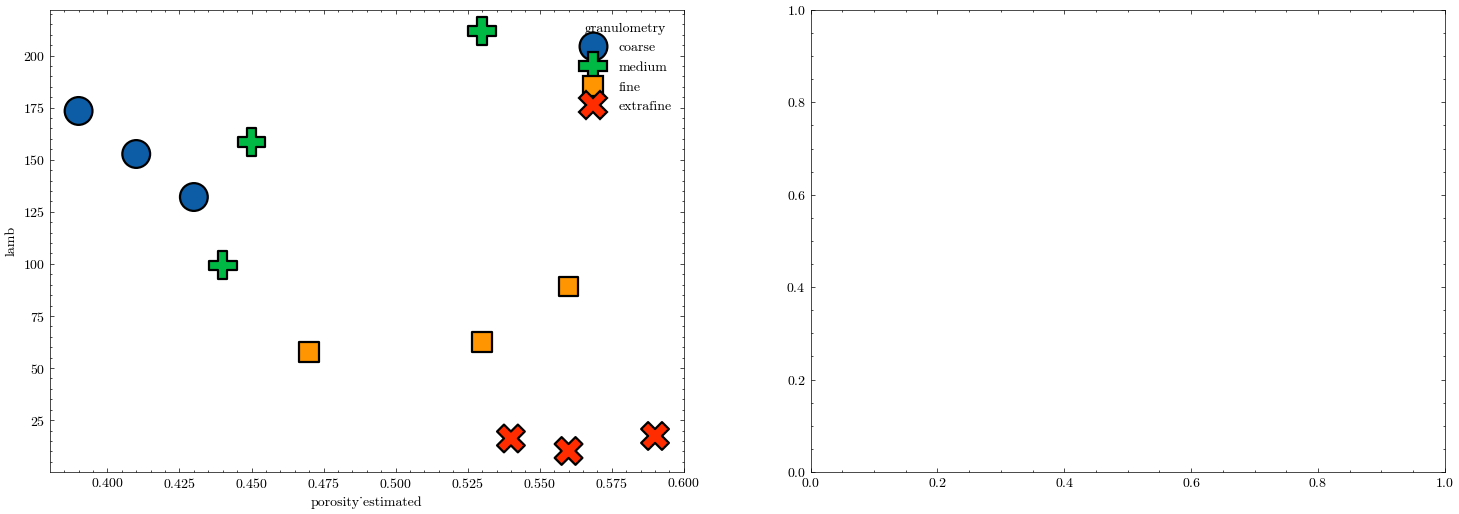

In [11]:
def get_rsquare(y_data, y_pred):
    # Calculate residuals:
    residuals = y_data - y_pred
    # Total sum of squares:
    ss_total = np.sum((y_data - np.mean(y_data))**2)
    # Residual sum of squares:
    ss_residual = np.sum(residuals**2)
    # R-squared:
    r_squared = 1 - (ss_residual / ss_total)
    
    return round(r_squared, 2)

# JCA and JCAL PARAMETERS

mean_length = {'coarse':5.43,
               'extrafine':0.98, 
               'fine':2.03, 
               'medium':3.21 }  # coarse, extrafine, fine, medium

mean_width = {'coarse':3.99,
               'extrafine':0.72, 
               'fine':1.61, 
               'medium':2.56 }  # coarse, extrafine, fine, medium

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

# df_parameters = pd.DataFrame(parameters_allsamples)

# Read the parameters from the DataFrame:
df_parameters = pd.read_csv('inversion_parameters_all_samples_diffevol.csv')
# Take off the 'loose' samples

df_parameters['granulometry'] = df_parameters['sample_name'].apply(lambda x: x.split('-')[1])
df_parameters= df_parameters.set_index('sample_name')
mask = ~df_parameters.index.str.contains('loose')
df_parameters = df_parameters[mask]

# df_parameters.loc['YM2-fine-loose', 'tau_ent'] = 0.41  # Adjusting the tau_vor value for a specific sample
df_parameters.loc['YM2-coarse-d1', 's_por'] = 2.73
df_parameters.loc[df_parameters['model'] == 'Horosh. et al.', 'model'] = 'HS'
df_parameters.loc[df_parameters['model'] == 'Wilson et al.', 'model'] = 'WS'
samples_abs_df.index = samples_abs_df.index.str.replace('_', '-')

# DEFINE SUBSET OF DATA TO PLOT
#JCA
filtered_df = df_parameters[df_parameters['model'] == 'JCA'].copy()
filtered_df['porosity_estimated'] = samples_abs_df['porosity_estimated']
filtered_df['tortuosity_estimated'] = samples_abs_df['tortuosity_estimated']
filtered_df['sigma'] = samples_abs_df['sigma_estimated']
filtered_df['dens_value'] = samples_abs_df['dens_value']
filtered_df['norm_lamb'] = 1
filtered_df['lamb_prima'][0] = 224
filtered_df['lamb'][1]= (filtered_df['lamb'][0]+filtered_df['lamb'][2])/2
#JCAL 
filtered_JCAL_df = df_parameters[df_parameters['model'] == 'JCAL'].copy()
filtered_JCAL_df['porosity_estimated'] = samples_abs_df['porosity_estimated']
filtered_JCAL_df['tortuosity_estimated'] = samples_abs_df['tortuosity_estimated']
filtered_JCAL_df['dens_value'] = samples_abs_df['dens_value']
filtered_JCAL_df['norm_lamb'] = 1
for index, row in filtered_df.iterrows():
    granulometry_type = row['granulometry']
    multiplier = mean_length.get(granulometry_type, 1)  # default to 1 if not found
    filtered_df.at[index, 'norm_lamb'] = row['lamb'] / row['lamb_prima']
# WILSON
filtered_WS_df = df_parameters[df_parameters['model'] == 'WS'].copy()
filtered_WS_df['porosity_estimated'] = samples_abs_df['porosity_estimated']
filtered_WS_df['tortuosity_estimated'] = samples_abs_df['tortuosity_estimated']
filtered_WS_df['dens_value'] = samples_abs_df['dens_value']
filtered_WS_df['lamb'] = filtered_df['lamb']
filtered_WS_df['lamb_prima'] = filtered_df['lamb_prima']
filtered_WS_df.loc['YM2-extrafine-d2','tau_ent'] = 0.24
filtered_WS_df.loc['YM2-medium-d1','tau_ent'] = 0.52
# HOROSHENKOV
filtered_HS_df = df_parameters[df_parameters['model'] == 'HS'].copy()
filtered_HS_df['porosity_estimated'] = samples_abs_df['porosity_estimated']
filtered_HS_df['lamb'] = filtered_df['lamb']
filtered_HS_df['lamb_prima'] = filtered_df['lamb_prima']
filtered_HS_df['norm_lamb'] = filtered_df['norm_lamb']
filtered_HS_df['tortuosity_estimated'] = samples_abs_df['tortuosity_estimated']
filtered_HS_df['tau_vor'] = filtered_WS_df['tau_vor']
filtered_HS_df['tau_ent'] = filtered_WS_df['tau_ent']
filtered_HS_df['dens_value'] = samples_abs_df['dens_value']
for index, row in filtered_HS_df.iterrows():
    granulometry_type = row['granulometry']
    multiplier = mean_length.get(granulometry_type, 1)  # default to 1 if not found
    filtered_HS_df.at[index, 'norm_dens'] = row['dens_value'] / multiplier*1e-3

filtered_df['tau_ent'] = filtered_WS_df['tau_ent']
filtered_df['tau_vor'] = filtered_WS_df['tau_vor']


fontsize=28
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

x1var = 'porosity_estimated'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
y1var = 'lamb'

sns.scatterplot(data=filtered_df, x=x1var, y=y1var, hue='granulometry', ax=ax0, s=400, edgecolor='black',sizes=(200, 400), hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m, b, c):
        
        # return m*(x**2) + b*x + c 
        return m*x + b
    
    y = subset[y1var]
    x = subset[x1var]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (lamb) {granul_value}={r2}')

    xmin = subset[x1var].min()
    xmax = subset[x1var].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = linear_fit(xinterval, *popt)

    ax0.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, alpha=0.7)

ax0.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax0.set_ylabel(r"$\Lambda$ [$\mu$m]", fontsize=fontsize)
# ax0.set_xlabel(f'{x1var}')
# ax0.set_ylabel(f'{y1var}')
legend =ax0.legend(fontsize=fontsize-7, labelspacing=0.3, handletextpad=0.1, markerscale=2)
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')




x2var='porosity_estimated'  # 'porosity_estimated' or 'tortuosity_estimated' or 'sigma' or 'dens_value'
y2var = 'lamb_prima'  # 'lamb' or 'lamb_prima' or 'norm_lamb'

sns.scatterplot(data=filtered_df, x=x2var, y=y2var, ax=ax1, hue='granulometry', s=400, sizes=(200, 400), edgecolor='black',hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m, b, c):
        
        return m*x + b 
        # return m*(x**2) + b*x + c
    
    y = subset[y2var]
    x = subset[x2var]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (lamb_prima) {granul_value}={r2}')

    xmin = subset[x2var].min()
    xmax = subset[x2var].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = linear_fit(xinterval, *popt)

    ax1.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, alpha=0.7)

ax1.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax1.set_ylabel(r"$\Lambda^{'}$ [$\mu$m]", fontsize=fontsize)
# ax1.set_xlabel(f'{x2var}', fontsize=fontsize)
# ax1.set_ylabel(f'{y2var}', fontsize=fontsize)
legend =ax1.legend(fontsize=fontsize-7, labelspacing=0.3,  handletextpad=0.1, markerscale=2)
legend.set_frame_on(False)

ax1.grid(which='both', alpha=0.3)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')
plt.subplots_adjust(wspace=0.25)
plt.show()

In [156]:
#!pip install --upgrade numpy scipy

df_parameters.loc['YM2-coarse-d2', 'lamb'][0] = filtered_df['lamb'][1].copy()
df_parameters.loc['YM2-coarse-d1', 'lamb_prima'][0] = filtered_df['lamb_prima'][0].copy()
df_parameters.loc['YM2-extrafine-d2','tau_ent'][3] = filtered_WS_df.loc['YM2-extrafine-d2','tau_ent'].copy()
df_parameters.loc['YM2-medium-d1','tau_ent'][3] = filtered_WS_df.loc['YM2-medium-d1','tau_ent'].copy()
# print(df_parameters.loc['YM2-extrafine-d2','tau_ent'][3])
# print(df_parameters.loc['YM2-medium-d1','tau_ent'][3])

# print(filtered_WS_df.loc['YM2-extrafine-d2','tau_ent']) 
# print(filtered_WS_df.loc['YM2-medium-d1','tau_ent']) 



C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\2504352450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parameters.loc['YM2-coarse-d2', 'lamb'][0] = filtered_df['lamb'][1].copy()
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\2504352450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parameters.loc['YM2-coarse-d1', 'lamb_prima'][0] = filtered_df['lamb_prima'][0].copy()
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\2504352450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [157]:
from scipy import stats

data = filtered_df[['granulometry', 'lamb_prima', 'lamb', 'porosity_estimated', 'phi']]

# Get list of unique granulometry groups
groups = data['granulometry'].unique()

xvar='porosity_estimated'
yvar='lamb'

print(f"\nAnalyzing graph: {xvar} vs. {yvar}")

for group in groups:
    group_data = data[data['granulometry'] == group]
    Lambda = group_data[xvar].values
    Lambda_prime = group_data[yvar].values

    print(f"\nAnalyzing group: {group}")


    # Correlation analysis
    pearson_corr, p_value_pearson = stats.pearsonr(Lambda, Lambda_prime)
    spearman_corr, p_value_spearman = stats.spearmanr(Lambda, Lambda_prime)

    print(f"Pearson's r: {pearson_corr:.4f}, p-value: {p_value_pearson:.4e}")
    print(f"Spearman's rho: {spearman_corr:.4f}, p-value: {p_value_spearman:.4e}")

    # Regression with scikit-learn
    X = Lambda.reshape(-1, 1)
    y = Lambda_prime

    # Polynomial features (quadratic)
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Regression coefficients
    intercept = model.intercept_
    coef = model.coef_
    print(f"Quadratic model for {group}: y = {intercept:.3f} + {coef[0]:.3f}*x ")

    # Generate fitted curve
    X_range = np.linspace(Lambda.min(), Lambda.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # # Plot regression fit
    # plt.scatter(Lambda, Lambda_prime, label='Data')
    # plt.plot(X_range, y_pred, color='red', label='Quadratic fit')
    # # plt.xlabel('Λ')
    # # plt.ylabel("Λ'")
    # plt.xlabel(xvar)
    # plt.ylabel(yvar)
    # plt.title(f"Quadratic regression for {group}")
    # plt.legend()
    # plt.show()

    # R^2 score
    r2 = model.score(X_poly, y)
    print(f"R^2 for {group}: {r2:.3f}")


Analyzing graph: porosity_estimated vs. lamb

Analyzing group: coarse
Pearson's r: -1.0000, p-value: 0.0000e+00
Spearman's rho: -1.0000, p-value: 0.0000e+00
Quadratic model for coarse: y = 576.075 + -1032.500*x 
R^2 for coarse: 1.000

Analyzing group: extrafine
Pearson's r: 0.2678, p-value: 8.2739e-01
Spearman's rho: 0.5000, p-value: 6.6667e-01
Quadratic model for extrafine: y = -8.526 + 41.053*x 
R^2 for extrafine: 0.072

Analyzing group: fine
Pearson's r: 0.8397, p-value: 3.6545e-01
Spearman's rho: 1.0000, p-value: 0.0000e+00
Quadratic model for fine: y = -91.029 + 309.286*x 
R^2 for fine: 0.705

Analyzing group: medium
Pearson's r: 0.8996, p-value: 2.8765e-01
Spearman's rho: 1.0000, p-value: 0.0000e+00
Quadratic model for medium: y = -328.795 + 1025.411*x 
R^2 for medium: 0.809


In [104]:
# CHECK STATISTICAL SIGNIFICANCE FOR LAMB_PRIMA VS POROSITY


Pearson's r: -0.779, p-value: 2.814e-03
Spearman's rho: -0.839, p-value: 6.428e-04
Exponential fit parameters: a = 201.990, b = -0.000
Pearson's r: -0.666, p-value: 1.804e-02
Spearman's rho: -0.902, p-value: 5.998e-05
Exponential fit parameters: a = 55.451, b = -0.000, c = 175.133
Pearson's r: 0.762, p-value: 4.000e-03
Spearman's rho: 0.776, p-value: 2.993e-03
Exponential fit parameters: a = 32.019, b = 0.008, c = 204.558


C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\305267403.py:193: RuntimeWarning: invalid value encountered in log10
  return a * np.log10(b*x) + c


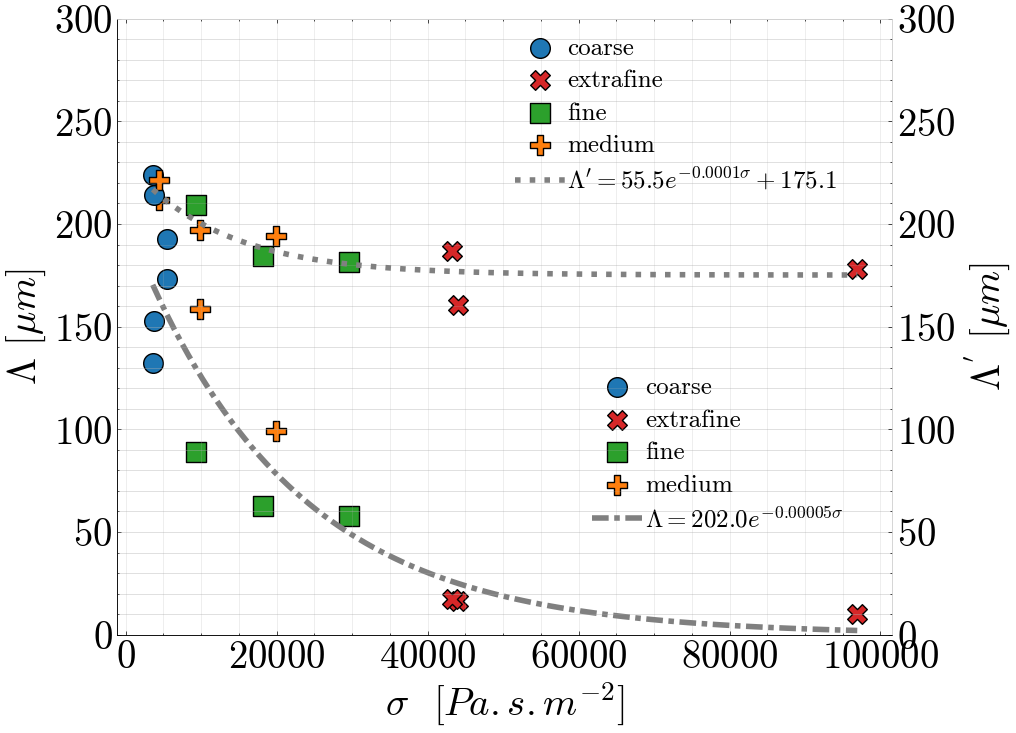

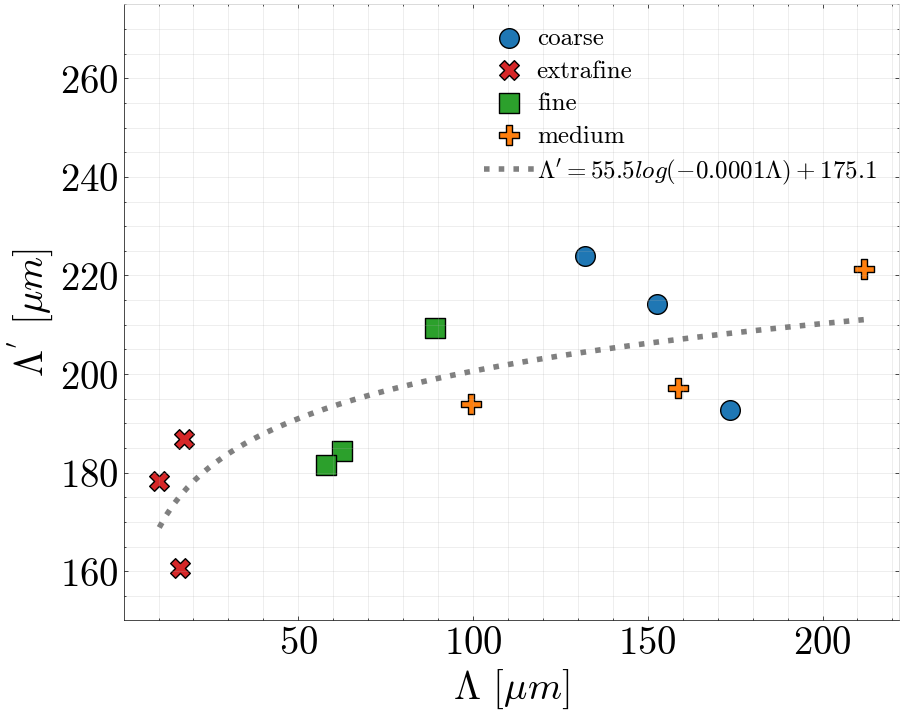

Left: sigma vs lamb
R^2: 0.835
Pearson's r: -0.779, p-value: 2.814e-03
Spearman's rho: -0.839, p-value: 6.428e-04
--------------------------------------------------
Left: sigma vs lamb_prima
R^2: 0.758
Pearson's r: -0.666, p-value: 1.804e-02
Spearman's rho: -0.902, p-value: 5.998e-05
--------------------------------------------------
Right: lamb vs lamb_prima
R^2: 0.576
Pearson's r: 0.762, p-value: 4.000e-03
Spearman's rho: 0.776, p-value: 2.993e-03


In [12]:

xvar='sigma'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar = 'lamb'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_df.index.str.contains('loose')
filtered_df_noloose = filtered_df[mask]

# x0 = filtered_df[xvar].values
# y0 = filtered_df[yvar].values

x0 = filtered_df_noloose[xvar].values
y0 = filtered_df_noloose[yvar].values
# y0[1]=(y0[0]+y0[2])/2

# Correlaciones
pearson_corr, p_value_pearson = stats.pearsonr(x0, y0)
spearman_corr, p_value_spearman = stats.spearmanr(x0, y0)

print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

# Preparar los datos para modelos
X = x0.reshape(-1, 1)
y = y0

# Define the exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential model
# Use your x2 and y2 data
params, covariance = curve_fit(exp_func, x0, y0, p0=(max(y0), -0.0001),maxfev=10000)

a_exp, b_exp = params
print(f"Exponential fit parameters: a = {a_exp:.3f}, b = {b_exp:.3f}")

# Generate y-values for the exponential fit
x_fit = np.linspace(x0.min(), x0.max(), 100)
y_fit_exp = exp_func(x_fit, a_exp, b_exp)

r2_exp = 1 - np.sum((y0 - exp_func(x0, *params))**2) / np.sum((y0 - np.mean(y0))**2)


# Modelo lineal
# X_const = sm.add_constant(X)
# model_linear = sm.OLS(y, X_const).fit()

# Modelo cuadrático
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)
# X_poly_const = sm.add_constant(X_poly)
# model_quad = sm.OLS(y, X_poly_const).fit()

# Comparar modelos con ANOVA
# anova_results = sm.stats.anova_lm(model_linear, model_quad)
# print("\nComparación ANOVA entre modelos lineal y cuadrático:")
# print(anova_results)

# # Resumen del mejor modelo (según ANOVA o R^2)
# print("\nResumen del modelo lineal:")
# print(model_linear.summary())

# print("\nResumen del modelo cuadrático:")
# print(model_quad.summary())

# Predicciones para la curva ajustada
# X_range = np.linspace(x0.min(), x0.max(), 100).reshape(-1, 1)
# X_range_poly = poly.transform(X_range)

# y_pred_quad0 = model_quad.predict(sm.add_constant(X_range_poly))

#--------------------------------------------------------------------------------------------------------------------------------------

xvar1='sigma'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar1 = 'lamb_prima'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_df.index.str.contains('loose')
filtered_df_noloose = filtered_df[mask]

# x1 = filtered_df[xvar1].values
# y1 = filtered_df[yvar1].values

x1 = filtered_df_noloose[xvar1].values
y1 = filtered_df_noloose[yvar1].values
# y1[0]=224


# Correlaciones
pearson_corr1, p_value_pearson1 = stats.pearsonr(x1, y1)
spearman_corr1, p_value_spearman1 = stats.spearmanr(x1, y1)

print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")

# Preparar los datos para modelos
X = x1.reshape(-1, 1)
y = y1


# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential model
# Use your x2 and y2 data
params1, covariance1 = curve_fit(exp_func, x1, y1, p0=(max(y1), -0.0001, 50), maxfev=10000)

a_exp1, b_exp1, c_fit1 = params1
print(f"Exponential fit parameters: a = {a_exp1:.3f}, b = {b_exp1:.3f}, c = {c_fit1:.3f}")

# Generate y-values for the exponential fit
x_fit1 = np.linspace(x1.min(), x1.max(), 100)
y_fit_exp1 = exp_func(x_fit1, a_exp1, b_exp1, c_fit1)

r2_exp1 = 1 - np.sum((y1 - exp_func(x1, *params1))**2) / np.sum((y1 - np.mean(y1))**2)


# Modelo lineal
# X_const = sm.add_constant(X)
# model_linear = sm.OLS(y, X_const).fit()

# Modelo cuadrático
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)
# X_poly_const = sm.add_constant(X_poly)
# model_quad1 = sm.OLS(y, X_poly_const).fit()

# Comparar modelos con ANOVA
# anova_results = sm.stats.anova_lm(model_linear, model_quad1)
# print("\nComparación ANOVA entre modelos lineal y cuadrático:")
# print(anova_results)

# # Resumen del mejor modelo (según ANOVA o R^2)    
# print("\nResumen del modelo lineal:")
# print(model_linear.summary())

# print("\nResumen del modelo cuadrático:")
# print(model_quad1.summary())

# Predicciones para la curva ajustada
# X_range1 = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)
# X_range_poly = poly.transform(X_range1)

# y_pred_quad1 = model_quad1.predict(sm.add_constant(X_range_poly))


# -------------------------------------------------------------------------------


xvar2='lamb'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar2 = 'lamb_prima'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_df.index.str.contains('loose')
filtered_df_noloose = filtered_df[mask]

# x1 = filtered_df[xvar2].values
# y1 = filtered_df[yvar2].values

x2 = filtered_df_noloose[xvar2].values
y2 = filtered_df_noloose[yvar2].values
# y2[0]=224
# x2[1]=(x2[0]+x2[2])/2

# Correlaciones
pearson_corr2, p_value_pearson2 = stats.pearsonr(x2, y2)
spearman_corr2, p_value_spearman2 = stats.spearmanr(x2, y2)

print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

# Preparar los datos para modelos
X = x2.reshape(-1, 1)
y = y2

# Modelo lineal
# X_const = sm.add_constant(X)
# model_linear = sm.OLS(y, X_const).fit()

# Modelo cuadrático
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)
# X_poly_const = sm.add_constant(X_poly)
# model_quad2 = sm.OLS(y, X_poly_const).fit()

# a_fit2, b_fit2, c_fit2 = model_quad2.params


# Define the exponential function
def exp_func(x, a, b, c):
    # return a * np.exp(b * x) + c
    return a * np.log10(b*x) + c

# Fit the exponential model
# Use your x2 and y2 data
params2, covariance2 = curve_fit(exp_func, x2, y2, p0=(max(y2), 0.01, 150), maxfev=10000)

a_exp2, b_exp2, c_fit2 = params2
print(f"Exponential fit parameters: a = {a_exp2:.3f}, b = {b_exp2:.3f}, c = {c_fit2:.3f}")

# Generate y-values for the exponential fit
x_fit2 = np.linspace(x2.min(), x2.max(), 100)
y_fit_exp2 = exp_func(x_fit2, *params2)

r2_exp2 = 1 - np.sum((y2 - exp_func(x2, *params2))**2) / np.sum((y2 - np.mean(y2))**2)


# Comparar modelos con ANOVA
# anova_results = sm.stats.anova_lm(model_linear, model_quad2)
# print("\nComparación ANOVA entre modelos lineal y cuadrático:")
# print(anova_results)

# # Resumen del mejor modelo (según ANOVA o R^2)
# print("\nResumen del modelo lineal:")
# print(model_linear.summary())

# print("\nResumen del modelo cuadrático:")
# print(model_quad2.summary())

# Predicciones para la curva ajustada
# X_range2 = np.linspace(x2.min(), x2.max(), 100).reshape(-1, 1)
# X_range_poly = poly.transform(X_range2)

# y_pred_quad2 = model_quad2.predict(sm.add_constant(X_range_poly))


# Plot ---------------------------------------------------------------------


custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]

fig, (ax0) = plt.subplots(1, 1, figsize=(10, 8))

fontsize=28


groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax0.scatter(filtered_df_noloose.loc[mask, xvar].values, filtered_df_noloose.loc[mask, yvar].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax0.scatter(x0, y0, label=r"$\Lambda$", s=200, color=custom_color2[0], edgecolors='black')
# ax0.plot(X_range, y_pred_quad0, linestyle=linestyles[1], color=custom_color2[0], linewidth=4, label='Fit')
ax0.plot(x_fit, y_fit_exp, linestyle=linestyles[4], color='grey', linewidth=4, label=fr'$\Lambda = {a_exp:.1f} e^{{{b_exp:.5f}\sigma}}$')
ax0.set_xlabel(r'$\sigma$  [$Pa.s.m^{-2}$]', fontsize=fontsize)
ax0.set_ylabel(r"$\Lambda$"  r' [$\mu m$]', fontsize=fontsize)
# ax0.set_xlabel(f'{xvar}', fontsize=fontsize)  
# ax0.set_ylabel(f'{yvar}', fontsize=fontsize)
ax0.set_ylim(0, 300)
legend =ax0.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc=(0.6, 0.15))
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')


ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax1.scatter(filtered_df_noloose.loc[mask, xvar1].values, filtered_df_noloose.loc[mask, yvar1].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax1.scatter(x1, y1, label=r"$\Lambda^{'}$", s=200, marker='^', color=custom_color2[1], edgecolors='black')
# ax1.plot(X_range1, y_pred_quad1,linestyle=linestyles[2], color=custom_color2[1], linewidth=4, label= 'Fit')
ax1.plot(x_fit1, y_fit_exp1, linestyle=linestyles[3], color='grey', linewidth=4, label=fr"$ \Lambda'= {a_exp1:.1f} e^{{{b_exp1:.4f}\sigma}} + {c_fit1:.1f}$")
# ax1.set_ylabel(r"$\Lambda^{'}$"  r" [$\mu m$]", fontsize=fontsize)
# ax1.set_xlabel(r'$\overline{s}$ [mm]', fontsize=fontsize)
ax1.set_xlabel(r'$\sigma$  [$Pa.s.m^{-2}$]', fontsize=fontsize)
ax1.set_ylabel(r"$\Lambda^{'}$"  r' [$\mu m$]', fontsize=fontsize)
ax1.set_ylim(0, 300)
# ax1.set_xlabel(f'{xvar1}', fontsize=fontsize)  
# ax1.set_ylabel(f'{yvar1}', fontsize=fontsize)
legend =ax1.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc=(0.5, 0.7))
legend.set_frame_on(False)
ax1.grid(which='both', alpha=0.3)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')


fig, (ax2) = plt.subplots(1, 1, figsize=(10, 8))

groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax2.scatter(filtered_df_noloose.loc[mask, xvar2].values, filtered_df_noloose.loc[mask, yvar2].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax2.scatter(x2, y2, label='Data', s=200, color=custom_color2[0], edgecolors='black')
# ax2.plot(X_range2, y_pred_quad2, linestyle=linestyles[2], color='grey', linewidth=4, label=fr'$y = {a_exp1:.1f} log({b_exp1:.4f}x) + {c_fit1:.1f}$')
ax2.plot(x_fit2, y_fit_exp2, linestyle=linestyles[3], color='grey', linewidth=4, label=fr"$\Lambda' = {a_exp1:.1f} log({{{b_exp1:.4f}\Lambda}}) + {c_fit1:.1f}$")
ax2.set_xlabel(r"$\Lambda$"  r' [$\mu m$]', fontsize=fontsize)
ax2.set_ylabel(r"$\Lambda^{'}$"  r' [$\mu m$]', fontsize=fontsize)
# ax2.set_xlabel(f'{xvar2}', fontsize=fontsize)  
# ax2.set_ylabel(f'{yvar2}', fontsize=fontsize)
ax2.set_ylim(150, 275)
legend =ax2.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='upper right')
legend.set_frame_on(False)
ax2.grid(which='both', alpha=0.3)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.4)
plt.show()

# R^2 del modelo cuadrático
# r2_quad = model_quad.rsquared
# r2_quad1 = model_quad1.rsquared
# r2_quad3 = model_quad2.rsquared

print(f'Left: {xvar} vs {yvar}')
# print(f"R^2: {r2_quad:.3f}")
print(f"R^2: {r2_exp:.3f}")
print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")
print("--------------------------------------------------")

print(f'Left: {xvar1} vs {yvar1}')
# print(f"R^2: {r2_quad1:.3f}")
print(f"R^2: {r2_exp1:.3f}")
print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")
print("--------------------------------------------------")

print(f'Right: {xvar2} vs {yvar2}')
# print(f"R^2: {r2_quad3:.3f}")
print(f"R^2: {r2_exp2:.3f}")
print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")


In [106]:
5.998e-05



5.998e-05

C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:14: UserWarning: Boolean Series key will be reindexed 

R^2 (tau_vor) coarse=0.94
R^2 (tau_vor) medium=0.02
R^2 (tau_vor) fine=0.86
R^2 (tau_vor) extrafine=0.16


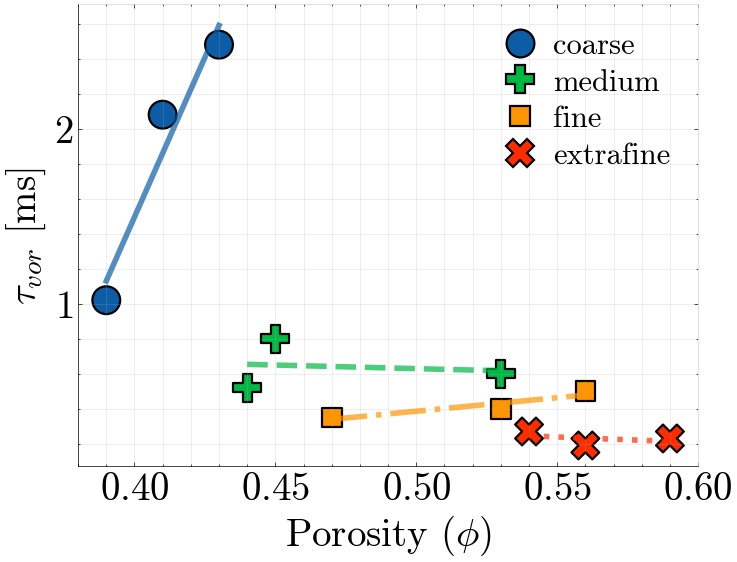

C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\joaqu\AppData\Local\Temp\ipykernel_482244\470754612.py:62: UserWarning: Boolean Series key will be reindexed 

R^2 (tau_ent) coarse=1.0
R^2 (tau_ent) medium=0.83
R^2 (tau_ent) fine=0.96
R^2 (tau_ent) extrafine=0.64


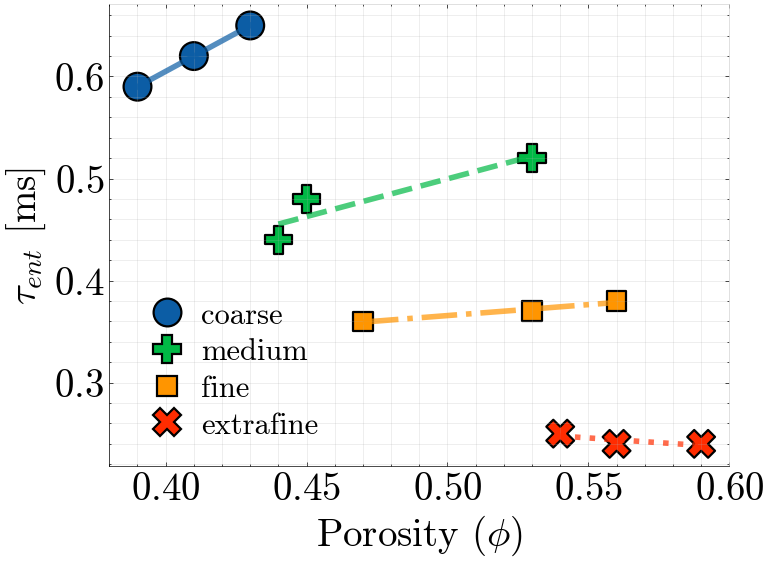

In [18]:
# WILSON PARAMETERS PLOT


fontsize=28

fig, (ax0) = plt.subplots(1, 1, figsize=(8, 6))

x0var = 'porosity_estimated'
y0var = 'tau_vor'

sns.scatterplot(data=filtered_WS_df, x=x0var, y=y0var, ax=ax0, hue='granulometry', edgecolor='black', s=400, sizes=(200, 400), hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m,b, c):
        
        return m*(x) + c 
        #return m*(x**2) + b*x + c
        # return m + b*np.log10(c*x)
    
    y = subset[y0var]
    x = subset[x0var]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (tau_vor) {granul_value}={r2}')

    xmin = subset[x0var].min()
    xmax = subset[x0var].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = linear_fit(xinterval, *popt)

    ax0.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4,alpha=0.7)


ax0.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax0.set_ylabel(r'$\tau_{vor}$ [ms]', fontsize=fontsize)
# ax0.set_xlabel(f'{x0var}', fontsize=fontsize)
# ax0.set_ylabel(f'{y0var}', fontsize=fontsize)
# ax0.set_xlim([0.3, 0.65])
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')
legend =ax0.legend(fontsize=fontsize-6,  labelspacing=0.3, handletextpad=0.1)
legend.set_frame_on(False)

xvar = 'porosity_estimated'
yvar = 'tau_ent' 

plt.show()

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=filtered_WS_df, x=xvar, y=yvar, ax=ax1, hue='granulometry', edgecolor='black', s=400, sizes=(200, 400), hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_WS_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m, b, c):
        
        return m*(x) + b 
        # return m*(x**2) + b*x + c
        

    y = subset[yvar]
    x = subset[xvar]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (tau_ent) {granul_value}={r2}')

    xmin = subset[xvar].min()
    xmax = subset[xvar].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    
    yinterval = linear_fit(xinterval, *popt)

    ax1.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, alpha=0.7)

ax1.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax1.set_ylabel(r'$\tau_{ent}$ [ms]', fontsize=fontsize)
# ax1.set_xlabel(f'{xvar}', fontsize=fontsize)
# ax1.set_ylabel(f'{yvar}', fontsize=fontsize)
ax1.grid(which='both', alpha=0.3)
# ax1.set_xlim([0.3, 0.65])
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')
legend =ax1.legend(fontsize=fontsize-6,  labelspacing=0.3, handletextpad=0.1, markerscale=1)
legend.set_frame_on(False)

plt.subplots_adjust(wspace=0.25)
plt.show()




In [108]:
# CHECK STATISTICAL SIGNIFICANCE FOR TAU_ENT VS POROSITY

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = filtered_WS_df[['granulometry', 'tau_ent', 'tau_vor', 'porosity_estimated']]

# Get list of unique granulometry groups
groups = data['granulometry'].unique()

print('Porosity vs. tau_ent')

for group in groups:
    group_data = data[data['granulometry'] == group]
    Lambda = group_data['porosity_estimated'].values
    Lambda_prime = group_data["tau_ent"].values

    print(f"\nAnalyzing group: {group}")



    # Correlation analysis
    pearson_corr, p_value_pearson = stats.pearsonr(Lambda, Lambda_prime)
    spearman_corr, p_value_spearman = stats.spearmanr(Lambda, Lambda_prime)

    print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
    print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

    # Regression with scikit-learn
    X = Lambda.reshape(-1, 1)
    y = Lambda_prime

    # Polynomial features (linear)
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Regression coefficients
    intercept = model.intercept_
    coef = model.coef_
    print(f"Linear model for {group}: y = {intercept:.3f} + {coef[0]:.3f}*x ")

    # Generate fitted curve
    X_range = np.linspace(Lambda.min(), Lambda.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # # Plot regression fit
    # plt.scatter(Lambda, Lambda_prime, label='Data')
    # plt.plot(X_range, y_pred, color='red', label='Quadratic fit')
    # plt.xlabel('Λ')
    # plt.ylabel("Λ'")
    # plt.title(f"Quadratic regression for {group}")
    # plt.legend()
    # plt.show()

    # R^2 score
    r2 = model.score(X_poly, y)
    print(f"R^2 for {group}: {r2:.3f}")


Porosity vs. tau_ent

Analyzing group: coarse
Pearson's r: 1.000, p-value: 0.000e+00
Spearman's rho: 1.000, p-value: 0.000e+00
Linear model for coarse: y = 0.005 + 1.500*x 
R^2 for coarse: 1.000

Analyzing group: extrafine
Pearson's r: -0.803, p-value: 4.065e-01
Spearman's rho: -0.866, p-value: 3.333e-01
Linear model for extrafine: y = 0.347 + -0.184*x 
R^2 for extrafine: 0.645

Analyzing group: fine
Pearson's r: 0.982, p-value: 1.210e-01
Spearman's rho: 1.000, p-value: 0.000e+00
Linear model for fine: y = 0.259 + 0.214*x 
R^2 for fine: 0.964

Analyzing group: medium
Pearson's r: 0.912, p-value: 2.687e-01
Spearman's rho: 1.000, p-value: 0.000e+00
Linear model for medium: y = 0.130 + 0.740*x 
R^2 for medium: 0.832


In [109]:
data = filtered_WS_df[['granulometry', 'tau_ent', 'tau_vor', 'porosity_estimated']]

# Get list of unique granulometry groups
groups = data['granulometry'].unique()

print('Porosity vs. tau_vor')

for group in groups:
    group_data = data[data['granulometry'] == group]
    Lambda = group_data['porosity_estimated'].values
    Lambda_prime = group_data["tau_vor"].values

    print(f"\nAnalyzing group: {group}")



    # Correlation analysis
    pearson_corr, p_value_pearson = stats.pearsonr(Lambda, Lambda_prime)
    spearman_corr, p_value_spearman = stats.spearmanr(Lambda, Lambda_prime)

    print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
    print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

    # Regression with scikit-learn
    X = Lambda.reshape(-1, 1)
    y = Lambda_prime

    # Polynomial features (linear)
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Regression coefficients
    intercept = model.intercept_
    coef = model.coef_
    print(f"Linear model for {group}: y = {intercept:.3f} + {coef[0]:.3f}*x ")

    # Generate fitted curve
    X_range = np.linspace(Lambda.min(), Lambda.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # # Plot regression fit
    # plt.scatter(Lambda, Lambda_prime, label='Data')
    # plt.plot(X_range, y_pred, color='red', label='Quadratic fit')
    # plt.xlabel('Λ')
    # plt.ylabel("Λ'")
    # plt.title(f"Quadratic regression for {group}")
    # plt.legend()
    # plt.show()

    # R^2 score
    r2 = model.score(X_poly, y)
    print(f"R^2 for {group}: {r2:.3f}")

Porosity vs. tau_vor

Analyzing group: coarse
Pearson's r: 0.968, p-value: 1.625e-01
Spearman's rho: 1.000, p-value: 0.000e+00
Linear model for coarse: y = -13.105 + 36.500*x 
R^2 for coarse: 0.936

Analyzing group: extrafine
Pearson's r: -0.397, p-value: 7.399e-01
Spearman's rho: -0.500, p-value: 6.667e-01
Linear model for extrafine: y = 0.586 + -0.632*x 
R^2 for extrafine: 0.158

Analyzing group: fine
Pearson's r: 0.929, p-value: 2.421e-01
Spearman's rho: 1.000, p-value: 0.000e+00
Linear model for fine: y = -0.388 + 1.548*x 
R^2 for fine: 0.862

Analyzing group: medium
Pearson's r: -0.141, p-value: 9.102e-01
Spearman's rho: 0.500, p-value: 6.667e-01
Linear model for medium: y = 0.835 + -0.411*x 
R^2 for medium: 0.020


Pearson's r: 0.541, p-value: 6.923e-02
Spearman's rho: 0.860, p-value: 3.317e-04
Exponential fit parameters: a = 0.448, b = 0.005
Pearson's r: 0.784, p-value: 2.522e-03
Spearman's rho: 0.830, p-value: 8.314e-04
Exponential fit parameters: a = 0.028, b = 0.014
Pearson's r: 0.850, p-value: 4.613e-04
Spearman's rho: 0.991, p-value: 3.992e-10


c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


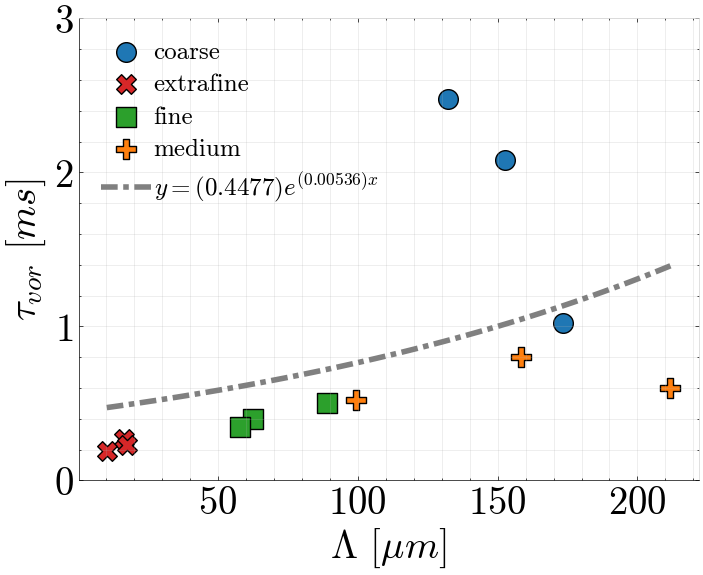

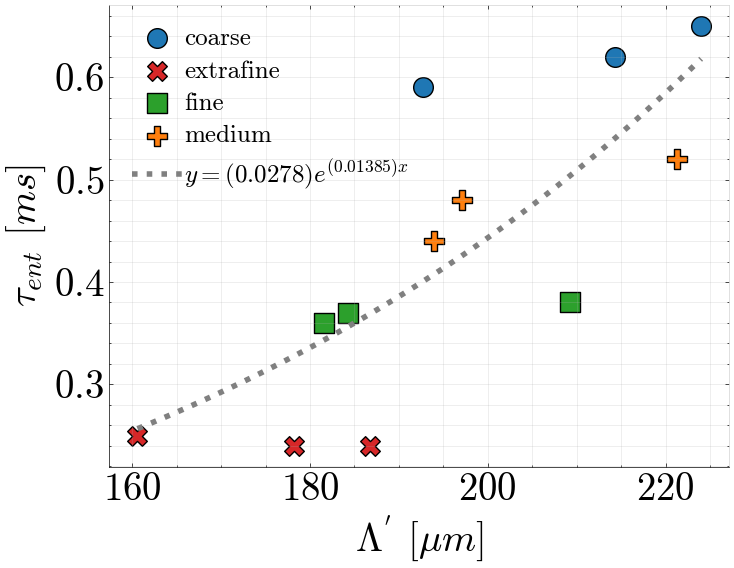

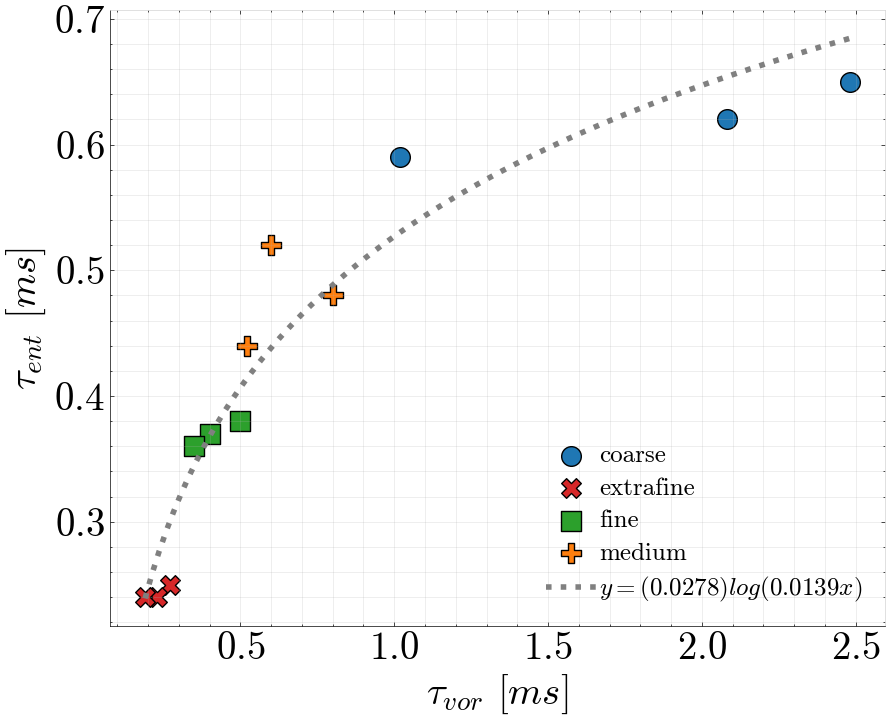

Left: lamb vs tau_vor
R^2: 0.219
Pearson's r: 0.541, p-value: 6.923e-02
Spearman's rho: 0.860, p-value: 3.317e-04
--------------------------------------------------
Left: lamb_prima vs tau_ent
R^2: 0.606
Pearson's r: 0.784, p-value: 2.522e-03
Spearman's rho: 0.830, p-value: 8.314e-04
--------------------------------------------------
Right: tau_vor vs tau_ent
R^2: 0.925
Pearson's r: 0.850, p-value: 4.613e-04
Spearman's rho: 0.991, p-value: 3.992e-10


In [19]:
xvar='lamb'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar = 'tau_vor'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_WS_df.index.str.contains('loose')
filtered_WS_df_noloose = filtered_WS_df[mask]

# x0 = filtered_WS_df[xvar].values
# y0 = filtered_WS_df[yvar].values

x0 = filtered_WS_df_noloose[xvar].values
y0 = filtered_WS_df_noloose[yvar].values

# Correlaciones
pearson_corr, p_value_pearson = stats.pearsonr(x0, y0)
spearman_corr, p_value_spearman = stats.spearmanr(x0, y0)

print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) 
    #return a*x + b
    #return a*(x**2) +b*x +c

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y0), 0.1, 1)
params, covariance = curve_fit(exp_func, x0, y0, p0=p0,maxfev=10000)

a_exp, b_exp, c_exp = params
print(f"Exponential fit parameters: a = {a_exp:.3f}, b = {b_exp:.3f}")

# Generate y-values for the exponential fit
x_fit = np.linspace(x0.min(), x0.max(), 100)
y_fit_exp = exp_func(x_fit, *params)

r2_exp = 1 - np.sum((y0 - exp_func(x0, *params))**2) / np.sum((y0 - np.mean(y0))**2)



#--------------------------------------------------------------------------------------------------------------------------------------

xvar1='lamb_prima'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar1 = 'tau_ent'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_WS_df.index.str.contains('loose')
filtered_WS_df_noloose = filtered_WS_df[mask]

# x1 = filtered_df[xvar1].values
# y1 = filtered_df[yvar1].values

x1 = filtered_WS_df_noloose[xvar1].values
y1 = filtered_WS_df_noloose[yvar1].values


# Correlaciones
pearson_corr1, p_value_pearson1 = stats.pearsonr(x1, y1)
spearman_corr1, p_value_spearman1 = stats.spearmanr(x1, y1)

print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")


# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) 
    #return a*x + b

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y1), 0.01, 0)
params1, covariance1 = curve_fit(exp_func, x1, y1, p0=p0, maxfev=10000)

a_exp1, b_exp1, c_exp1 = params1
print(f"Exponential fit parameters: a = {a_exp1:.3f}, b = {b_exp1:.3f}")

# Generate y-values for the exponential fit
x_fit1 = np.linspace(x1.min(), x1.max(), 100)
y_fit_exp1 = exp_func(x_fit1, *params1)

r2_exp1 = 1 - np.sum((y1 - exp_func(x1, *params1))**2) / np.sum((y1 - np.mean(y1))**2)



# -------------------------------------------------------------------------------


xvar2='tau_vor'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar2 = 'tau_ent'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_WS_df.index.str.contains('loose')
filtered_WS_df_noloose = filtered_WS_df[mask]

# x1 = filtered_df[xvar2].values
# y1 = filtered_df[yvar2].values

x2 = filtered_WS_df_noloose[xvar2].values
y2 = filtered_WS_df_noloose[yvar2].values


# Correlaciones
pearson_corr2, p_value_pearson2 = stats.pearsonr(x2, y2)
spearman_corr2, p_value_spearman2 = stats.spearmanr(x2, y2)

print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

# Preparar los datos para modelos
X = x2.reshape(-1, 1)
y = y2

# Define the exponential function
def exp_func(x, a, b, c):
    # return a * np.exp(b * x)
    return a * np.log10(b*x) + c

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y2), 0.1, 0)
params2, covariance2 = curve_fit(exp_func, x2, y2, p0=p0, maxfev=10000)

# a_exp2, b_exp2 = params2
# print(f"Logaritmic fit parameters: a = {a_exp2:.3f}, b = {b_exp2:.3f}")

# Generate y-values for the exponential fit
x_fit2 = np.linspace(x2.min(), x2.max(), 100)
y_fit_exp2 = exp_func(x_fit2, *params2)

r2_exp2 = 1 - np.sum((y2 - exp_func(x2, *params2))**2) / np.sum((y2 - np.mean(y2))**2)



# # Modelo lineal
# X_const = sm.add_constant(X)
# model_linear = sm.OLS(y, X_const).fit()

# # Modelo cuadrático
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)
# X_poly_const = sm.add_constant(X_poly)
# model_quad2 = sm.OLS(y, X_poly_const).fit()

# a_fit2, b_fit2, c_fit2 = model_quad2.params


# # Predicciones para la curva ajustada
# X_range2 = np.linspace(x2.min(), x2.max(), 100).reshape(-1, 1)
# X_range_poly = poly.transform(X_range2)

# y_pred_quad2 = model_quad2.predict(sm.add_constant(X_range_poly))


# Plot ---------------------------------------------------------------------


custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]


fig, (ax0) = plt.subplots(1, 1, figsize=(8, 6))

fontsize=28

groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax0.scatter(filtered_WS_df_noloose.loc[mask, xvar].values, filtered_WS_df_noloose.loc[mask, yvar].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax0.scatter(x0, y0, label=r"$\Lambda$", s=200, color=custom_color2[0], edgecolors='black')
# ax0.plot(X_range, y_pred_quad0, linestyle=linestyles[1], color=custom_color2[0], linewidth=4, label='Fit')
ax0.plot(x_fit, y_fit_exp, linestyle=linestyles[4], color='grey', linewidth=4, label=fr'$y = ({a_exp:.4f}) e^{{({b_exp:.5f})x}}$')
ax0.set_xlabel(r'$\Lambda$'  r' [$\mu m$]', fontsize=fontsize)
ax0.set_ylabel(r"$\tau_{vor}$"  r' [$ms$]', fontsize=fontsize)
# ax0.set_xlabel(f'{xvar}', fontsize=fontsize)  
# ax0.set_ylabel(f'{yvar}', fontsize=fontsize)
ax0.set_ylim(0, 3)
legend =ax0.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
# ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax1.scatter(filtered_WS_df_noloose.loc[mask, xvar1].values, filtered_WS_df_noloose.loc[mask, yvar1].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax1.scatter(x1, y1, label=r"$\Lambda^{'}$", s=200, marker='^', color=custom_color2[1], edgecolors='black')
# ax1.plot(X_range1, y_pred_quad1,linestyle=linestyles[2], color=custom_color2[1], linewidth=4, label= 'Fit')
ax1.plot(x_fit1, y_fit_exp1, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.4f}) e^{{({b_exp1:.5f})x}} $')
# ax1.set_ylabel(r"$\Lambda^{'}$"  r" [$\mu m$]", fontsize=fontsize)
# ax1.set_xlabel(r'$\overline{s}$ [mm]', fontsize=fontsize)
ax1.set_xlabel(r"$\Lambda^{'}$"  r' [$\mu m$]', fontsize=fontsize)
ax1.set_ylabel(r"$\tau_{ent}$"  r' [$ms$]', fontsize=fontsize)
# ax1.set_ylim(0, 3)
# ax1.set_xlabel(f'{xvar1}', fontsize=fontsize)  
# ax1.set_ylabel(f'{yvar1}', fontsize=fontsize)
legend =ax1.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax1.grid(which='both', alpha=0.3)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.25)

fig, (ax2) = plt.subplots(1, 1, figsize=(10, 8))

groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax2.scatter(filtered_WS_df_noloose.loc[mask, xvar2].values, filtered_WS_df_noloose.loc[mask, yvar2].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax2.scatter(x2, y2, label='Data', s=200, color=custom_color2[0], edgecolors='black')
# ax2.plot(X_range2, y_pred_quad2, linestyle=linestyles[2], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.1f})x^2 {b_exp1:.4f}x + {c_fit1:.1f}$')
ax2.plot(x_fit2, y_fit_exp2, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.4f}) log{{({b_exp1:.4f}x)}} $')
ax2.set_xlabel(r"$\tau_{vor}$"  r' [$ms$]', fontsize=fontsize)
ax2.set_ylabel(r"$\tau_{ent}$"  r' [$ms$]', fontsize=fontsize)
# ax2.set_xlabel(f'{xvar2}', fontsize=fontsize)  
# ax2.set_ylabel(f'{yvar2}', fontsize=fontsize)
# ax2.set_ylim(150, 275)
legend =ax2.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax2.grid(which='both', alpha=0.3)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.4)
plt.show()

# R^2 del modelo cuadrático
# r2_quad = model_quad.rsquared
# r2_quad1 = model_quad1.rsquared
# r2_quad3 = model_quad2.rsquared

print(f'Left: {xvar} vs {yvar}')
# print(f"R^2: {r2_quad:.3f}")
print(f"R^2: {r2_exp:.3f}")
print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")
print("--------------------------------------------------")

print(f'Left: {xvar1} vs {yvar1}')
# print(f"R^2: {r2_quad1:.3f}")
print(f"R^2: {r2_exp1:.3f}")
print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")
print("--------------------------------------------------")

print(f'Right: {xvar2} vs {yvar2}')
# print(f"R^2: {r2_quad3:.3f}")
print(f"R^2: {r2_exp2:.3f}")
print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")


In [111]:
params2

array([0.39922032, 0.79184884, 0.56742784])

Pearson's r: -0.820, p-value: 1.103e-03
Spearman's rho: -0.831, p-value: 8.051e-04
Left: porosity_estimated vs tau_ent
R^2: 0.673
Pearson's r: -0.820, p-value: 1.103e-03
Spearman's rho: -0.831, p-value: 8.051e-04
--------------------------------------------------


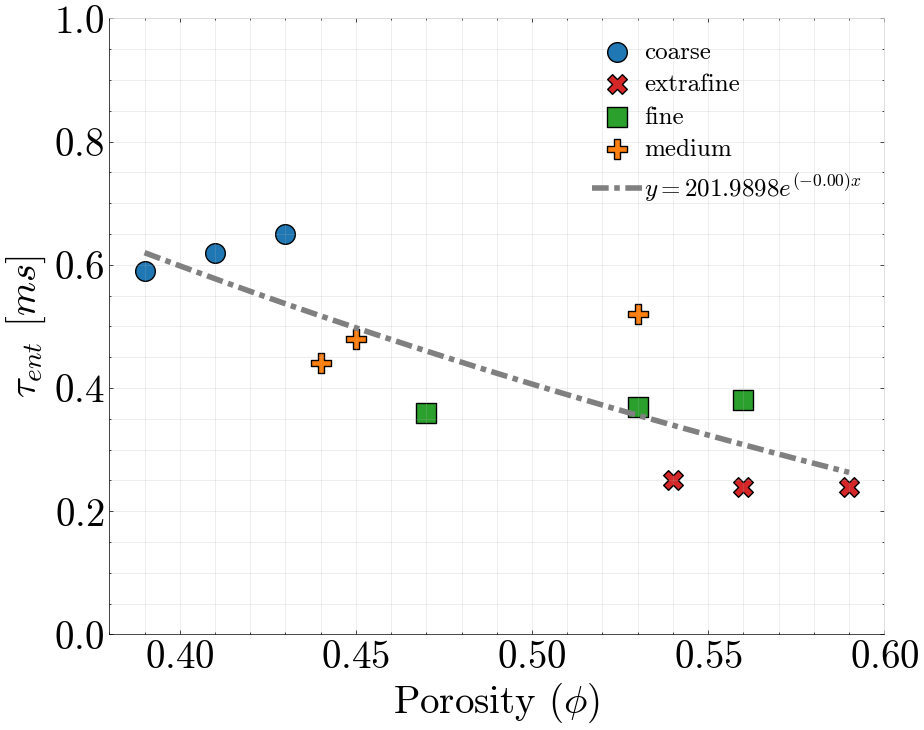

In [138]:
xvar='porosity_estimated'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar = 'tau_ent'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_WS_df.index.str.contains('loose')
filtered_WS_df_noloose = filtered_WS_df[mask]

# x0 = filtered_WS_df[xvar].values
# y0 = filtered_WS_df[yvar].values

x0 = filtered_WS_df_noloose[xvar].values
y0 = filtered_WS_df_noloose[yvar].values

# Correlaciones
pearson_corr, p_value_pearson = stats.pearsonr(x0, y0)
spearman_corr, p_value_spearman = stats.spearmanr(x0, y0)

print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c
    # return a*x + b
    #return a*(x**2) +b*x +c

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y0), 0.1, 1)
params, covariance = curve_fit(exp_func, x0, y0, p0=p0,maxfev=10000)

# a_exp, b_exp = params
# print(f"Exponential fit parameters: a = {a_exp:.3f}, b = {b_exp:.3f}")

# Generate y-values for the exponential fit
x_fit = np.linspace(x0.min(), x0.max(), 100)
y_fit_exp = exp_func(x_fit, *params)

r2_exp = 1 - np.sum((y0 - exp_func(x0, *params))**2) / np.sum((y0 - np.mean(y0))**2)

custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]


fig, (ax0) = plt.subplots(1, 1, figsize=(10, 8))

fontsize=28

groups = filtered_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_df_noloose['granulometry'] == group
    ax0.scatter(filtered_WS_df_noloose.loc[mask, xvar].values, filtered_WS_df_noloose.loc[mask, yvar].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax0.scatter(x0, y0, label=r"$\Lambda$", s=200, color=custom_color2[0], edgecolors='black')
# ax0.plot(X_range, y_pred_quad0, linestyle=linestyles[1], color=custom_color2[0], linewidth=4, label='Fit')
ax0.plot(x_fit, y_fit_exp, linestyle=linestyles[4], color='grey', linewidth=4, label=fr'$y = {a_exp:.4f} e^{{({b_exp:.2f})x}}$')
ax0.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)
ax0.set_ylabel(r"$\tau_{ent}$"  r' [$ms$]', fontsize=fontsize)
# ax0.set_xlabel(f'{xvar}', fontsize=fontsize)  
# ax0.set_ylabel(f'{yvar}', fontsize=fontsize)
ax0.set_ylim(0, 1)
legend =ax0.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')


print(f'Left: {xvar} vs {yvar}')
print(f"R^2: {r2_exp:.3f}")
print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")
print("--------------------------------------------------")

C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\607544336.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_HS_df[samples_abs_df['granul'] == granul_value]
c:\Users\J.Garcia\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\607544336.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = filtered_HS_df[samples_abs_df['granul'] == granul_value]
c:\Users\J.Garcia\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\J.Garcia\AppData\Local\Temp\ipykernel_4812\607544336.py:15: UserWarning: Boolean Series key will be reindexed to match Da

R^2 (tau_vor) coarse=0.94
R^2 (tau_vor) medium=0.02
R^2 (tau_vor) fine=0.86
R^2 (tau_vor) extrafine=0.16
R^2 (tau_ent) coarse=1.0
R^2 (tau_ent) medium=0.83
R^2 (tau_ent) fine=0.96
R^2 (tau_ent) extrafine=0.64


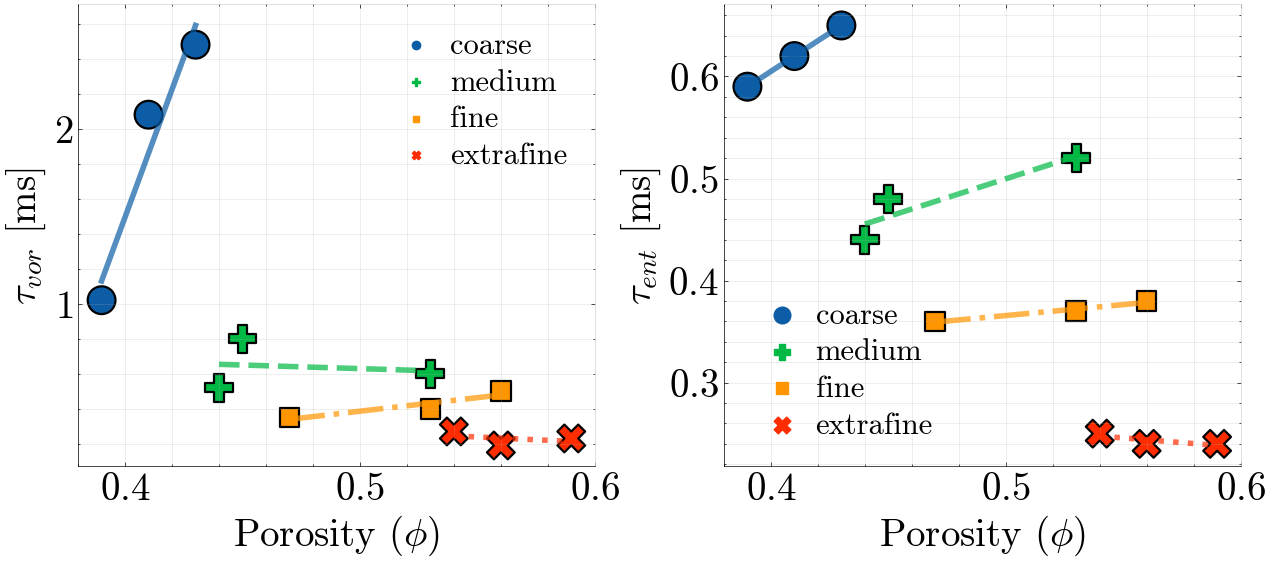

In [200]:
# HOROSHENKOV PARAMETERS PLOT



fontsize=28

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 6))

x0var = 'porosity_estimated'
y0var = 'tau_vor'

sns.scatterplot(data=filtered_HS_df, x=x0var, y=y0var, ax=ax0, hue='granulometry', edgecolor='black', s=400, sizes=(200, 400), hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_HS_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m,b, c):
        
        return m*(x) + c 
        #return m*(x**2) + b*x + c
        # return m + b*np.log10(c*x)
    
    y = subset[y0var]
    x = subset[x0var]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (tau_vor) {granul_value}={r2}')

    xmin = subset[x0var].min()
    xmax = subset[x0var].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = linear_fit(xinterval, *popt)

    ax0.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4,alpha=0.7)


ax0.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax0.set_ylabel(r'$\tau_{vor}$ [ms]', fontsize=fontsize)
# ax0.set_xlabel(f'{x0var}', fontsize=fontsize)
# ax0.set_ylabel(f'{y0var}', fontsize=fontsize)
# ax0.set_xlim([0.3, 0.65])
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')
legend =ax0.legend(fontsize=fontsize-6,  labelspacing=0.3, handletextpad=0.1)
legend.set_frame_on(False)

xvar = 'porosity_estimated'
yvar = 'tau_ent' 

sns.scatterplot(data=filtered_HS_df, x=xvar, y=yvar, ax=ax1, hue='granulometry', edgecolor='black', s=400, sizes=(200, 400), hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granulometry', markers=True, legend=True)

for i, granul_value in enumerate(custom_order_granul):
    subset = filtered_HS_df[samples_abs_df['granul'] == granul_value]
   
    def linear_fit(x, m, b, c):
        
        return m*(x) + b 
        # return m*(x**2) + b*x + c
        

    y = subset[yvar]
    x = subset[xvar]

    popt, pcov = curve_fit(linear_fit, x, y)  # Initial guess for dens_frame

    ypred = linear_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (tau_ent) {granul_value}={r2}')

    xmin = subset[xvar].min()
    xmax = subset[xvar].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    
    yinterval = linear_fit(xinterval, *popt)

    ax1.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, alpha=0.7)

ax1.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)  
ax1.set_ylabel(r'$\tau_{ent}$ [ms]', fontsize=fontsize)
# ax1.set_xlabel(f'{xvar}', fontsize=fontsize)
# ax1.set_ylabel(f'{yvar}', fontsize=fontsize)
ax1.grid(which='both', alpha=0.3)
# ax1.set_xlim([0.3, 0.65])
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')
legend =ax1.legend(fontsize=fontsize-6,  labelspacing=0.3, handletextpad=0.1, markerscale=2)
legend.set_frame_on(False)

plt.subplots_adjust(wspace=0.25)
plt.show()

In [ ]:
# HOROSHENKOV PARAMETERS PLOT



Pearson's r: 0.696, p-value: 1.201e-02
Spearman's rho: 0.643, p-value: 2.400e-02
Exponential fit parameters: a = 2.730, b = 0.184
Pearson's r: 0.662, p-value: 1.891e-02
Spearman's rho: 0.595, p-value: 4.107e-02
Exponential fit parameters: a = 2.730, b = 0.406
Pearson's r: 0.587, p-value: 4.463e-02
Spearman's rho: 0.653, p-value: 2.143e-02
Logaritmic fit parameters: a = 32.019, b = 0.008


c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


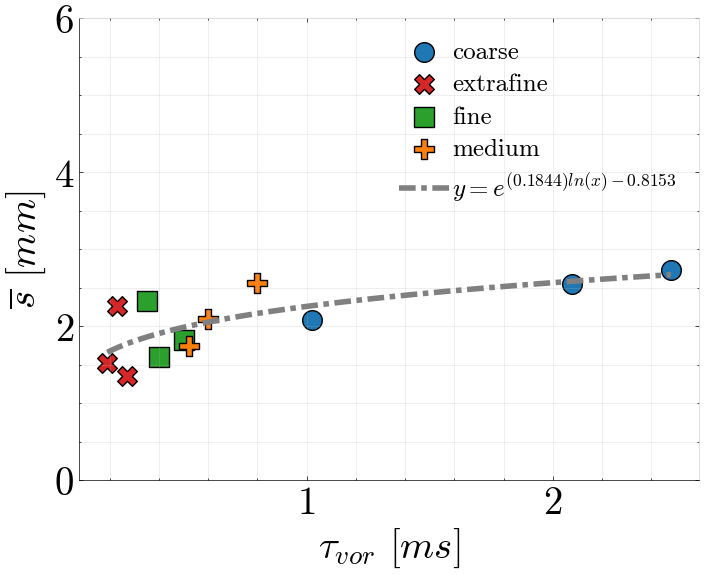

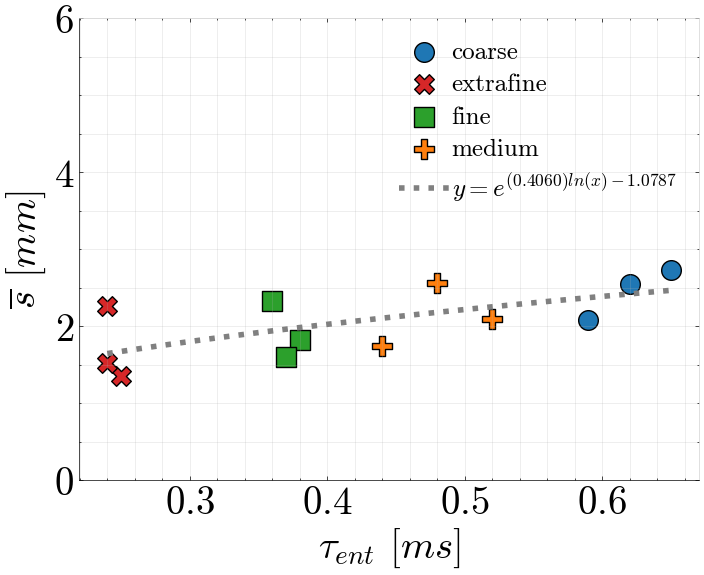

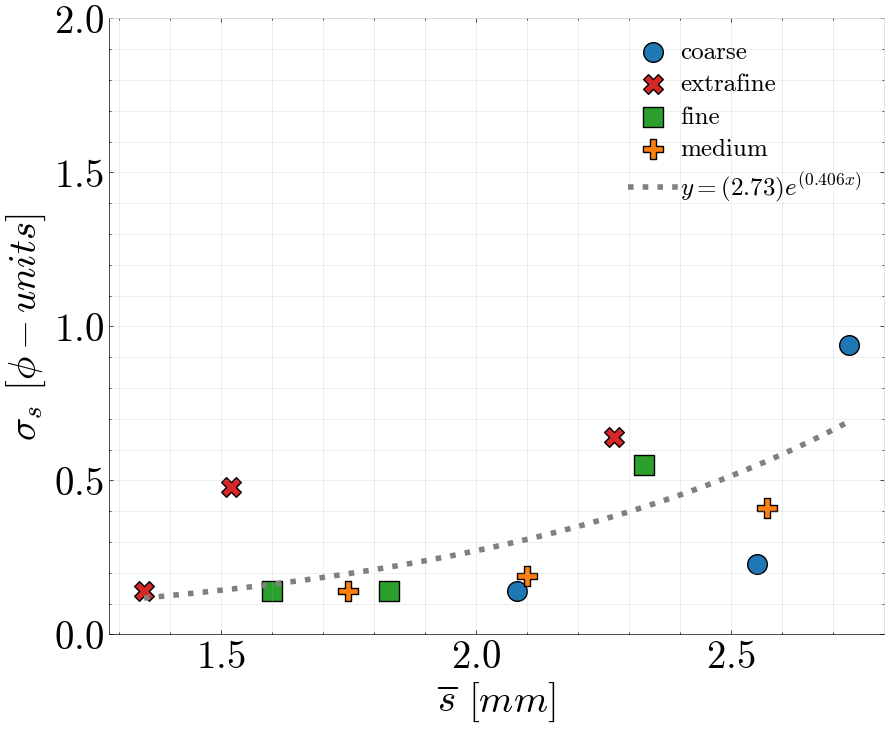

Left: tau_vor vs s_por
R^2: 0.503
Pearson's r: 0.696, p-value: 1.201e-02
Spearman's rho: 0.643, p-value: 2.400e-02
--------------------------------------------------
Left: tau_ent vs s_por
R^2: 0.421
Pearson's r: 0.662, p-value: 1.891e-02
Spearman's rho: 0.595, p-value: 4.107e-02
--------------------------------------------------
Right: s_por vs dev_por
R^2: 0.425
Pearson's r: 0.587, p-value: 4.463e-02
Spearman's rho: 0.653, p-value: 2.143e-02


In [20]:
xvar='tau_vor'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar = 's_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]

# x0 = filtered_HS_df[xvar].values
# y0 = filtered_HS_df[yvar].values


x0 = filtered_HS_df_noloose[xvar].values
y0 = filtered_HS_df_noloose[yvar].values

# Correlaciones
pearson_corr, p_value_pearson = stats.pearsonr(x0, y0)
spearman_corr, p_value_spearman = stats.spearmanr(x0, y0)

print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

# Define the exponential function
def exp_func(x, a, b, c):
    #return a * np.exp(b * x) 
    #return a*x + b
    #return a*(x**2) +b*x +c
    # return a * np.log10(b*x) + c
    return 1 * np.exp(b * np.log(x) - c) # (same form than HS formula) the only difference is the addition of parameter 'b'


# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y0), 0.1, 1)
params, covariance = curve_fit(exp_func, x0, y0, p0=p0,maxfev=10000)

a_exp, b_exp, c_exp = params
print(f"Exponential fit parameters: a = {a_exp:.3f}, b = {b_exp:.3f}")

# Generate y-values for the exponential fit
x_fit = np.linspace(x0.min(), x0.max(), 100)
y_fit_exp = exp_func(x_fit, *params)

r2_exp = 1 - np.sum((y0 - exp_func(x0, *params))**2) / np.sum((y0 - np.mean(y0))**2)



#--------------------------------------------------------------------------------------------------------------------------------------

xvar1='tau_ent'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar1 = 's_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]

# x1 = filtered_df[xvar1].values
# y1 = filtered_df[yvar1].values

x1 = filtered_HS_df_noloose[xvar1].values
y1 = filtered_HS_df_noloose[yvar1].values


# Correlaciones
pearson_corr1, p_value_pearson1 = stats.pearsonr(x1, y1)
spearman_corr1, p_value_spearman1 = stats.spearmanr(x1, y1)

print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")


# Define the exponential function
def exp_func(x, a, b, c):
    # return a * np.exp(b * x) 
    #return a * np.log10(b*x) + c
    # return a*x + b
    #return a*(x**2) + b*x + c
    return 1 * np.exp(b * np.log(x) - c) # (same form than HS formula) the only difference is the addition of parameter 'b'

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y1), 0.01, 0)
params1, covariance1 = curve_fit(exp_func, x1, y1, p0=p0, maxfev=10000)

a_exp1, b_exp1, c_exp1 = params1
print(f"Exponential fit parameters: a = {a_exp1:.3f}, b = {b_exp1:.3f}")

# Generate y-values for the exponential fit
x_fit1 = np.linspace(x1.min(), x1.max(), 100)
y_fit_exp1 = exp_func(x_fit1, *params1)

r2_exp1 = 1 - np.sum((y1 - exp_func(x1, *params1))**2) / np.sum((y1 - np.mean(y1))**2)


# -------------------------------------------------------------------------------


xvar2='s_por'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar2 = 'dev_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]

# x1 = filtered_df[xvar2].values
# y1 = filtered_df[yvar2].values

x2 = filtered_HS_df_noloose[xvar2].values
y2 = filtered_HS_df_noloose[yvar2].values


# Correlaciones
pearson_corr2, p_value_pearson2 = stats.pearsonr(x2, y2)
spearman_corr2, p_value_spearman2 = stats.spearmanr(x2, y2)

print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

# Preparar los datos para modelos
X = x2.reshape(-1, 1)
y = y2

# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x)
    #return a * np.log10(b*x) + c
    #return 1 * np.exp(b * np.log(x) - c) # (same form than HS formula) the only difference is the addition of parameter 'b'

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y2), 0.1, 0)
params2, covariance2 = curve_fit(exp_func, x2, y2, p0=p0, maxfev=10000)

# a_exp2, b_exp2 = params2
print(f"Logaritmic fit parameters: a = {a_exp2:.3f}, b = {b_exp2:.3f}")

# Generate y-values for the exponential fit
x_fit2 = np.linspace(x2.min(), x2.max(), 100)
y_fit_exp2 = exp_func(x_fit2, *params2)

r2_exp2 = 1 - np.sum((y2 - exp_func(x2, *params2))**2) / np.sum((y2 - np.mean(y2))**2)


# Plot ---------------------------------------------------------------------


custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]

fig, (ax0) = plt.subplots(1, 1, figsize=(8, 6))

fontsize=28

groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax0.scatter(filtered_HS_df_noloose.loc[mask, xvar].values, filtered_HS_df_noloose.loc[mask, yvar].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax0.scatter(x0, y0, label=r"$\Lambda$", s=200, color=custom_color2[0], edgecolors='black')
# ax0.plot(X_range, y_pred_quad0, linestyle=linestyles[1], color=custom_color2[0], linewidth=4, label='Fit')
ax0.plot(x_fit, y_fit_exp, linestyle=linestyles[4], color='grey', linewidth=4, label=fr'$y = e^{{({params[1]:.4f})ln(x) {params[2]:.4f}}}$')
ax0.set_ylabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax0.set_xlabel(r"$\tau_{vor}$"  r' [$ms$]', fontsize=fontsize)
# ax0.set_xlabel(f'{xvar}', fontsize=fontsize)  
# ax0.set_ylabel(f'{yvar}', fontsize=fontsize)
ax0.set_ylim(0, 6)
legend =ax0.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
# ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax1.scatter(filtered_HS_df_noloose.loc[mask, xvar1].values, filtered_HS_df_noloose.loc[mask, yvar1].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax1.scatter(x1, y1, label=r"$\Lambda^{'}$", s=200, marker='^', color=custom_color2[1], edgecolors='black')
# ax1.plot(X_range1, y_pred_quad1,linestyle=linestyles[2], color=custom_color2[1], linewidth=4, label= 'Fit')
ax1.plot(x_fit1, y_fit_exp1, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = e^{{({params1[1]:.4f})ln(x) {params1[2]:.4f}}}$')
# ax1.set_ylabel(r"$\Lambda^{'}$"  r" [$\mu m$]", fontsize=fontsize)
# ax1.set_xlabel(r'$\overline{s}$ [mm]', fontsize=fontsize)
ax1.set_ylabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax1.set_xlabel(r"$\tau_{ent}$"  r' [$ms$]', fontsize=fontsize)
ax1.set_ylim(0, 6)
# ax1.set_xlabel(f'{xvar1}', fontsize=fontsize)  
# ax1.set_ylabel(f'{yvar1}', fontsize=fontsize)
legend =ax1.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax1.grid(which='both', alpha=0.3)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.25)

fig, (ax2) = plt.subplots(1, 1, figsize=(10, 8))

groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax2.scatter(filtered_HS_df_noloose.loc[mask, xvar2].values, filtered_HS_df_noloose.loc[mask, yvar2].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax2.scatter(x2, y2, label='Data', s=200, color=custom_color2[0], edgecolors='black')
# ax2.plot(X_range2, y_pred_quad2, linestyle=linestyles[2], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.1f})x^2 {b_exp1:.4f}x + {c_fit1:.1f}$')
ax2.plot(x_fit2, y_fit_exp2, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.2f}) e^{{({b_exp1:.3f}x)}} $')
ax2.set_xlabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax2.set_ylabel(r"$\sigma_{s}$"  r' [$\phi -units$]', fontsize=fontsize)
# ax2.set_xlabel(f'{xvar2}', fontsize=fontsize)  
# ax2.set_ylabel(f'{yvar2}', fontsize=fontsize)
ax2.set_ylim(0, 2)
legend =ax2.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax2.grid(which='both', alpha=0.3)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.4)
plt.show()

# R^2 del modelo cuadrático
# r2_quad = model_quad.rsquared
# r2_quad1 = model_quad1.rsquared
# r2_quad3 = model_quad2.rsquared

print(f'Left: {xvar} vs {yvar}')
# print(f"R^2: {r2_quad:.3f}")
print(f"R^2: {r2_exp:.3f}")
print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")
print("--------------------------------------------------")

print(f'Left: {xvar1} vs {yvar1}')
# print(f"R^2: {r2_quad1:.3f}")
print(f"R^2: {r2_exp1:.3f}")
print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")
print("--------------------------------------------------")

print(f'Right: {xvar2} vs {yvar2}')
# print(f"R^2: {r2_quad3:.3f}")
print(f"R^2: {r2_exp2:.3f}")
print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

Pearson's r: 0.545, p-value: 6.697e-02
Spearman's rho: 0.531, p-value: 7.536e-02
Exponential fit parameters: a = 2.730, b = 0.127
Pearson's r: 0.652, p-value: 2.160e-02
Spearman's rho: 0.664, p-value: 1.845e-02
Exponential fit parameters: a = 2.730, b = 1.440


c:\Users\joaqu\anaconda3\envs\YMenv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


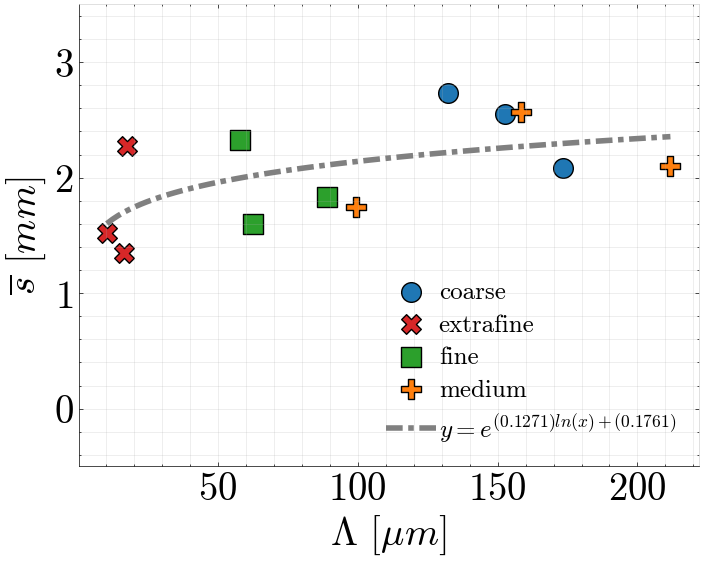

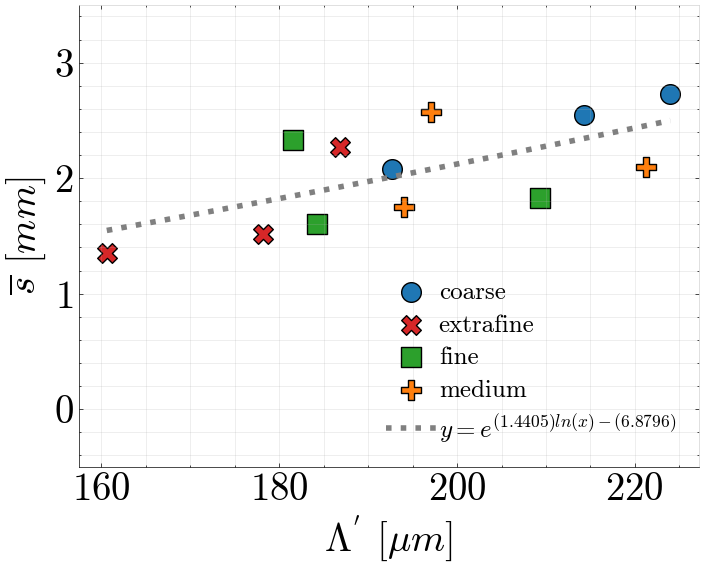

Left: lamb vs s_por
R^2: 0.326
Pearson's r: 0.545, p-value: 6.697e-02
Spearman's rho: 0.531, p-value: 7.536e-02
--------------------------------------------------
Left: lamb_prima vs s_por
R^2: 0.420
Pearson's r: 0.652, p-value: 2.160e-02
Spearman's rho: 0.664, p-value: 1.845e-02
--------------------------------------------------


In [21]:
xvar='lamb'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar = 's_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]

# x0 = filtered_HS_df[xvar].values
# y0 = filtered_HS_df[yvar].values

x0 = filtered_HS_df_noloose[xvar].values
y0 = filtered_HS_df_noloose[yvar].values

# Correlaciones
pearson_corr, p_value_pearson = stats.pearsonr(x0, y0)
spearman_corr, p_value_spearman = stats.spearmanr(x0, y0)

print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")

# Define the exponential function
def exp_func(x, a, b, c):
    #return a * np.exp(b * x) + c
    #return a*x + b
    #return a*(x**2) +b*x +c
    # return a * np.log(b*x) + c  # (this one)
    return 1 * np.exp(b * np.log(x) + c) # (same form than HS formula) the only difference is the addition of parameter 'b'
    #return a*x + b

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y0), 0.1, 1)
params, covariance = curve_fit(exp_func, x0, y0, p0=p0,maxfev=10000)

a_exp, b_exp, c_exp = params
print(f"Exponential fit parameters: a = {a_exp:.3f}, b = {b_exp:.3f}")

# Generate y-values for the exponential fit
x_fit = np.linspace(x0.min(), x0.max(), 100)
y_fit_exp = exp_func(x_fit, *params)

r2_exp = 1 - np.sum((y0 - exp_func(x0, *params))**2) / np.sum((y0 - np.mean(y0))**2)



#--------------------------------------------------------------------------------------------------------------------------------------

xvar1='lamb_prima'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar1 = 's_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]

# x1 = filtered_df[xvar1].values
# y1 = filtered_df[yvar1].values

x1 = filtered_HS_df_noloose[xvar1].values
y1 = filtered_HS_df_noloose[yvar1].values


# Correlaciones
pearson_corr1, p_value_pearson1 = stats.pearsonr(x1, y1)
spearman_corr1, p_value_spearman1 = stats.spearmanr(x1, y1)

print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")


# Define the exponential function
def exp_func(x, a, b, c):
    # return a * np.exp(b * x) + c
    # return a * np.log(b*x) + c #(this one)
    #return a*x + b
    return 1 * np.exp(b * np.log(x) - c)   # (same form than HS formula) the only difference is the addition of parameter 'b'

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y1), 0.01, 0)
params1, covariance1 = curve_fit(exp_func, x1, y1, p0=p0, maxfev=10000)

a_exp1, b_exp1, c_exp1 = params1
print(f"Exponential fit parameters: a = {a_exp1:.3f}, b = {b_exp1:.3f}")

# Generate y-values for the exponential fit
x_fit1 = np.linspace(x1.min(), x1.max(), 100)
y_fit_exp1 = exp_func(x_fit1, *params1)

r2_exp1 = 1 - np.sum((y1 - exp_func(x1, *params1))**2) / np.sum((y1 - np.mean(y1))**2)



# Plot ---------------------------------------------------------------------


custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]


fig, (ax0) = plt.subplots(1, 1, figsize=(8, 6))

fontsize=28

groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax0.scatter(filtered_HS_df_noloose.loc[mask, xvar].values, filtered_HS_df_noloose.loc[mask, yvar].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax0.scatter(x0, y0, label=r"$\Lambda$", s=200, color=custom_color2[0], edgecolors='black')
# ax0.plot(X_range, y_pred_quad0, linestyle=linestyles[1], color=custom_color2[0], linewidth=4, label='Fit')
ax0.plot(x_fit, y_fit_exp, linestyle=linestyles[4], color='grey', linewidth=4, label=fr'$y = e^{{({params[1]:.4f})ln(x) + ({params[2]:.4f})}}$')
ax0.set_ylabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax0.set_xlabel(r"$\Lambda$"  r' [$\mu m$]', fontsize=fontsize)
# ax0.set_xlabel(f'{xvar}', fontsize=fontsize)  
# ax0.set_ylabel(f'{yvar}', fontsize=fontsize)
# ax0.set_xscale('log')
ax0.set_ylim(-0.5, 3.5)
legend =ax0.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='lower right')
legend.set_frame_on(False)
ax0.grid(which='both', alpha=0.3)
ax0.tick_params(axis='both', labelsize=fontsize)
ax0.spines['right'].set_color('lightgrey')
ax0.spines['top'].set_color('lightgrey')

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

# ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis
groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax1.scatter(filtered_HS_df_noloose.loc[mask, xvar1].values, filtered_HS_df_noloose.loc[mask, yvar1].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax1.scatter(x1, y1, label=r"$\Lambda^{'}$", s=200, marker='^', color=custom_color2[1], edgecolors='black')
# ax1.plot(X_range1, y_pred_quad1,linestyle=linestyles[2], color=custom_color2[1], linewidth=4, label= 'Fit')
ax1.plot(x_fit1, y_fit_exp1, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = e^{{({params1[1]:.4f})ln(x) - ({params1[2]:.4f})}}$')
# ax1.set_ylabel(r"$\Lambda^{'}$"  r" [$\mu m$]", fontsize=fontsize)
# ax1.set_xlabel(r'$\overline{s}$ [mm]', fontsize=fontsize)
ax1.set_ylabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax1.set_xlabel(r"$\Lambda^{'}$"  r' [$\mu m$]', fontsize=fontsize)
ax1.set_ylim(-0.5, 3.5)
# ax1.set_xscale('log')
# ax1.set_xlabel(f'{xvar1}', fontsize=fontsize)  
# ax1.set_ylabel(f'{yvar1}', fontsize=fontsize)
legend =ax1.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='lower right')
legend.set_frame_on(False)
ax1.grid(which='both', alpha=0.3)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.spines['right'].set_color('lightgrey')
ax1.spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.25)
plt.show()


print(f'Left: {xvar} vs {yvar}')
# print(f"R^2: {r2_quad:.3f}")
print(f"R^2: {r2_exp:.3f}")
print(f"Pearson's r: {pearson_corr:.3f}, p-value: {p_value_pearson:.3e}")
print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {p_value_spearman:.3e}")
print("--------------------------------------------------")

print(f'Left: {xvar1} vs {yvar1}')
# print(f"R^2: {r2_quad1:.3f}")
print(f"R^2: {r2_exp1:.3f}")
print(f"Pearson's r: {pearson_corr1:.3f}, p-value: {p_value_pearson1:.3e}")
print(f"Spearman's rho: {spearman_corr1:.3f}, p-value: {p_value_spearman1:.3e}")
print("--------------------------------------------------")



Pearson's r: -0.530, p-value: 7.604e-02
Spearman's rho: -0.467, p-value: 1.262e-01
Logaritmic fit parameters: a = 4.793, b = -1.734


c:\Users\J.Garcia\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


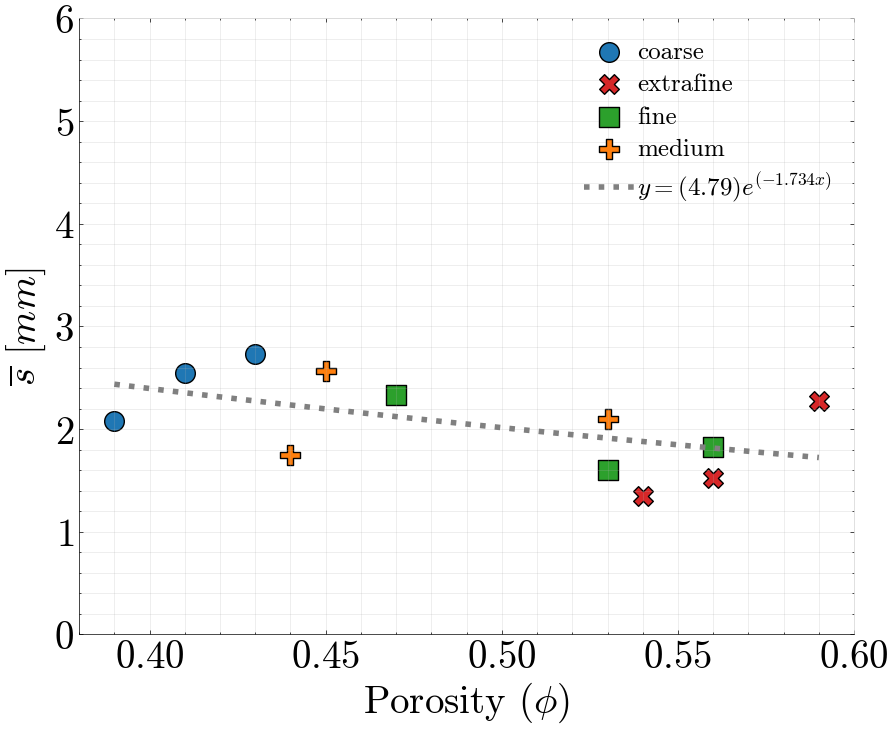

Right: porosity_estimated vs s_por
R^2: 0.285
Pearson's r: -0.530, p-value: 7.604e-02
Spearman's rho: -0.467, p-value: 1.262e-01


In [221]:
xvar2='porosity_estimated'  # 'lamb' or 'lamb_prima' or 'norm_lamb'
yvar2 = 's_por'  # 'lamb' 

# Optional drop the loose samples
mask = ~filtered_HS_df.index.str.contains('loose')
filtered_HS_df_noloose = filtered_HS_df[mask]


x2 = filtered_HS_df_noloose[xvar2].values
y2 = filtered_HS_df_noloose[yvar2].values


# Correlaciones
pearson_corr2, p_value_pearson2 = stats.pearsonr(x2, y2)
spearman_corr2, p_value_spearman2 = stats.spearmanr(x2, y2)

print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

# Preparar los datos para modelos
X = x2.reshape(-1, 1)
y = y2

# Define the exponential function
def exp_func(x, a, b, c):
    return a * np.exp(b * x)
    #return a * np.log10(b*x) + c
    #return 1 * np.exp(b * np.log(x) - c) # (same form than HS formula) the only difference is the addition of parameter 'b'

# Fit the exponential model
# Use your x2 and y2 data
p0=(max(y2), 0.1, 0)
params2, covariance2 = curve_fit(exp_func, x2, y2, p0=p0, maxfev=10000)

a_exp2, b_exp2,c_exp2 = params2
print(f"Logaritmic fit parameters: a = {a_exp2:.3f}, b = {b_exp2:.3f}")

# Generate y-values for the exponential fit
x_fit2 = np.linspace(x2.min(), x2.max(), 100)
y_fit_exp2 = exp_func(x_fit2, *params2)

r2_exp2 = 1 - np.sum((y2 - exp_func(x2, *params2))**2) / np.sum((y2 - np.mean(y2))**2)


# Plot ---------------------------------------------------------------------


custom_color2 = [
    '#1f77b4',  # blue
    '#d62728',  # red
    '#2ca02c',  # green
    '#ff7f0e',  # orange
    '#9467bd'   # purple
]
linewidth = 3

markers = ['o', 'X', 's', 'P']
# Define unique linestyles for each curve
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 10))]


fig, (ax2) = plt.subplots(1, 1, figsize=(10, 8))

groups = filtered_HS_df_noloose['granulometry'].unique()
for i, group in enumerate(groups):
    mask = filtered_HS_df_noloose['granulometry'] == group
    ax2.scatter(filtered_HS_df_noloose.loc[mask, xvar2].values, filtered_HS_df_noloose.loc[mask, yvar2].values, label=group, color=custom_color2[i], s=200, edgecolors='black', marker=markers[i])
# ax2.scatter(x2, y2, label='Data', s=200, color=custom_color2[0], edgecolors='black')
# ax2.plot(X_range2, y_pred_quad2, linestyle=linestyles[2], color='grey', linewidth=4, label=fr'$y = ({a_exp1:.1f})x^2 {b_exp1:.4f}x + {c_fit1:.1f}$')
ax2.plot(x_fit2, y_fit_exp2, linestyle=linestyles[3], color='grey', linewidth=4, label=fr'$y = ({a_exp2:.2f}) e^{{({b_exp2:.3f}x)}} $')
ax2.set_ylabel(r"$\overline{s}$"  r' [$mm$]', fontsize=fontsize)
ax2.set_xlabel(r'Porosity ($\phi$)', fontsize=fontsize)
# ax2.set_xlabel(f'{xvar2}', fontsize=fontsize)  
# ax2.set_ylabel(f'{yvar2}', fontsize=fontsize)
# ax2.set_ylim(150, 275)
legend =ax2.legend(fontsize=fontsize-10, labelspacing=0.4,  handletextpad=0.1, loc='best')
legend.set_frame_on(False)
ax2.grid(which='both', alpha=0.3)
ax2.tick_params(axis='both', labelsize=fontsize)
ax2.spines['right'].set_color('lightgrey')
ax2.spines['top'].set_color('lightgrey')
ax2.set_ylim([0, 6])

plt.subplots_adjust(wspace=0.4)
plt.show()


print(f'Right: {xvar2} vs {yvar2}')
# print(f"R^2: {r2_quad3:.3f}")
print(f"R^2: {r2_exp2:.3f}")
print(f"Pearson's r: {pearson_corr2:.3f}, p-value: {p_value_pearson2:.3e}")
print(f"Spearman's rho: {spearman_corr2:.3f}, p-value: {p_value_spearman2:.3e}")

                 model   phi  alpha_inf    sigma    lamb  lamb_prima      MSE  \
sample_name                                                                     
YM2-coarse-d1      JCA  0.39       1.44   2867.0  132.10       224.0  0.00408   
YM2-coarse-d1     JCAL  0.44       1.44   2867.0    2.50        35.7  0.00217   
YM2-coarse-d1       HS  0.39       1.44      NaN     NaN         NaN  0.00636   
YM2-coarse-d1       WS   NaN        NaN      NaN     NaN         NaN  0.00148   
YM2-coarse-d2      JCA  0.38       1.69   4568.0  152.75       214.3  0.00241   
YM2-coarse-d2     JCAL  0.44       1.69   3046.0    3.00       191.7  0.00114   
YM2-coarse-d2       HS  0.37       1.69      NaN     NaN         NaN  0.00325   
YM2-coarse-d2       WS   NaN        NaN      NaN     NaN         NaN  0.00231   
YM2-coarse-d3      JCA  0.43       1.75   6620.0  173.40       192.7  0.00153   
YM2-coarse-d3     JCAL  0.43       1.74   6620.0    1.50       551.3  0.00029   
YM2-coarse-d3       HS  0.43

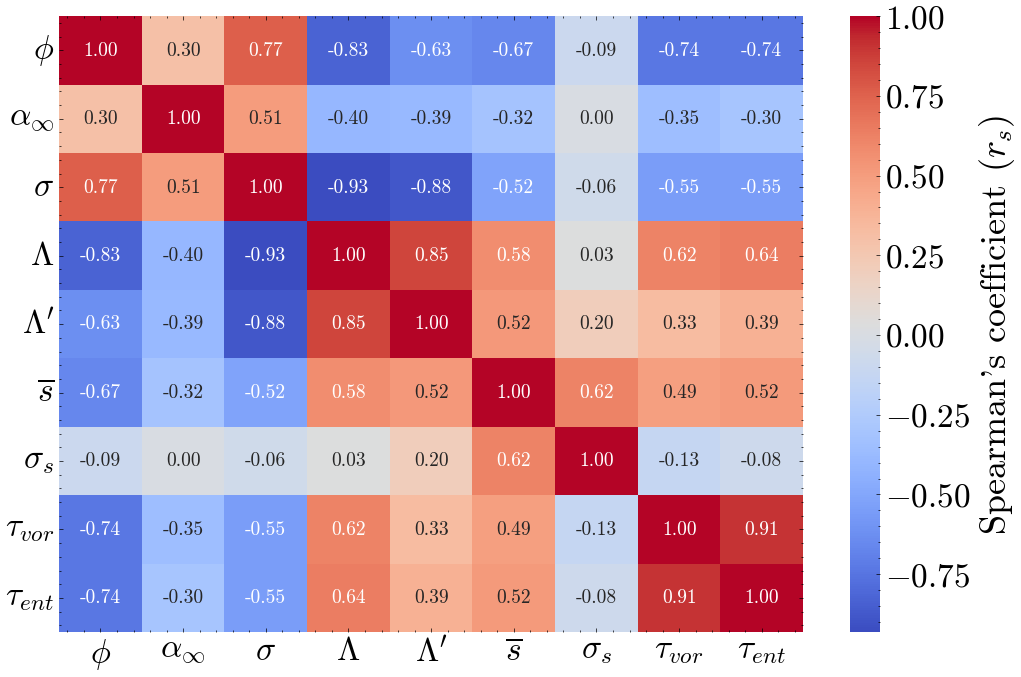

0.616674357791109 0.00010282394382370735


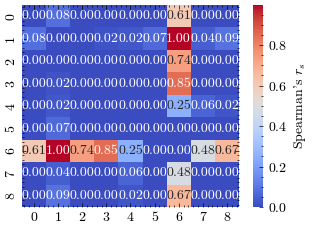

In [181]:

df = pd.read_csv('inversion_parameters_all_samples_diffevol.csv')
df = df[['sample_name','phi', 'model','alpha_inf', 'sigma', 'lamb', 'lamb_prima', 's_por', 'dev_por', 'tau_vor', 'tau_ent']]
df = df.set_index('sample_name')
mask = ~df.index.str.contains('loose')
df = df[mask]
print(df_parameters.head(20))
df.reset_index(drop=True, inplace=True)
df.drop(df[df['model']=='JCAL'].index, inplace=True)

df.head()
df.drop('model', axis=1, inplace=True)

# Fill or drop NaN
df.fillna(method='ffill', inplace=True)  # Forward fill
df.dropna(inplace=True)

# df['tau_vor'][0:2]=2.4
# df['tau_ent'][0:2]=2.4

corr_matrix = df.corr()

# Display the correlation matrix
#print(corr_matrix)

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

corr_matrix2 = df.corr(method='spearman')
corr_matrix2, p_value_matrix2 = stats.spearmanr(df)

# Display the correlation matrix
#print(corr_matrix2)

fontsize=24

plt.figure(figsize=(12, 8))
xticks = [r'$\phi$', r'$\alpha_{\infty}$', r'$\sigma$', r'$\Lambda$', r"$\Lambda'$", r'$\overline{s}$', r'$\sigma_s$', r'$\tau_{vor}$', r'$\tau_{ent}$']
yticks = [r'$\phi$', r'$\alpha_{\infty}$', r'$\sigma$', r'$\Lambda$', r"$\Lambda'$", r'$\overline{s}$', r'$\sigma_s$', r'$\tau_{vor}$', r'$\tau_{ent}$']

ax = sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': r"Spearman's $r_s$"}, annot_kws={"size": 14})
ax.set_xticklabels(xticks, rotation=0, ha='center', fontsize=fontsize)
ax.set_yticklabels(yticks, rotation=0, ha='right', fontsize=fontsize)
cbar = ax.collections[0].colorbar
cbar.set_label(r"Spearman's coefficient ($r_s$)", fontsize=fontsize+2)
cbar.ax.tick_params(labelsize=fontsize)
plt.show()

ax1 = sns.heatmap(p_value_matrix2, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': r"Spearman's $r_s$"})



# Extract the correlation between A and B:
# corr_value_from_matrix = corr_matrix2.loc['tau_vor', 'lamb']


# Compute Spearman correlation directly:
spearman_corr1, p_value_spearman1 = stats.spearmanr(df['tau_vor'], df['lamb'])
print(spearman_corr1, p_value_spearman1)


In [167]:
df.head(20)


sample_name   phi           model  alpha_inf    sigma   lamb  \
0      YM2-coarse-d1  0.39             JCA       1.44   2867.0  132.1   
1      YM2-coarse-d1  0.44            JCAL       1.44   2867.0    2.5   
2      YM2-coarse-d1  0.39  Horosh. et al.       1.44      NaN    NaN   
3      YM2-coarse-d1   NaN   Wilson et al.        NaN      NaN    NaN   
4      YM2-coarse-d2  0.38             JCA       1.69   4568.0  239.4   
5      YM2-coarse-d2  0.44            JCAL       1.69   3046.0    3.0   
6      YM2-coarse-d2  0.37  Horosh. et al.       1.69      NaN    NaN   
7      YM2-coarse-d2   NaN   Wilson et al.        NaN      NaN    NaN   
8      YM2-coarse-d3  0.43             JCA       1.75   6620.0  173.4   
9      YM2-coarse-d3  0.43            JCAL       1.74   6620.0    1.5   
10     YM2-coarse-d3  0.43  Horosh. et al.       1.91      NaN    NaN   
11     YM2-coarse-d3   NaN   Wilson et al.        NaN      NaN    NaN   
12  YM2-coarse-loose  0.61             JCA       1.33   2326.0  258.1   
13  YM2-coarse-loose  0.62            JCAL       1.24   2326.0    2.5   
14  YM2-coarse-loose  0.62  Horosh. et al.       1.38      NaN    NaN   
15  YM2-coarse-loose   NaN   Wilson et al.        NaN      NaN    NaN   
16  YM2-extrafine-d1  0.59             JCA       1.00  35243.0   16.2   
17  YM2-extrafine-d1  0.59            JCAL       4.59  52865.0    2.8   
18  YM2-extrafine-d1  0.59  Horosh. et al.       3.94      NaN    NaN   
19  YM2-extrafine-d1   NaN   Wilson et al.        NaN      NaN    NaN   

    lamb_prima  s_por  dev_por  tau_vor  tau_ent  
0        282.7    NaN      NaN      NaN      NaN  
1         35.7    NaN      NaN      NaN      NaN  
2          NaN  12.73     0.94      NaN      NaN  
3          NaN    NaN      NaN     2.48     0.65  
4        214.3    NaN      NaN      NaN      NaN  
5        191.7    NaN      NaN      NaN      NaN  
6          NaN   2.55     0.23      NaN      NaN  
7          NaN    NaN      NaN     2.08     0.62  
8        192.7    NaN      NaN      NaN      NaN  
9        551.3    NaN      NaN      NaN      NaN  
10         NaN   2.08     0.14      NaN      NaN  
11         NaN    NaN      NaN     1.02     0.59  
12       258.1    NaN      NaN      NaN      NaN  
13       143.2    NaN      NaN      NaN      NaN  
14         NaN   2.85     0.14      NaN      NaN  
15         NaN    NaN      NaN     1.79     0.89  
16       160.6    NaN      NaN      NaN      NaN  
17      1000.0    NaN      NaN      NaN      NaN  
18         NaN   1.35     0.14      NaN      NaN  
19         NaN    NaN      NaN     0.27     0.25

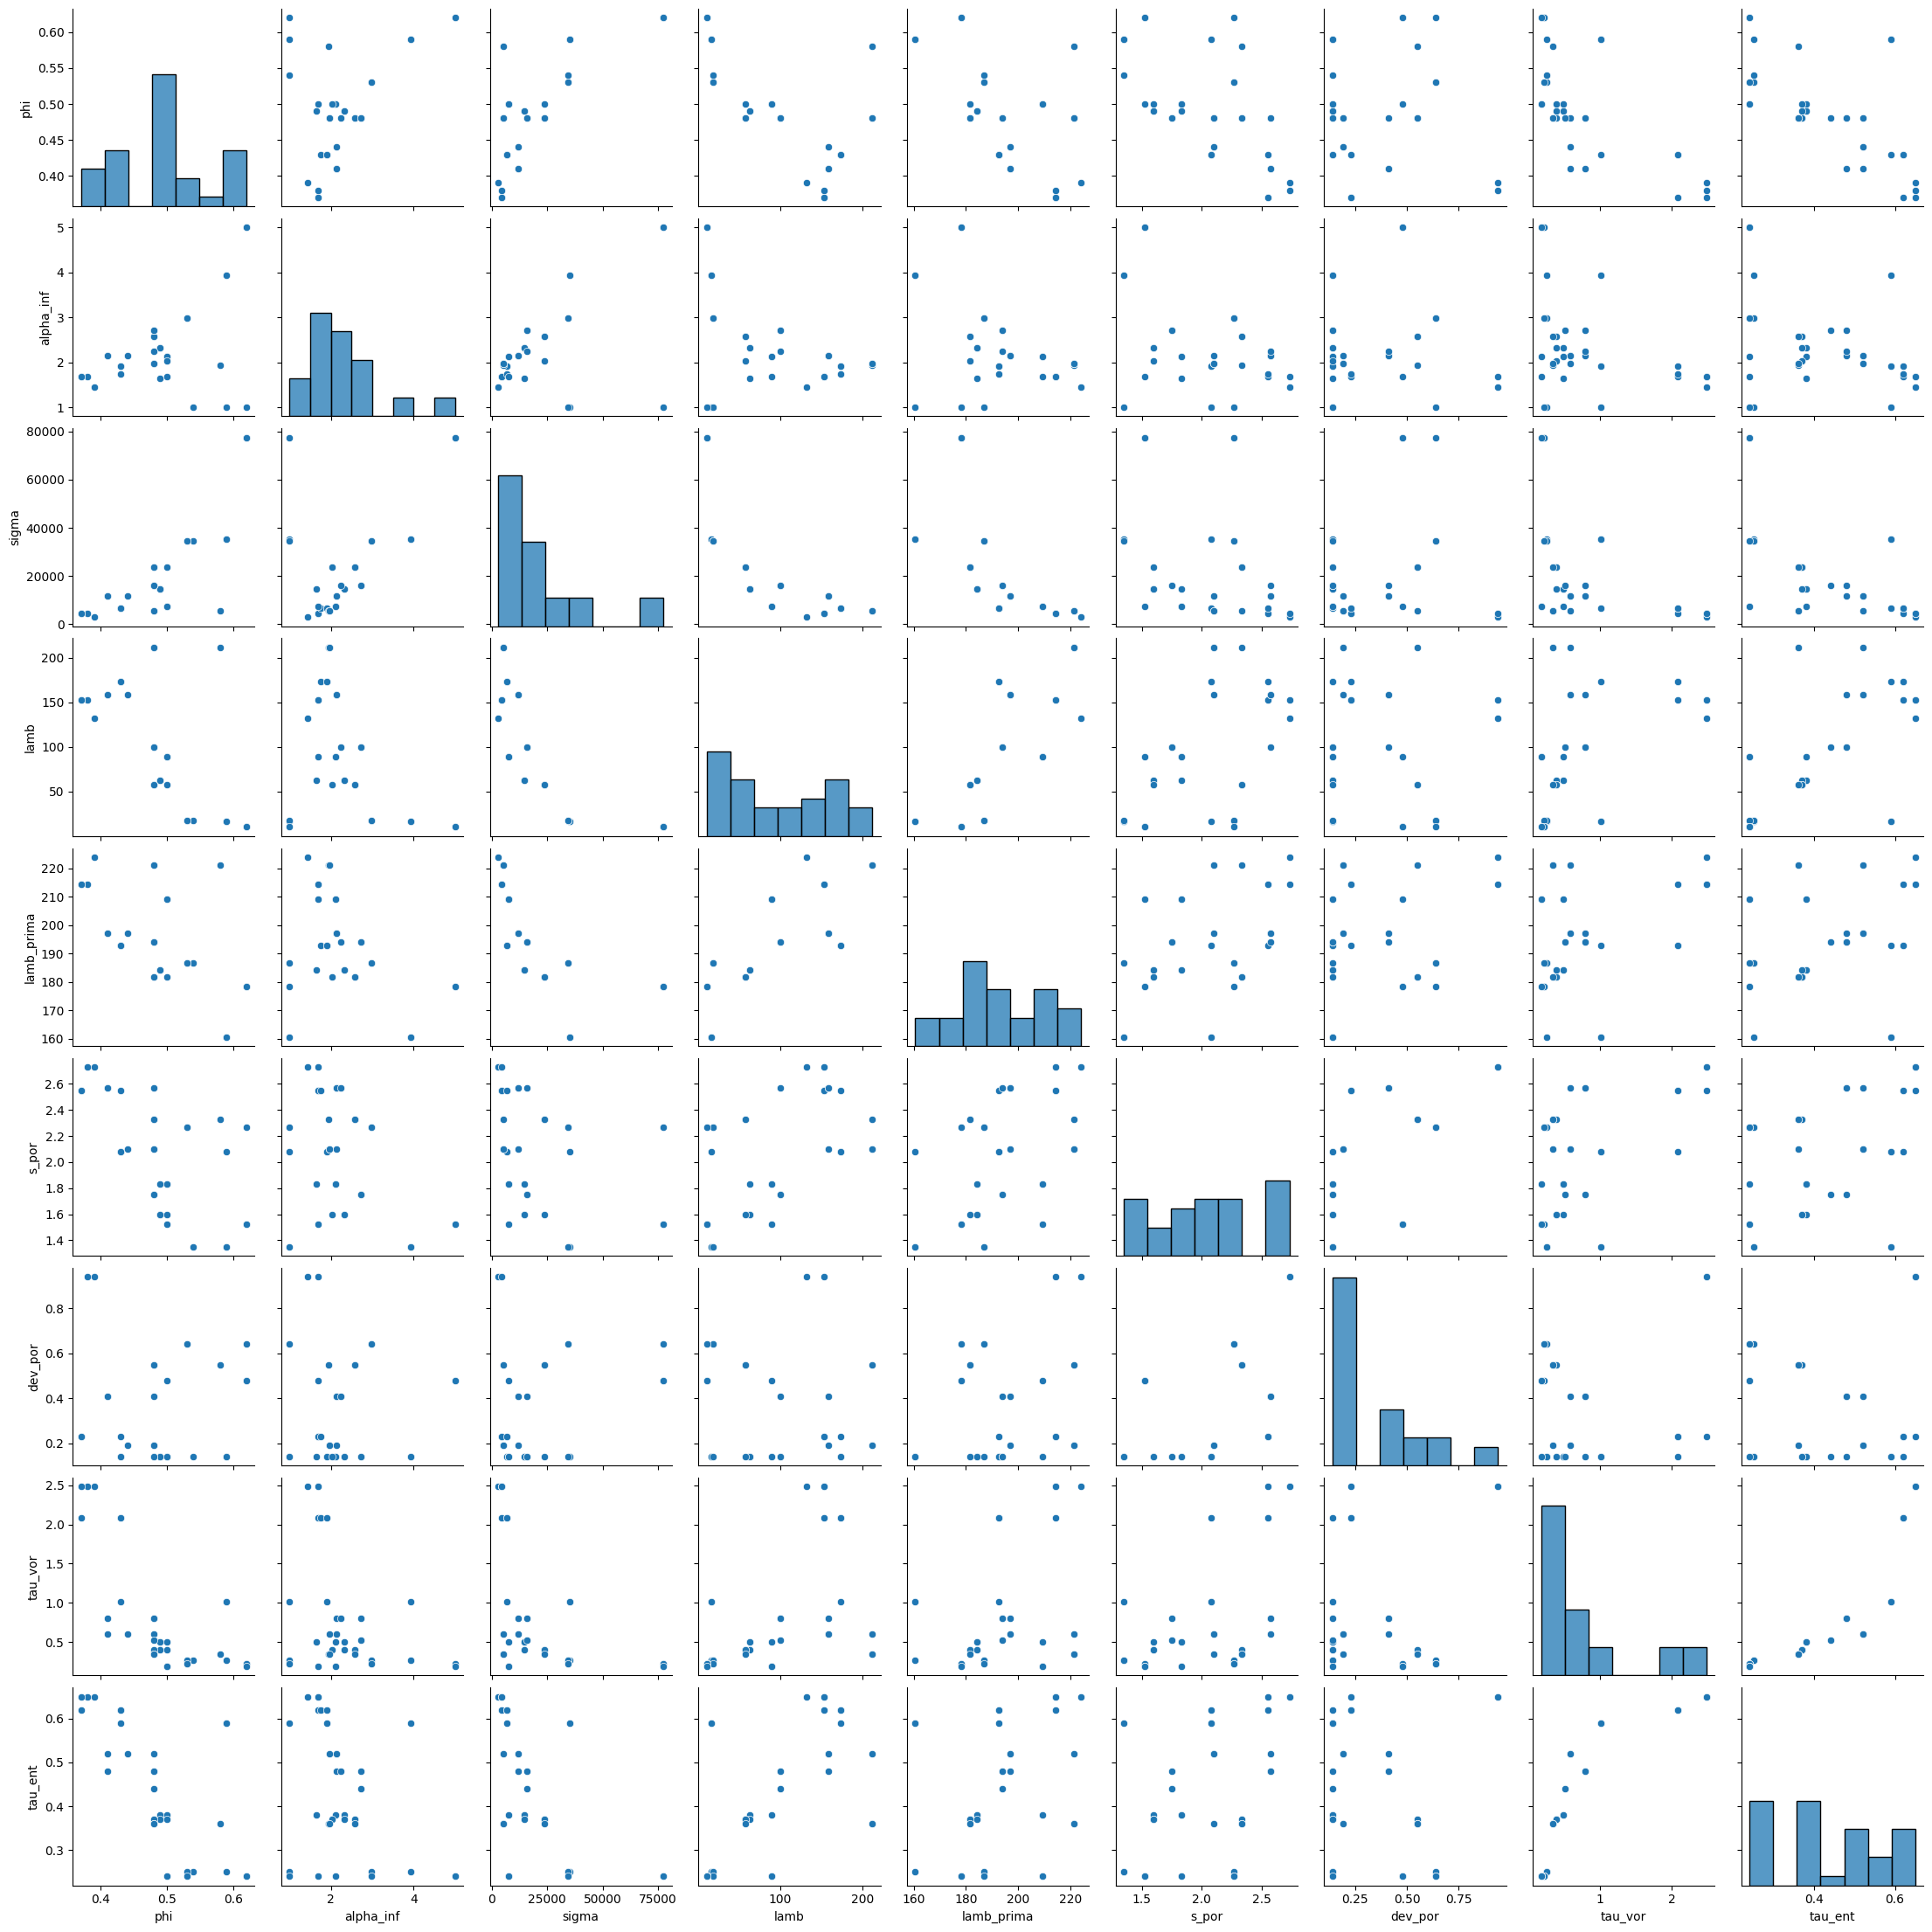

In [804]:
# For a subset of variables
df_index = df.reset_index(drop=False)
variables = ['phi', 'alpha_inf', 'sigma', 'lamb', 'lamb_prima', 's_por', 'dev_por', 'tau_vor', 'tau_ent']
sns.pairplot(df_index[variables])
plt.show()

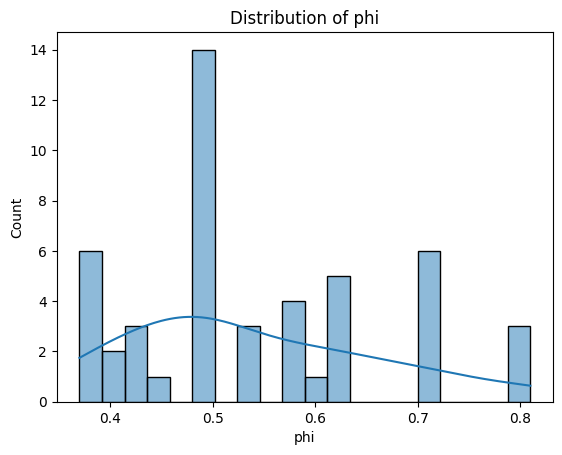

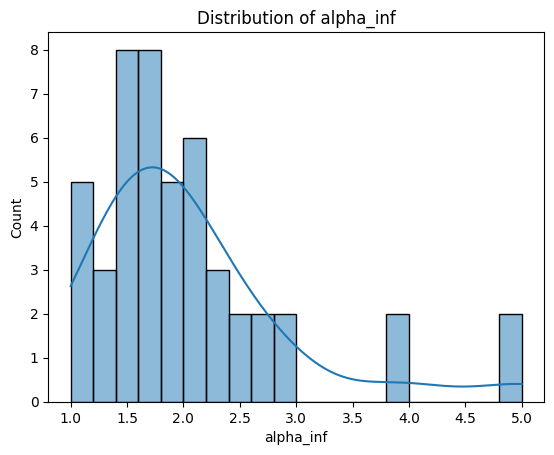

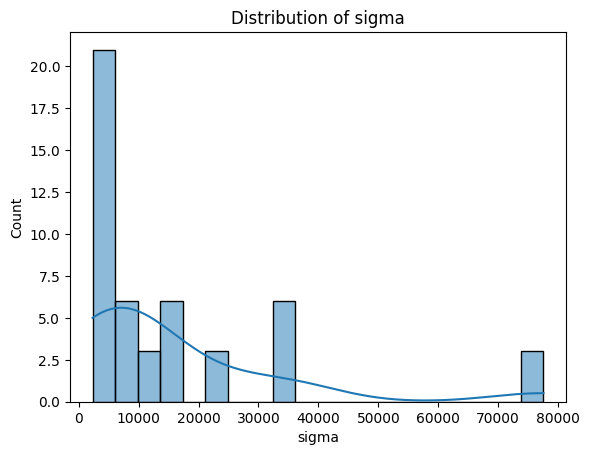

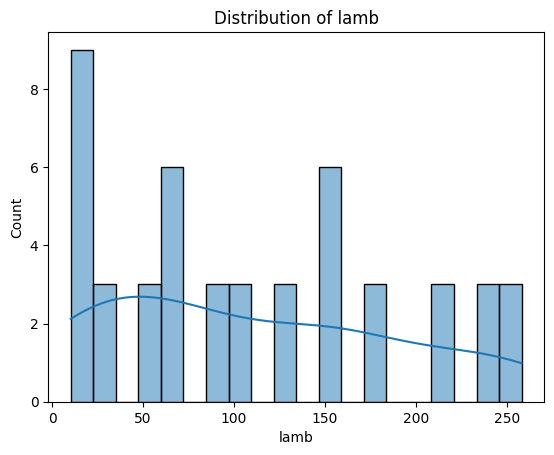

In [229]:
for col in ['phi', 'alpha_inf', 'sigma', 'lamb']:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

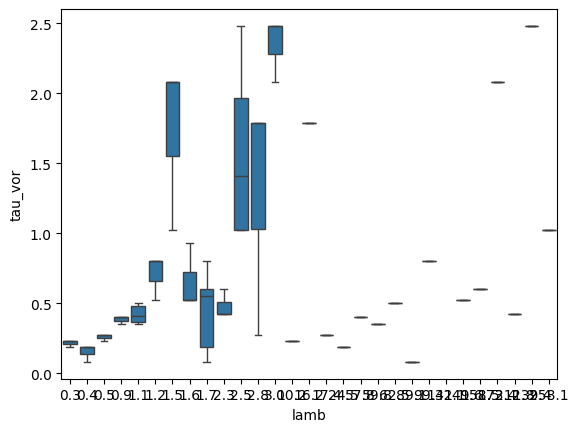

TypeError: Could not convert YM2-extrafine-looseYM2-fine-d1YM2-fine-d1YM2-fine-d1 to numeric

In [120]:
# Boxplot of porosity by granulometry
sns.boxplot(x='lamb', y='tau_vor', data=df_index)
plt.show()

# Grouped summary statistics
grouped = df_index.groupby('tau_vor').mean()
print(grouped)